# Mô hình dự báo khả năng gắn bó với công ty của nhân sự
## Nhóm 5 - 231IS23A01

## 1. Mô tả bài toán

### Dữ liệu
Tập dữ liệu Kaggle - HR Analytics (https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction)
- Số lượng bản ghi: 1480 bản ghi
- Số lượng thuộc tính: 38 thuộc tính

| Tên thuộc tính           | Kiểu DL  | Giải thích thuộc tính & Mô tả                                       |
|--------------------------|----------|---------------------------------------------------------------------|
| Age                      | int64    | Tuổi                                                                |
| AgeGroup                 | object   | Nhóm tuổi                                                           |
| Attrition                | object   | Trạng thái nhân viên đã rời công ty chưa (0: không rời, 1: đã rời)  |
| BusinessTravel           | object   | Tần suất đi lại công tác                                            |
| DailyRate                | int64    | Mức lương theo ngày của nhân viên                                   |
| Department               | object   | Bộ phận nhân viên đang làm việc                                     |
| DistanceFromHome         | int64    | Khoảng cách từ nhà đến nơi làm việc                                 |
| Education                | int64    | Trình độ học vấn                                                    |
| EducationField           | object   | Ngành học tương ứng trình độ học vấn                                |
| EmployeeCount            | int64    | <không rõ>                                                          |
| EmployeeNumber           | int64    | <không rõ>                                                          |
| EnvironmentSatisfaction  | int64    | Mức độ hài lòng với môi trường làm việc                             |
| Gender                   | object   | Giới tính                                                           |
| HourlyRate               | int64    | Mức lương theo giờ                                                  |
| JobInvolvement           | int64    | Mức độ tham gia vào công việc                                       |
| JobLevel                 | int64    | Cấp bậc chức vụ của nhân viên                                       |
| JobRole                  | object   | Chức vụ của nhân viên                                               |
| JobSatisfaction          | int64    | Mức độ hài lòng với công việc                                       |
| MaritalStatus            | object   | Tình trạng hôn nhân                                                 |
| MonthlyIncome            | int64    | Thu nhập hàng tháng                                                 |
| SalarySlab               | object   | Phân loại mức lương thành các khoảng                                |
| MonthlyRate              | int64    | Mức lương hàng tháng                                                |
| NumCompaniesWorked       | int64    | Số lượng công ty đã làm việc trước đó                               |
| Over18                   | object   | Nhân viên có trên 18 tuổi hay không                                 |
| OverTime                 | object   | Nhân viên có làm thêm giờ không                                     |
| PercentSalaryHike        | int64    | Phần trăm tăng lương gần đây                                        |
| PerformanceRating        | int64    | Mức độ hiệu suất làm việc                                           |
| RelationshipSatisfaction | int64    | Mức độ hài lòng với mối quan hệ đồng nghiệp trong công ty           |
| StandardHours            | int64    | Giờ làm tiêu chuẩn của nhân viên                                    |
| StockOptionLevel         | int64    | Mức độ cổ phiếu mà nhân viên có                                     |
| TotalWorkingYears        | int64    | Số năm kinh nghiệm                                                  |
| TrainingTimesLastYear    | int64    | Số lần tập huấn năm vừa rồi                                         |
| WorkLifeBalance          | int64    | Mức độ cân bằng giữa công việc và cuộc sống                         |
| YearsAtCompany           | int64    | Số năm làm việc tại công ty hiện tại                                |
| YearsInCurrentRole       | int64    | Số năm làm việc trong vai trò công việc hiện tại                    |
| YearsSinceLastPromotion  | int64    | Số năm kể từ lần thăng chức gần nhất                                |
| YearsWithCurrentManager  | float64  | Số năm làm việc với người quản lý hiện tại                          |

### Chiến lược phân tích:
- Với tham số cơ bản và các cách thức chia tập dữ liệu khác nhau, thực hiện chạy 5 mô hình **Decision Tree (gini), Random Forest (gini), Gradient Boosting, Naive Bayes, Neural Network**, tạo bảng số liệu các độ đo.
- Dựa trên bảng số liệu đã tạo, đi vào chi tiết các mô hình và phương pháp chia dữ liệu tương ứng với nó cho kết quả tốt.
- Điều chỉnh các biến độc lập dựa vào mức độ quan trọng của thuộc tính nhằm cải thiện kết quả mô hình.
- Tìm tham số phù hợp nhất với mỗi mô hình để cải thiện kết quả.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import graphviz
from sklearn.tree import export_graphviz

from collections import Counter

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

import joblib

## 2. Phân tích dữ liệu

### 2.1. Đọc dữ liệu

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('HR_Analytics.csv')

df.head(5)

EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0  RM297   18    18-25       Yes      Travel_Rarely        230   
1  RM302   18    18-25        No      Travel_Rarely        812   
2  RM458   18    18-25       Yes  Travel_Frequently       1306   
3  RM728   18    18-25        No         Non-Travel        287   
4  RM829   18    18-25       Yes         Non-Travel        247   

               Department  DistanceFromHome  Education EducationField  \
0  Research & Development                 3          3  Life Sciences   
1                   Sales                10          3        Medical   
2                   Sales                 5          3      Marketing   
3  Research & Development                 5          2  Life Sciences   
4  Research & Development                 8          1        Medical   

   EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0              1             405                        3    Male          54   
1              1             411                        4  Female          69   
2              1             614                        2    Male          69   
3              1            1012                        2    Male          73   
4              1            1156                        3    Male          80   

   JobInvolvement  JobLevel                JobRole  JobSatisfaction  \
0               3         1  Laboratory Technician                3   
1               2         1   Sales Representative                3   
2               3         1   Sales Representative                2   
3               3         1     Research Scientist                4   
4               3         1  Laboratory Technician                3   

  MaritalStatus  MonthlyIncome SalarySlab  MonthlyRate  NumCompaniesWorked  \
0        Single           1420    Upto 5k        25233                   1   
1        Single           1200    Upto 5k         9724                   1   
2        Single           1878    Upto 5k         8059                   1   
3        Single           1051    Upto 5k        13493                   1   
4        Single           1904    Upto 5k        13556                   1   

  Over18 OverTime  PercentSalaryHike  PerformanceRating  \
0      Y       No                 13                  3   
1      Y       No                 12                  3   
2      Y      Yes                 14                  3   
3      Y       No                 15                  3   
4      Y       No                 12                  3   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3             80                 0   
1                         1             80                 0   
2                         4             80                 0   
3                         4             80                 0   
4                         4             80                 0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  0                      2                3               0   
1                  0                      2                3               0   
2                  0                      3                3               0   
3                  0                      2                3               0   
4                  0                      0                3               0   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   0                        0                   0.0  
1                   0                        0                   0.0  
2                   0                        0                   0.0  
3                   0                        0                   0.0  
4                   0                        0                   0.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

### 2.2. Xoá các cột không cần thiết, xử lý dữ liệu trùng, khuyết thiếu

In [5]:
df.isna().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [6]:
columns_to_drop = ['AgeGroup', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']
df.drop(columns=columns_to_drop, inplace=True)

In [7]:
df.duplicated().sum()

7

In [8]:
df = df.drop_duplicates()
df['YearsWithCurrManager'] = df['YearsWithCurrManager'].fillna(df['YearsWithCurrManager'].mode().iloc[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1473 entries, 0 to 1479
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1473 non-null   object 
 1   Age                       1473 non-null   int64  
 2   Attrition                 1473 non-null   object 
 3   BusinessTravel            1473 non-null   object 
 4   DailyRate                 1473 non-null   int64  
 5   Department                1473 non-null   object 
 6   DistanceFromHome          1473 non-null   int64  
 7   Education                 1473 non-null   int64  
 8   EducationField            1473 non-null   object 
 9   EnvironmentSatisfaction   1473 non-null   int64  
 10  Gender                    1473 non-null   object 
 11  HourlyRate                1473 non-null   int64  
 12  JobInvolvement            1473 non-null   int64  
 13  JobLevel                  1473 non-null   int64  
 14  JobRole      

### 2.3. Thống kê ban đầu

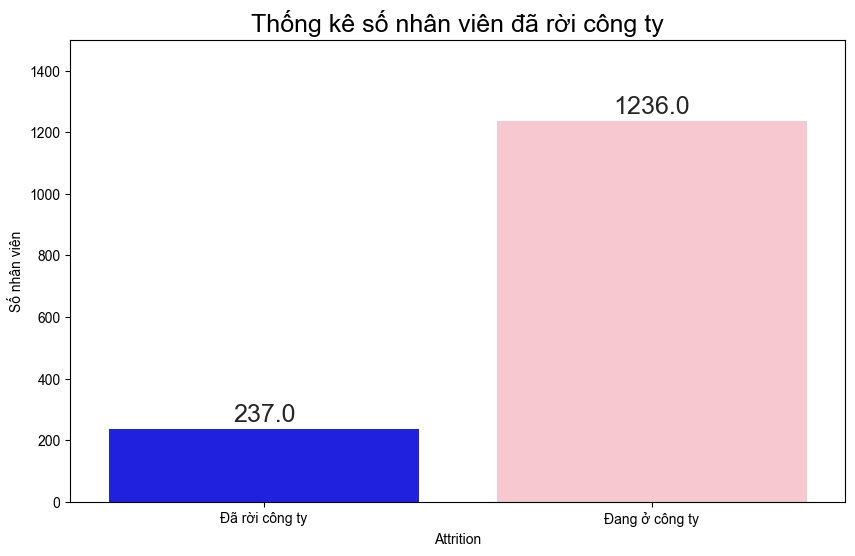

In [9]:
ax = sns.countplot(x = 'Attrition', data=df, palette=['blue', 'pink'])
sns.set(font_scale=1.5)

ax.set_title('Thống kê số nhân viên đã rời công ty')
ax.set_xticklabels(['Đã rời công ty', 'Đang ở công ty'])
ax.set_ylabel('Số nhân viên')
ax.set_ylim(top=1500)

fig = plt.gcf()
fig.set_size_inches(10,6)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [10]:
display(df.describe())
display(df.describe(include='object'))

Age    DailyRate  DistanceFromHome    Education  \
count  1473.000000  1473.000000       1473.000000  1473.000000   
mean     36.917176   802.659878          9.196877     2.911066   
std       9.130690   403.245460          8.107754     1.024612   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1473.000000  1473.000000     1473.000000  1473.000000   
mean                  2.723693    65.833673        2.729803     2.063815   
std                   1.093006    20.350032        0.712115     1.106429   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count      1473.000000    1473.000000   1473.000000         1473.000000   
mean          2.728445    6500.228785  14321.376103            2.693143   
std           1.103163    4706.053923   7115.540450            2.496914   
min           1.000000    1009.000000   2094.000000            0.000000   
25%           2.000000    2911.000000   8053.000000            1.000000   
50%           3.000000    4908.000000  14242.000000            2.000000   
75%           4.000000    8380.000000  20467.000000            4.000000   
max           4.000000   19999.000000  26999.000000            9.000000   

       PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count        1473.000000        1473.000000               1473.000000   
mean           15.212492           3.153428                  2.712152   
std             3.657230           0.360522                  1.081575   
min            11.000000           3.000000                  1.000000   
25%            12.000000           3.000000                  2.000000   
50%            14.000000           3.000000                  3.000000   
75%            18.000000           3.000000                  4.000000   
max            25.000000           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1473.000000        1473.000000            1473.000000   
mean           0.793618          11.277665               2.800407   
std            0.851493           7.776228               1.289411   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1473.000000     1473.000000         1473.000000   
mean          2.761711        7.004752            4.228106   
std           0.705838        6.121004            3.621096   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1473.000000           1473.000000  
mean                  2.183978              4.035302  
std                   3.220301              3.513577  


EmpID Attrition BusinessTravel              Department  \
count     1473      1473           1473                    1473   
unique    1470         2              4                       3   
top     RM1467        No  Travel_Rarely  Research & Development   
freq         2      1236           1038                     963   

       EducationField Gender          JobRole MaritalStatus SalarySlab  \
count            1473   1473             1473          1473       1473   
unique              6      2                9             3          4   
top     Life Sciences   Male  Sales Executive       Married    Upto 5k   
freq              606    884              326           675        751   

       OverTime  
count      1473  
unique        2  
top          No  
freq       1057

### 2.4. Tìm và xử lý dữ liệu ngoại lai

In [11]:
def detect_outliers(df, n, features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list (k for k, v in outlier_indices.items() if v > n)
    
    return multiple_outliers

In [12]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

outliers_to_drop = detect_outliers(df, 2, numeric_columns)

In [13]:
df.loc[outliers_to_drop]

EmpID  Age Attrition     BusinessTravel  DailyRate  \
917    RM315   39        No      Travel_Rarely        117   
918    RM327   39        No  Travel_Frequently        672   
931    RM938   39        No      Travel_Rarely        412   
959    RM187   40        No      Travel_Rarely        989   
963    RM258   40        No      Travel_Rarely       1416   
...      ...  ...       ...                ...        ...   
1441   RM977   56        No      Travel_Rarely       1369   
1452   RM127   58       Yes      Travel_Rarely        147   
1236  RM1328   46        No      Travel_Rarely       1319   
1120   RM927   43        No      Travel_Rarely        531   
1156  RM1079   44        No      Travel_Rarely        136   

                  Department  DistanceFromHome  Education    EducationField  \
917   Research & Development                10          1           Medical   
918   Research & Development                 7          2           Medical   
931   Research & Development                13          4           Medical   
959   Research & Development                 4          1           Medical   
963   Research & Development                 2          2           Medical   
...                      ...               ...        ...               ...   
1441  Research & Development                23          3     Life Sciences   
1452  Research & Development                23          4           Medical   
1236                   Sales                 3          3  Technical Degree   
1120                   Sales                 4          4         Marketing   
1156  Research & Development                28          3     Life Sciences   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
917                         3    Male          99               3         4   
918                         3    Male          54               2         5   
931                         3  Female          94               2         4   
959                         4  Female          46               3         5   
963                         1    Male          49               3         5   
...                       ...     ...         ...             ...       ...   
1441                        4    Male          68               3         4   
1452                        4  Female          94               3         3   
1236                        1  Female          45               4         4   
1120                        4  Female          56               2         3   
1156                        4    Male          32               3         4   

                        JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
917                     Manager                1       Married          17068   
918                     Manager                4       Married          19272   
931                     Manager                2      Divorced          17123   
959                     Manager                3       Married          19033   
963           Research Director                3      Divorced          19436   
...                         ...              ...           ...            ...   
1441     Manufacturing Director                2       Married          13402   
1452  Healthcare Representative                4       Married          10312   
1236            Sales Executive                1      Divorced          13225   
1120            Sales Executive                4        Single          10231   
1156          Research Director                1       Married          16328   

     SalarySlab  MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
917        15k+         5355                   1      Yes                 14   
918        15k+        21141                   1       No                 15   
931        15k+        17334                   6      Yes                 13   
959        15k+         6499                   1       No                 14   
963

In [14]:
df = df.drop(outliers_to_drop, axis = 0).reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1397 non-null   object 
 1   Age                       1397 non-null   int64  
 2   Attrition                 1397 non-null   object 
 3   BusinessTravel            1397 non-null   object 
 4   DailyRate                 1397 non-null   int64  
 5   Department                1397 non-null   object 
 6   DistanceFromHome          1397 non-null   int64  
 7   Education                 1397 non-null   int64  
 8   EducationField            1397 non-null   object 
 9   EnvironmentSatisfaction   1397 non-null   int64  
 10  Gender                    1397 non-null   object 
 11  HourlyRate                1397 non-null   int64  
 12  JobInvolvement            1397 non-null   int64  
 13  JobLevel                  1397 non-null   int64  
 14  JobRole 

### 2.5. Phân tích một số biến

#### Ma trận tương quan

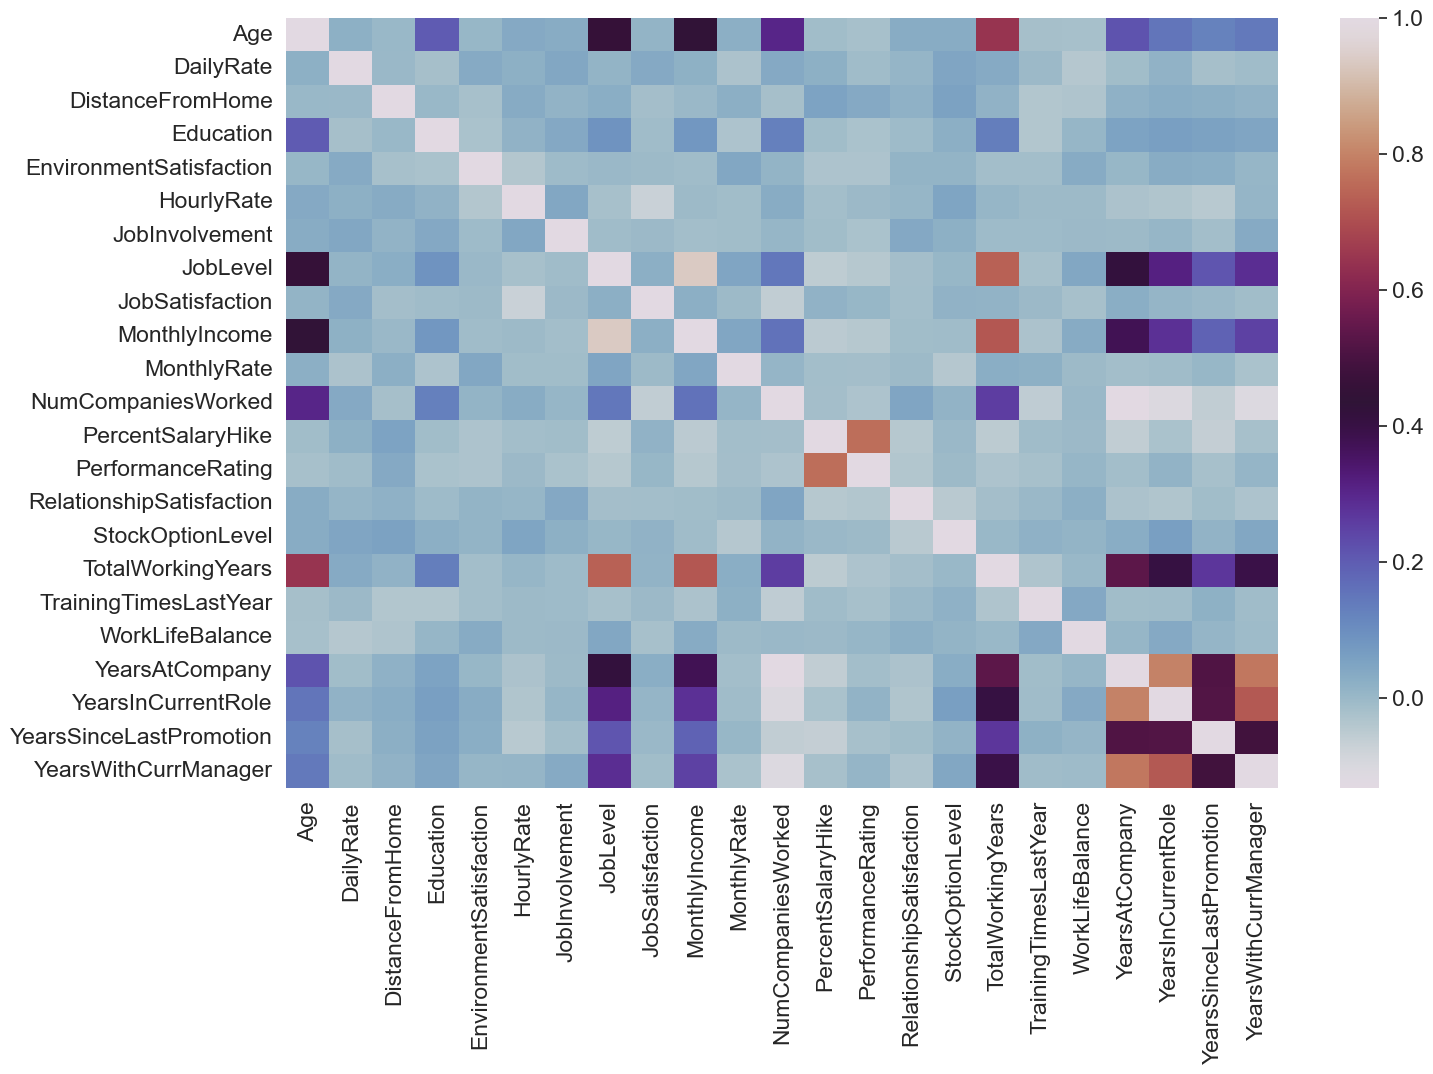

In [15]:
numeric_df = df[numeric_columns]

plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), annot=False, fmt='.2f', cmap='twilight')
plt.show()

#### Ma trận của các cột có tương quan cao

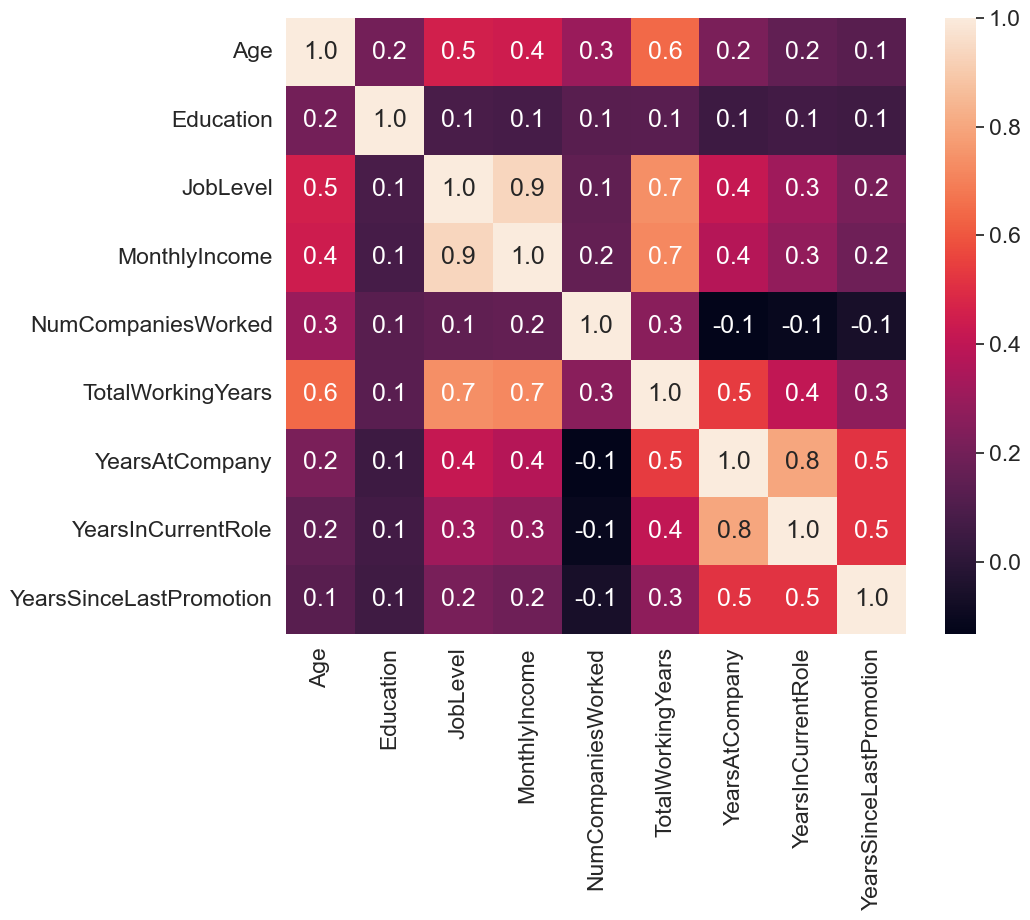

In [16]:
high_corr_columns = ['Age', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears',
                     'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']

plt.figure(figsize=(10, 8))
sns.heatmap(df[high_corr_columns].corr(), annot=True, fmt='.1f')
plt.show()

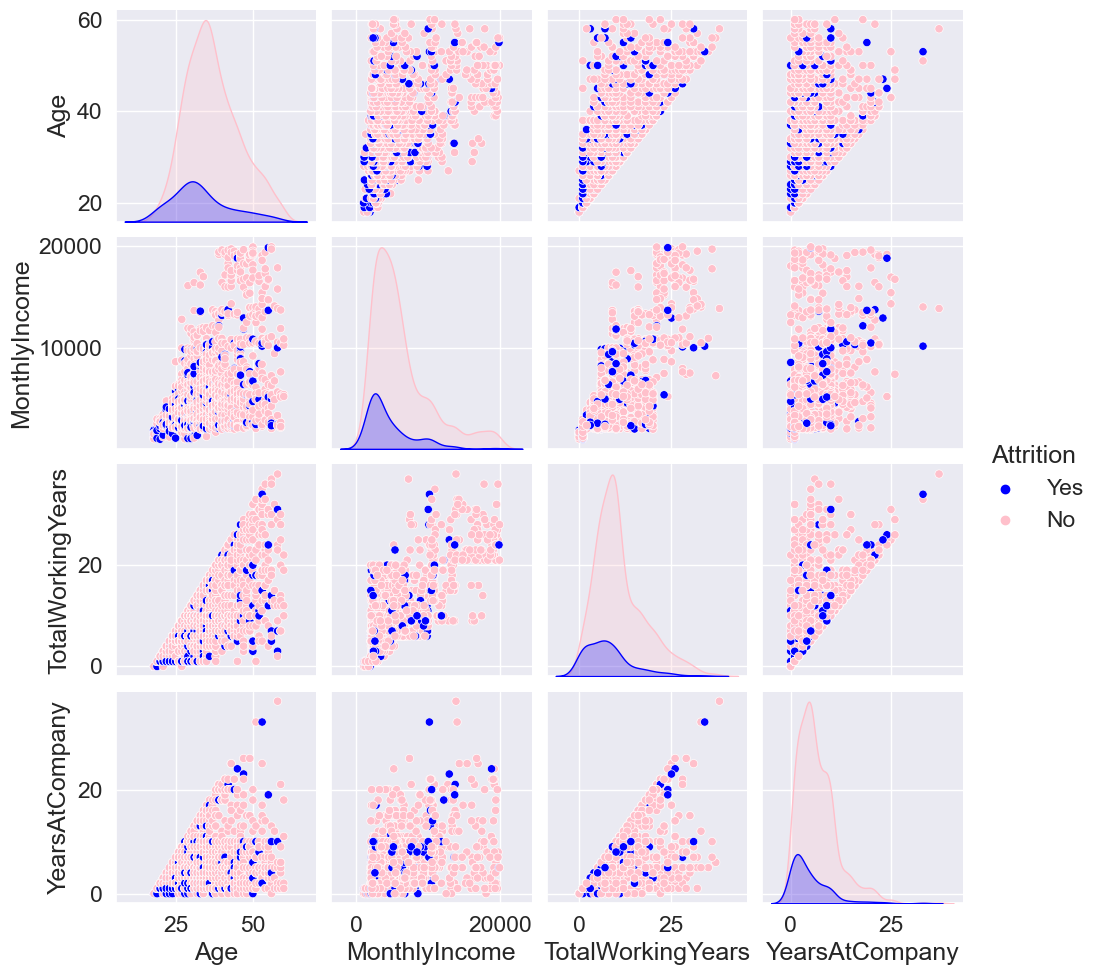

In [17]:
sns.pairplot(df[['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'Attrition']], hue='Attrition', palette=['blue', 'pink'])
plt.show()

#### Đánh giá
##### Tuổi, thu nhập hàng tháng, số năm làm việc và số năm làm việc với công ty hiện tại có mối tương quan với khả năng rời đi của nhân viên.
- Tuổi, tổng số năm làm việc và thu nhập hàng tháng có mối tương quan tuyến tính dương. 
- Nhân viên càng trẻ thì khả năng rời đi càng cao. 
- Nhân viên có thu nhập hàng tháng thấp hơn thì khả năng rời đi càng cao. 
- Nhân viên có số năm làm việc ngắn hơn thì khả năng rời đi càng cao. 
- Nhân viên có số năm làm việc với công ty hiện tại lâu hơn thì khả năng rời đi càng thấp. 

#### Phân phối của các biến đối với Attrition

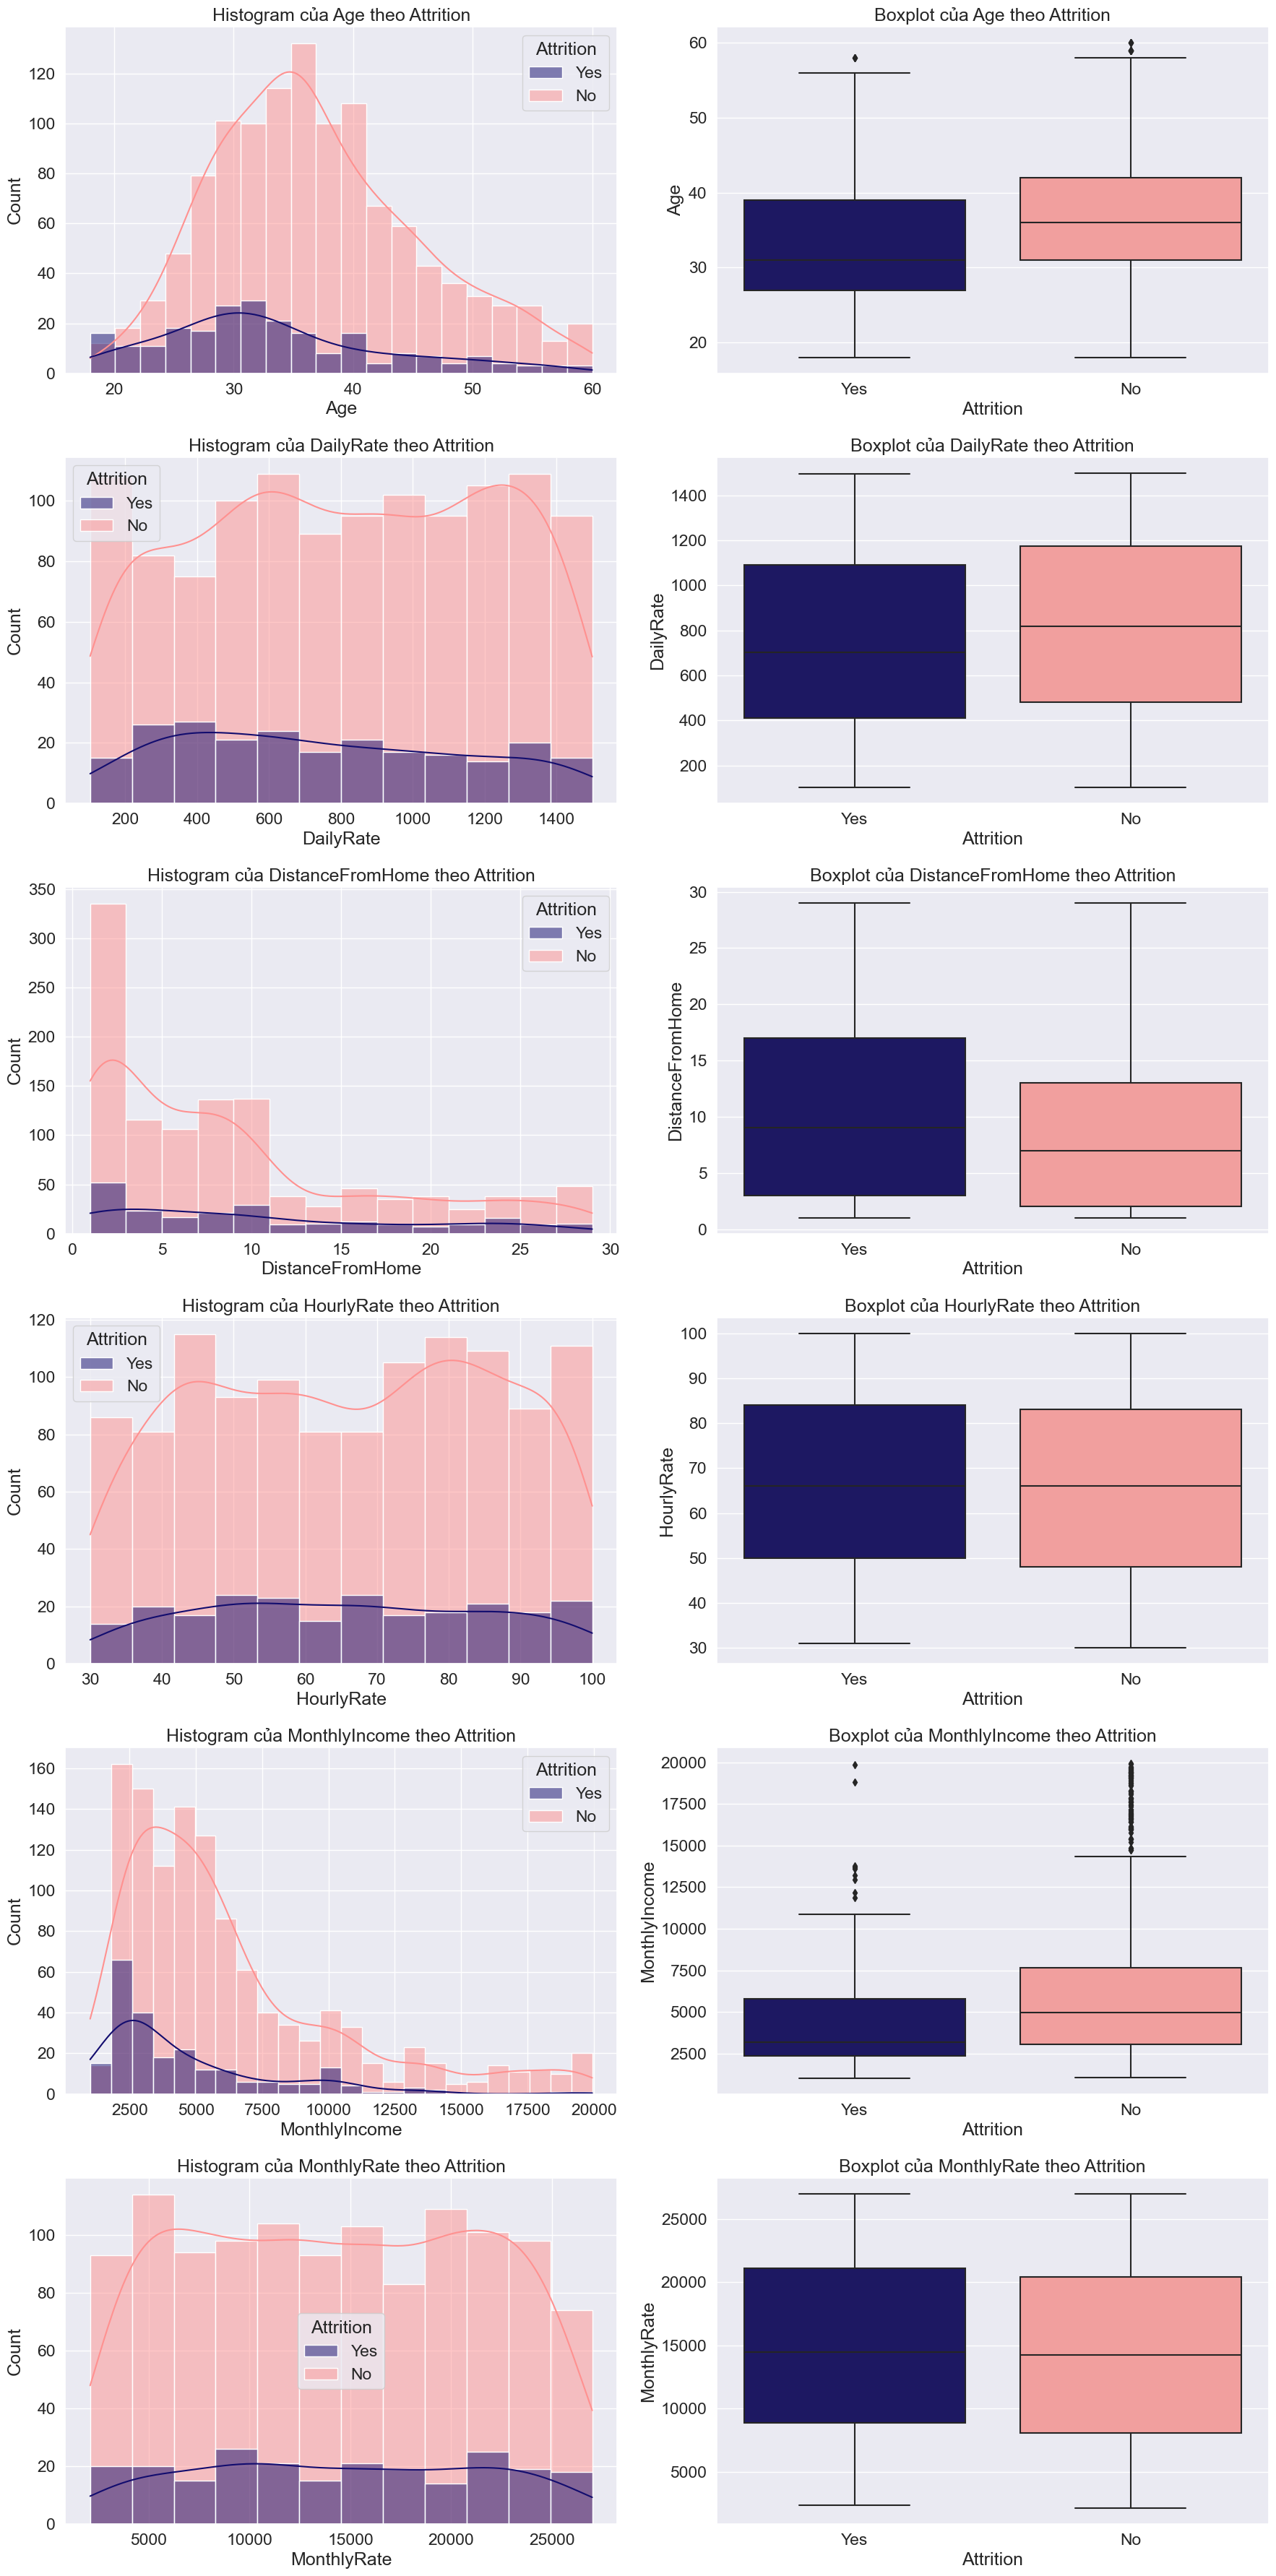

In [18]:
columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']

plt.figure(figsize=(18, 36))
for i, col in enumerate(columns):
    plt.subplot(6, 2, i * 2 + 1)
    sns.histplot(data=df, x=col, hue='Attrition', kde=True, palette=['#120c6e', '#ff9190'])
    plt.title(f'Histogram của {col} theo Attrition')

    plt.subplot(6, 2, i * 2 + 2)
    sns.boxplot(x=df['Attrition'], y=df[col], palette=['#120c6e', '#ff9190'])
    plt.title(f'Boxplot của {col} theo Attrition')

plt.tight_layout()
plt.show()

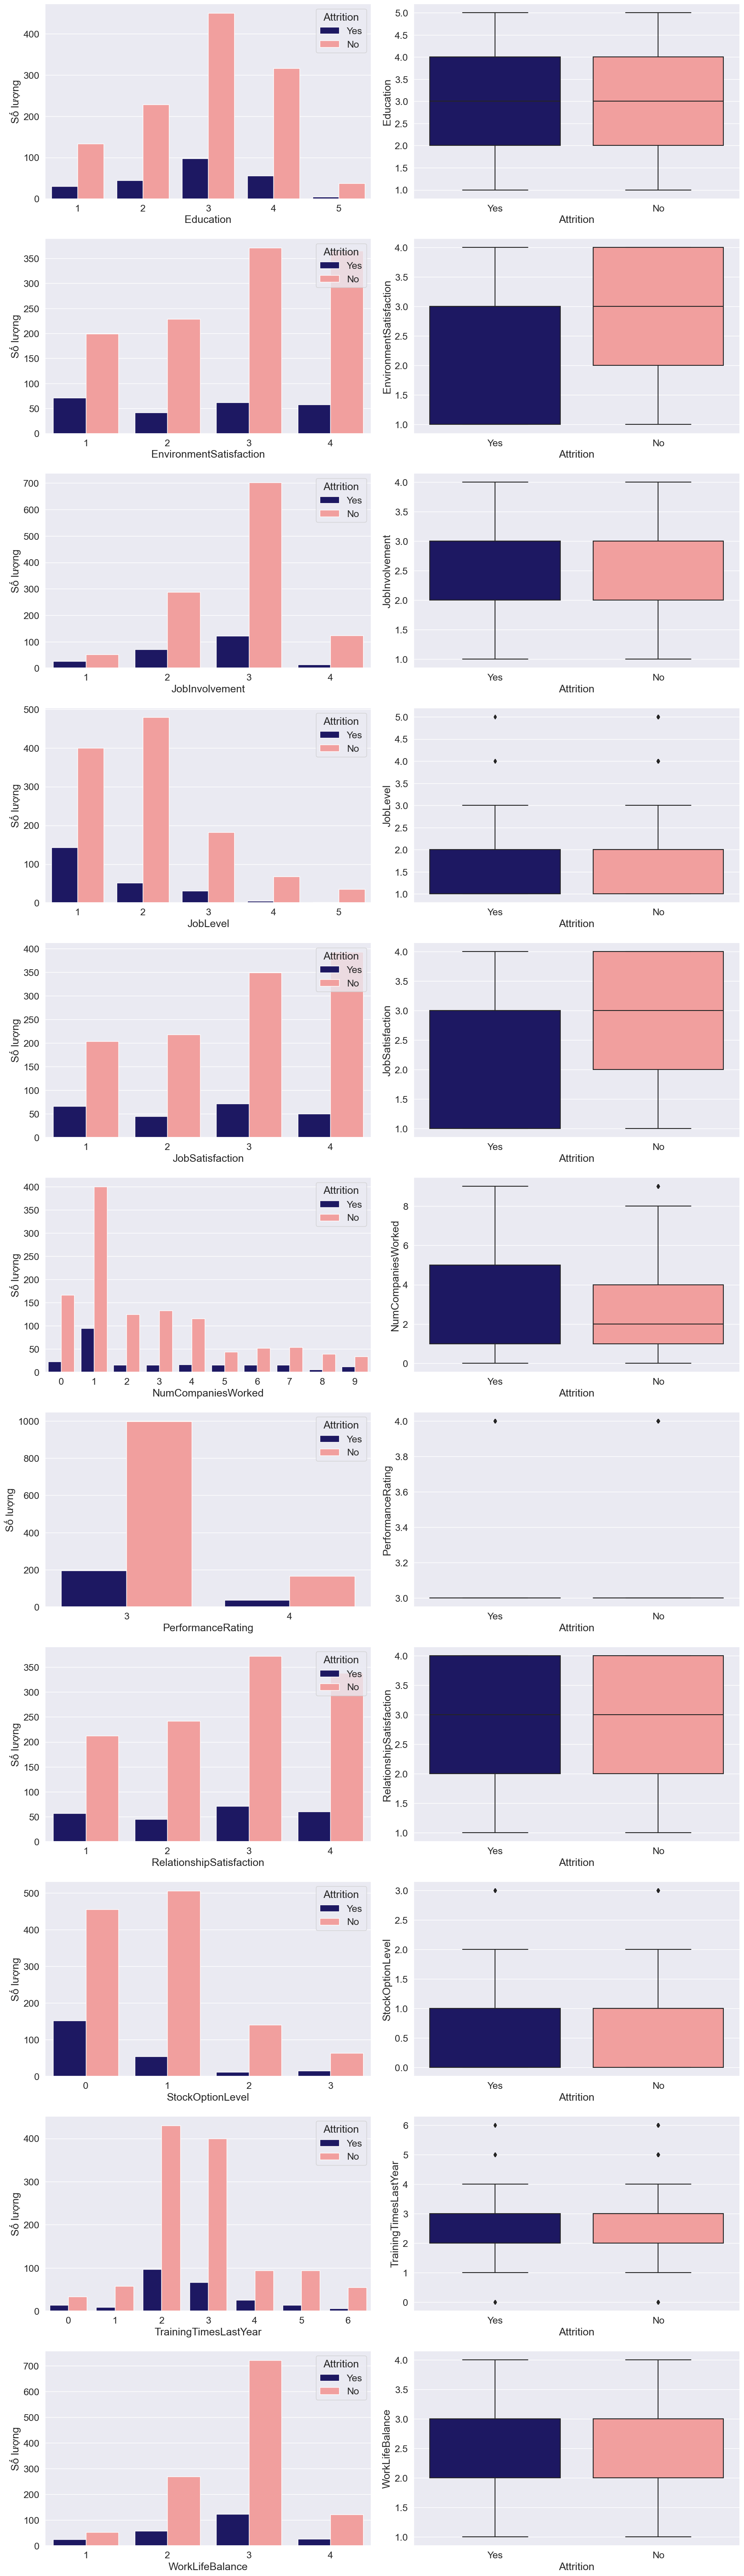

In [19]:
columns = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
           'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating',
           'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']

sns.set_palette('pastel')

plt.figure(figsize=(18, 72))
for i, col in enumerate(columns):
    plt.subplot(13, 2, i * 2 + 1)
    sns.countplot(x=df[col], hue=df['Attrition'], palette=['#120c6e', '#ff9190'])
    plt.xlabel(col)
    plt.ylabel('Số lượng')
    plt.legend(title='Attrition', loc='upper right')

    plt.subplot(13, 2, i * 2 + 2)
    sns.boxplot(x=df['Attrition'], y=df[col], palette=['#120c6e', '#ff9190'])
    plt.xlabel('Attrition')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

#### Đánh giá
- Sự hài lòng với môi trường làm việc và sự cân bằng giữa công việc với cuộc sống thấp, mối quan hệ với đồng nghiệp không tốt ảnh hưởng đến khả năng gắn bó của nhân viên với công ty.
- Nhân viên không có cổ phiếu có khả năng rời khỏi công ty cao hơn.
- Nhân viên có cấp bậc vị trí công việc thấp cũng như sự hài lòng với công việc thấp có khả năng rời công ty cao hơn.

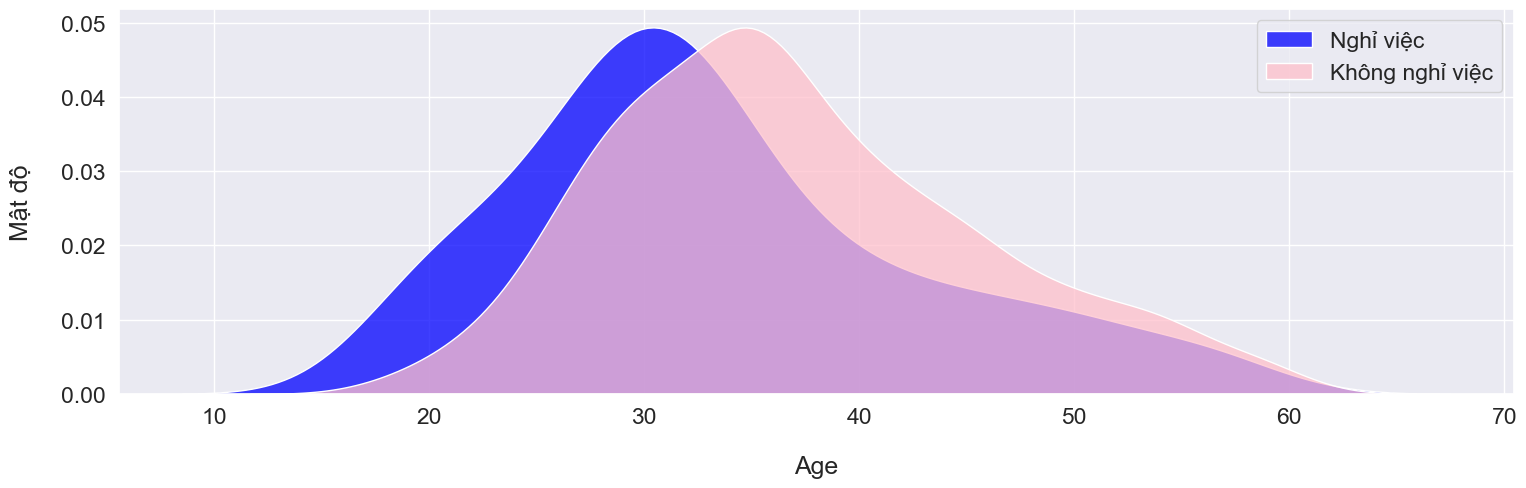

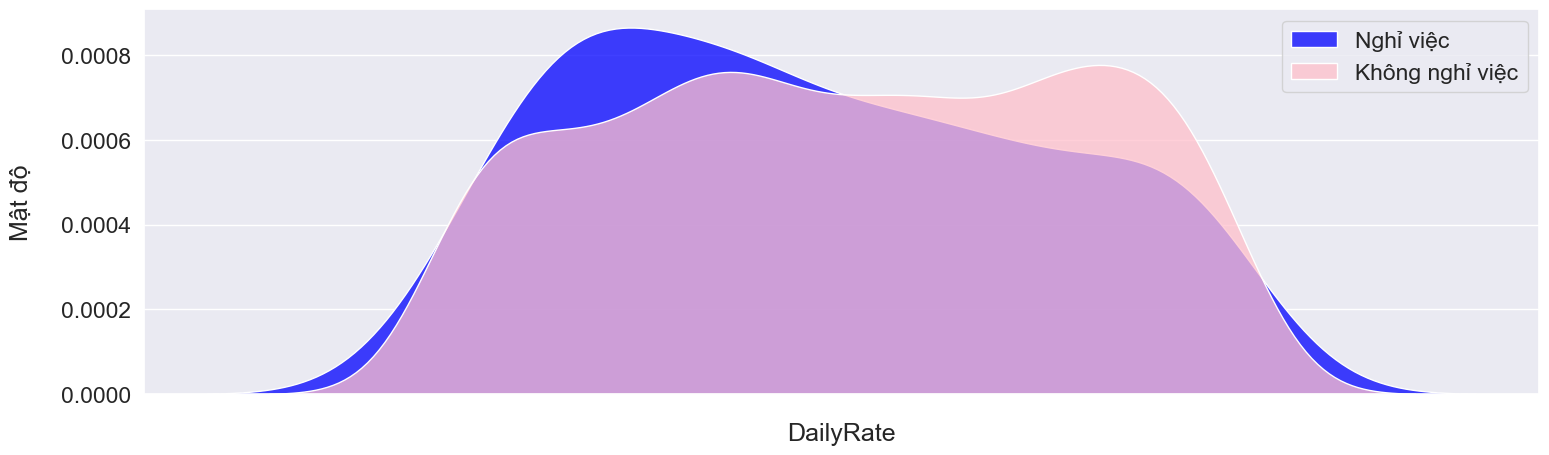

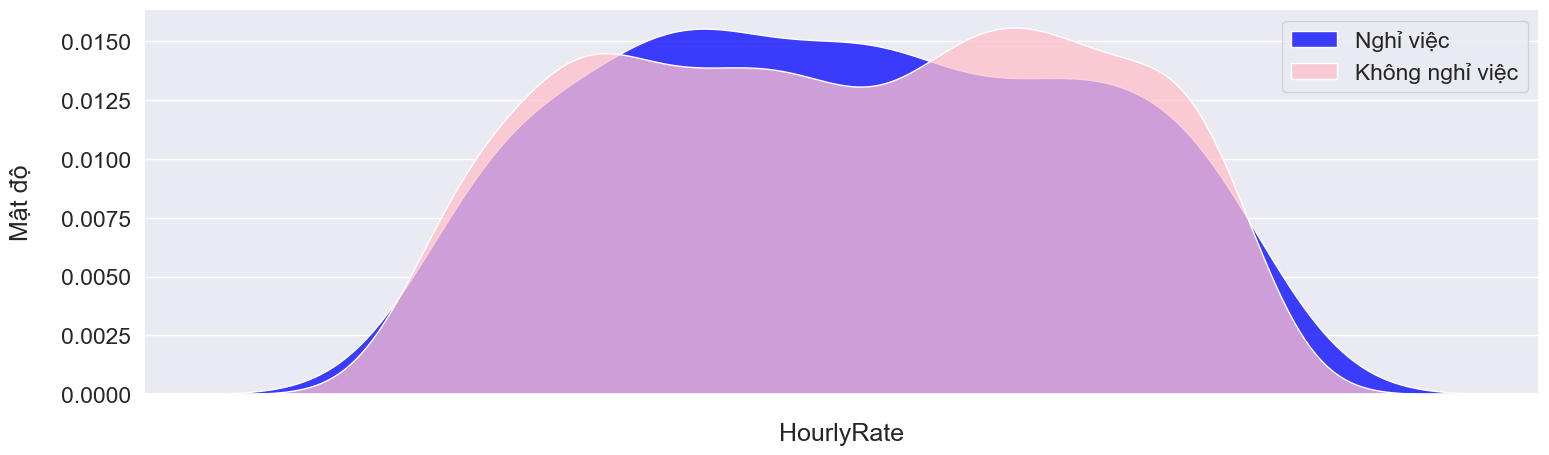

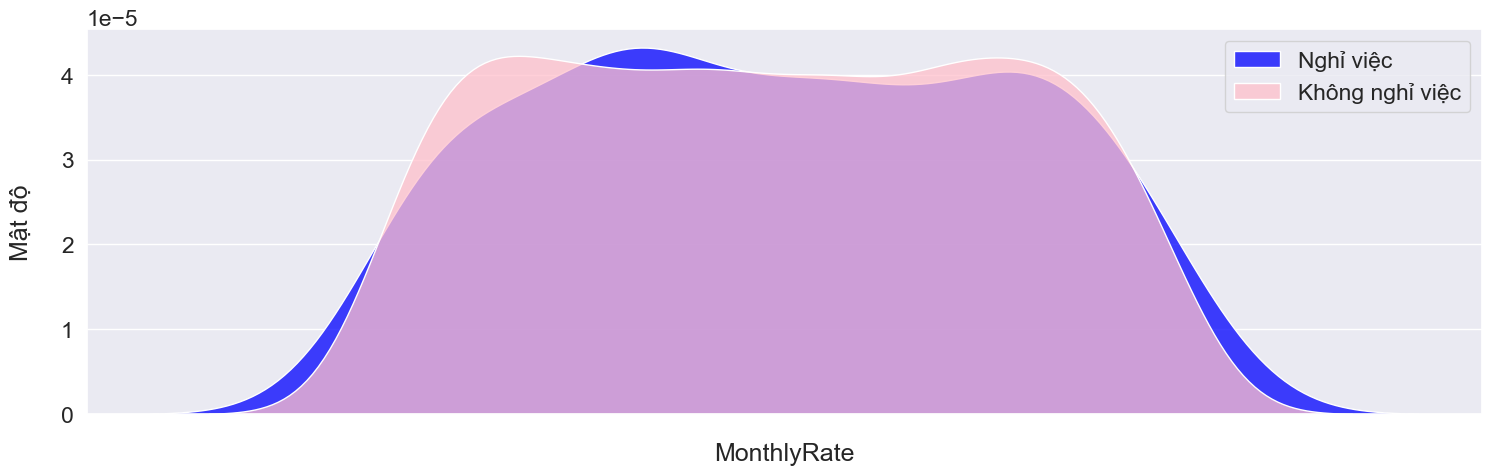

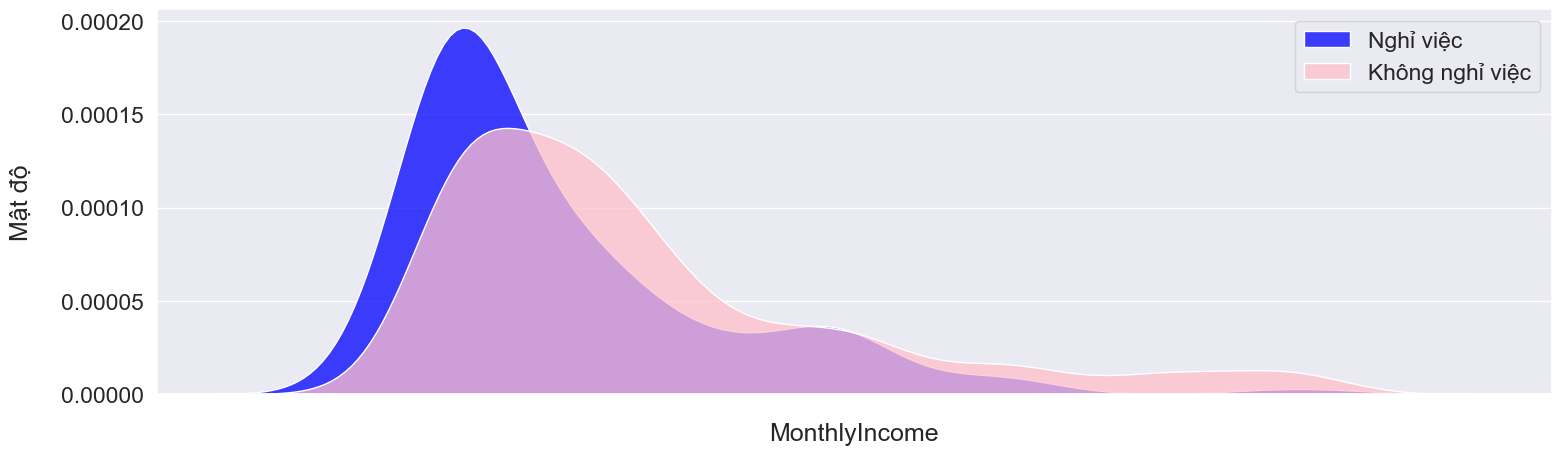

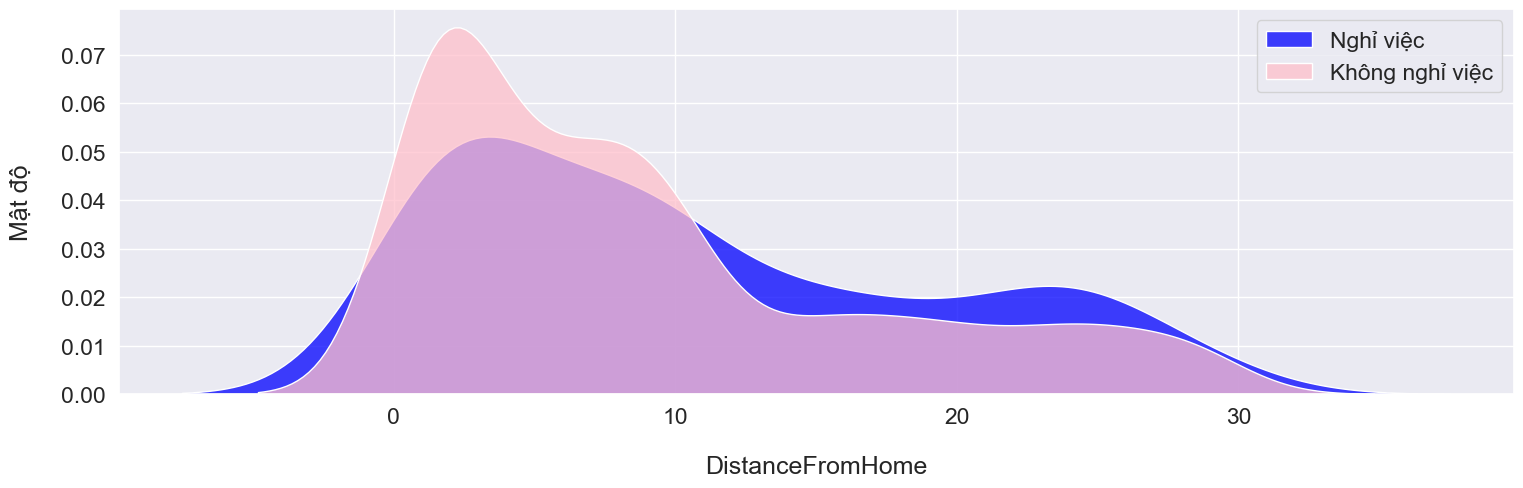

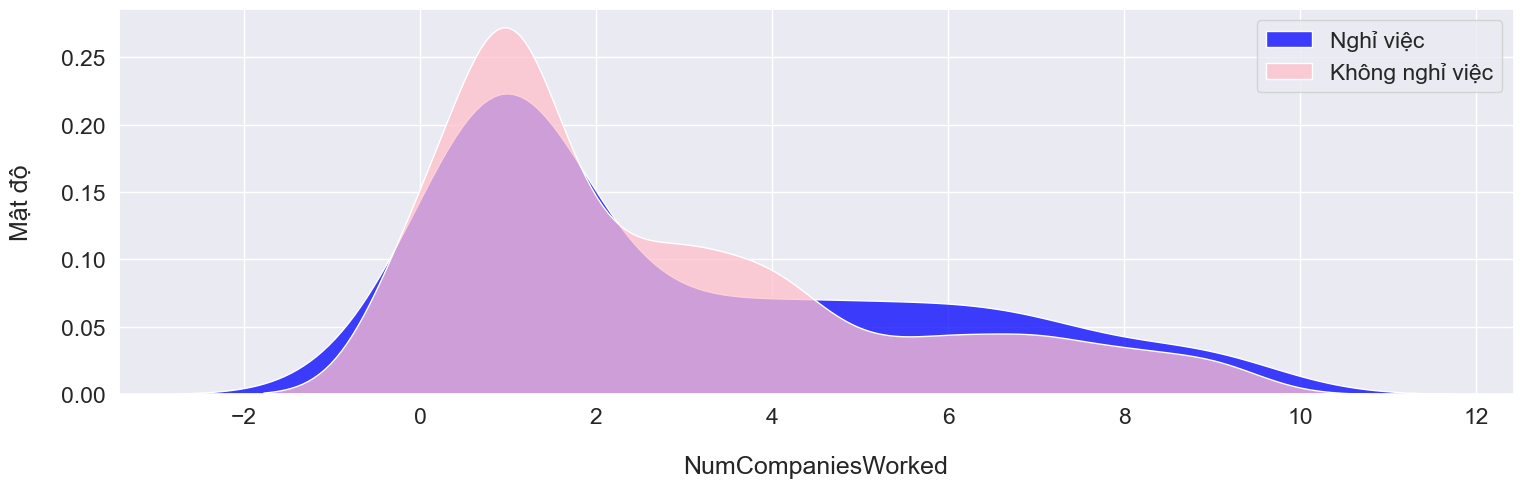

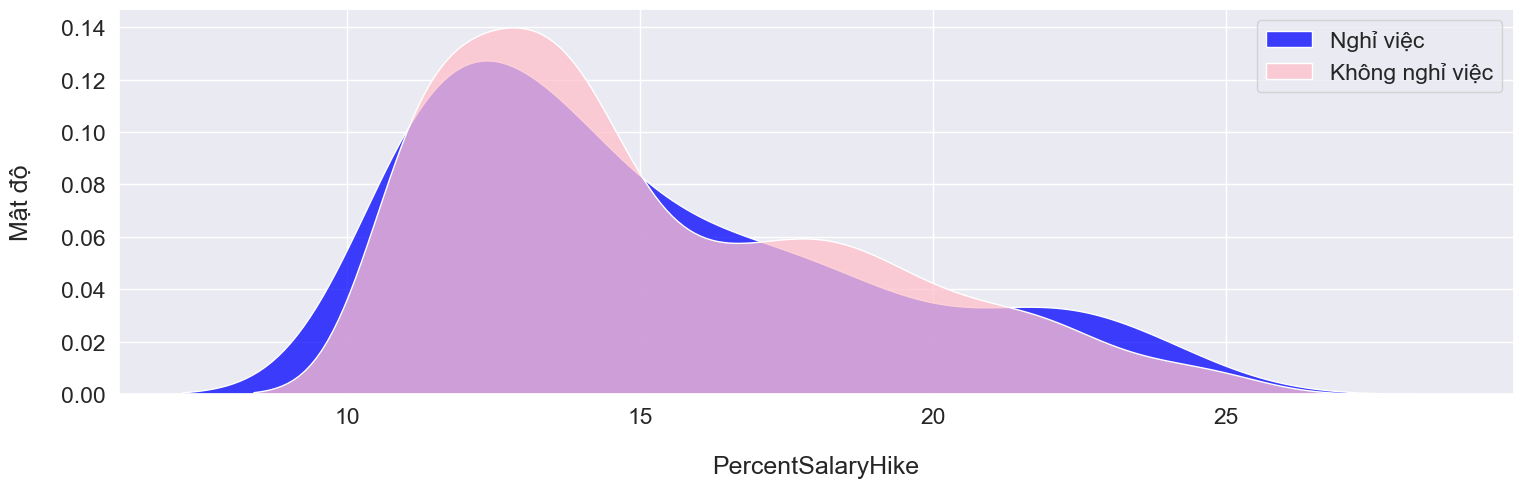

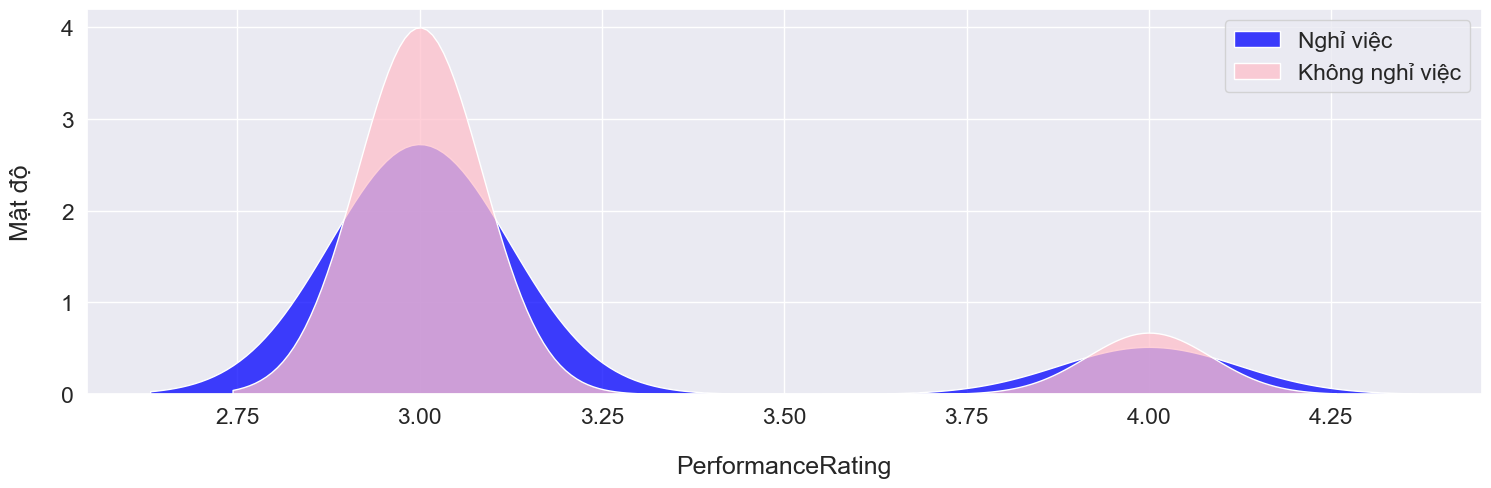

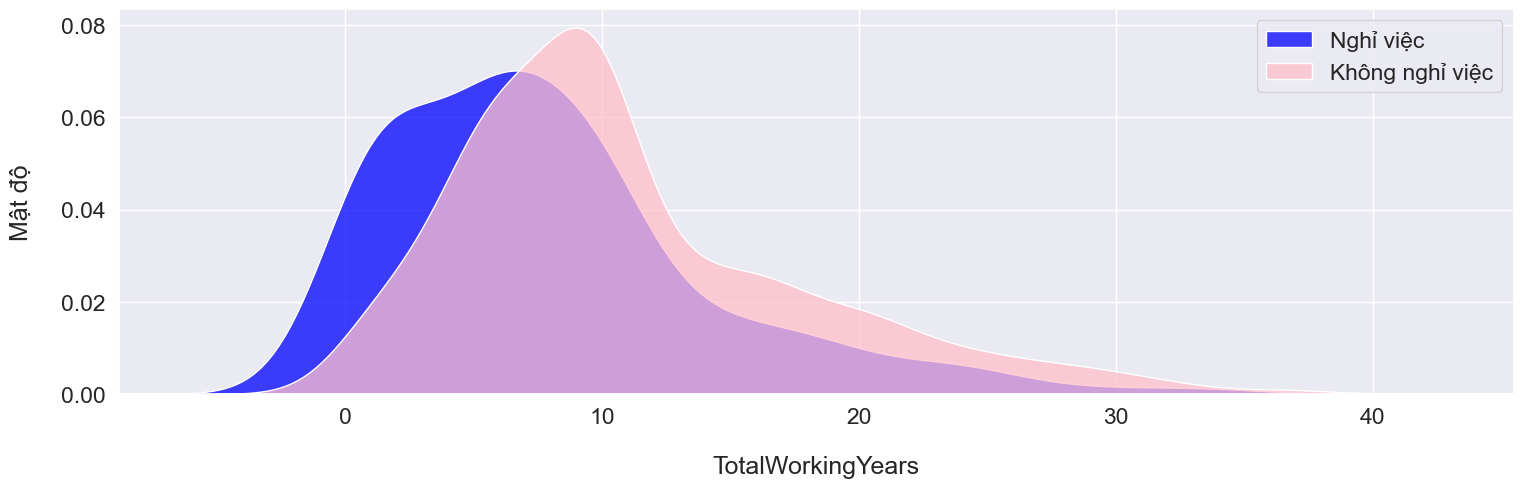

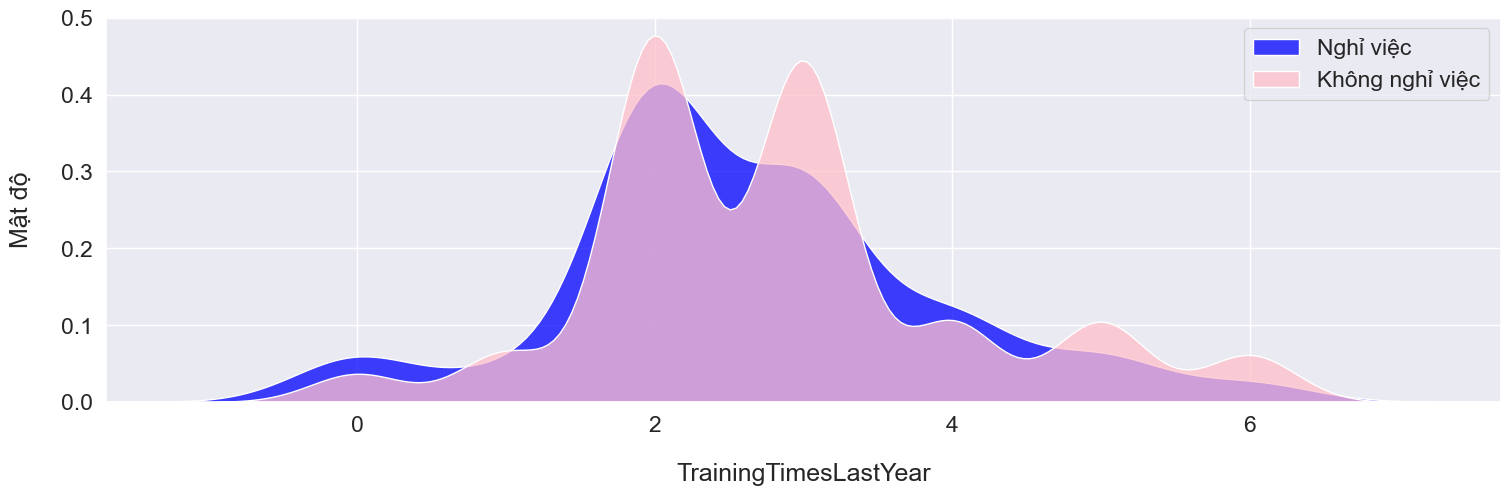

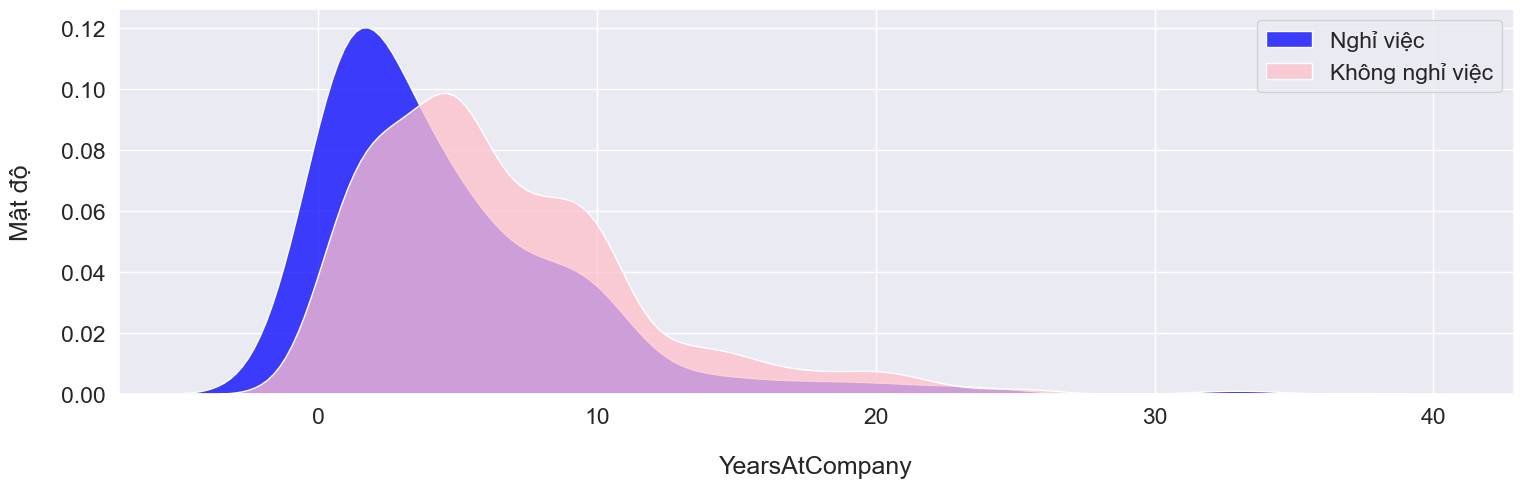

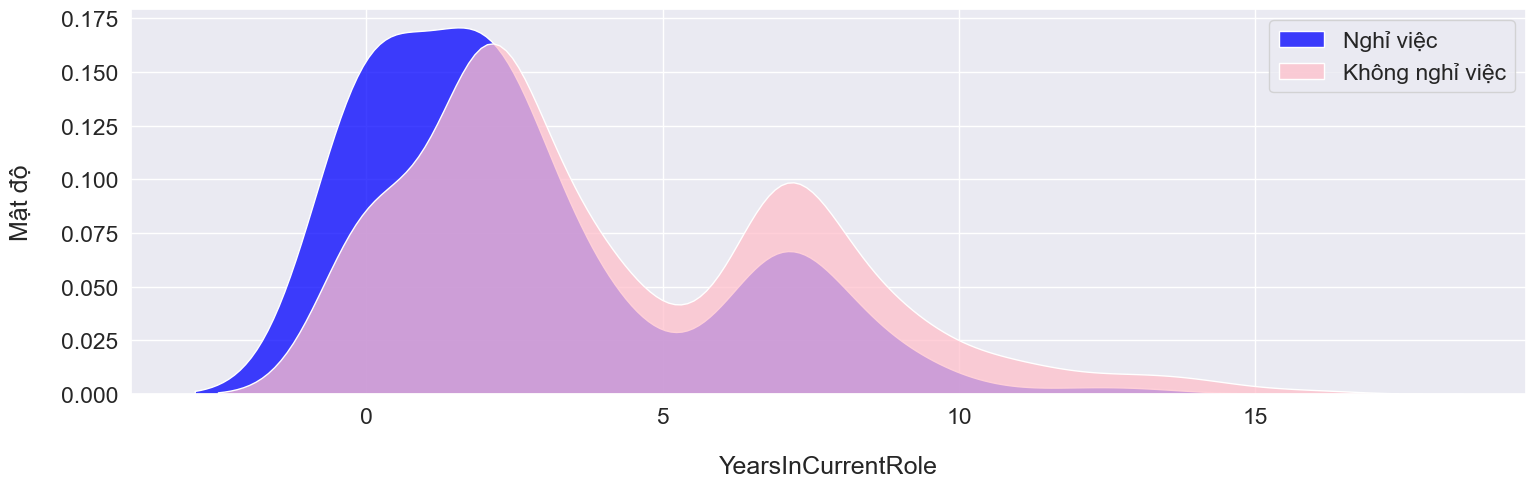

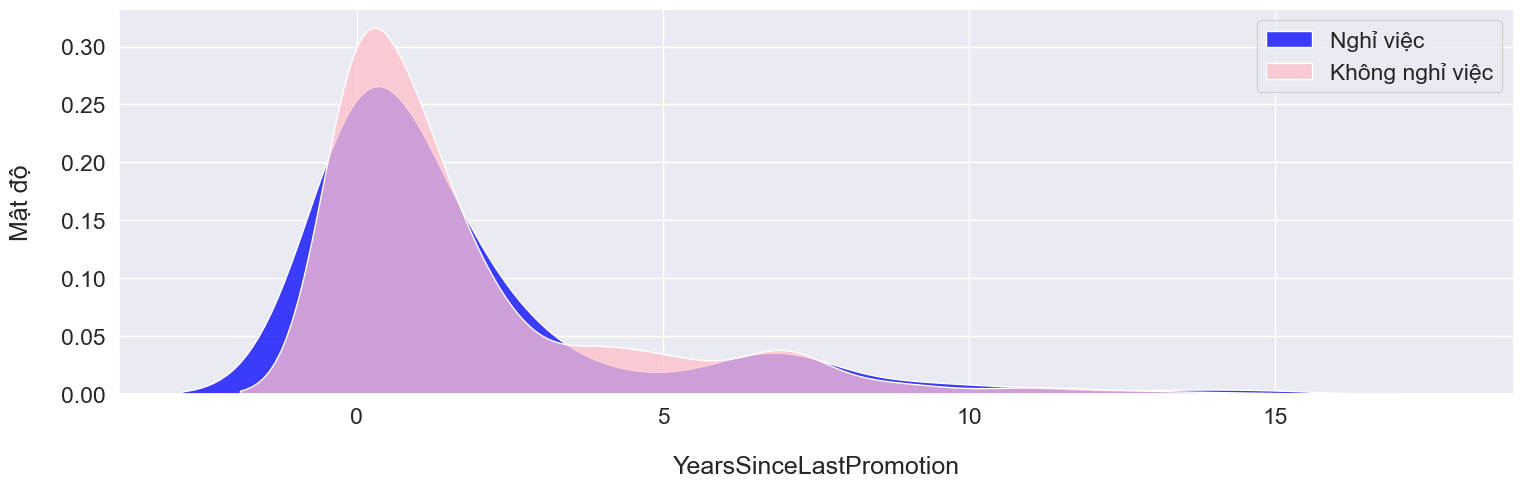

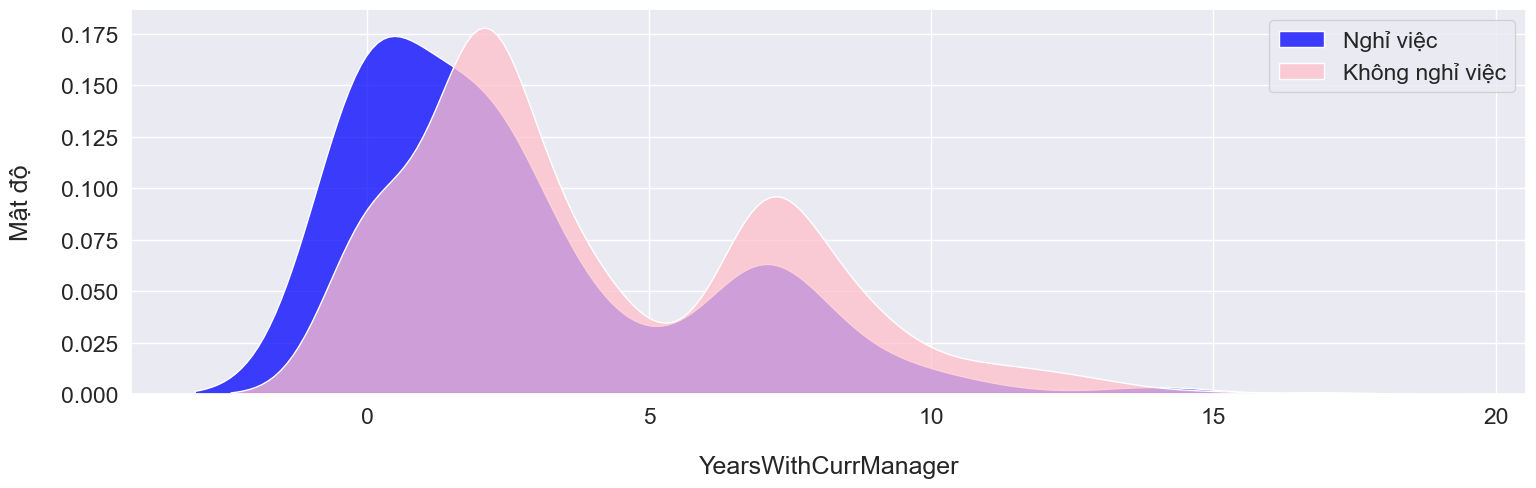

In [20]:
variables_to_plot = ["Age", "DailyRate", "HourlyRate", "MonthlyRate", "MonthlyIncome", "DistanceFromHome", "NumCompaniesWorked", "PercentSalaryHike", "PerformanceRating",
                     "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany",
                     "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]

data_with_attrition = df[df['Attrition'] == 'Yes']
data_without_attrition = df[df['Attrition'] == 'No']

for var in variables_to_plot:
    plt.figure(figsize=(18, 5))
    ax1 = plt.subplot(111)
    sns.kdeplot(data_with_attrition[var], color='blue', multiple='stack', label='Nghỉ việc')
    sns.kdeplot(data_without_attrition[var], color='pink', multiple='stack', label='Không nghỉ việc')
    ax1.set_ylabel('Mật độ', labelpad=20)
    ax1.set_xlabel(var, labelpad=20)
    
    if var in ["DailyRate", "HourlyRate", "MonthlyRate", "MonthlyIncome"]:
        ax1.set_xticks([])
    
    plt.legend()
    plt.show()

#### Đánh giá
- Nhân viên trẻ hơn (độ tuổi từ 25-35) có xu hướng nghỉ việc cao hơn. Nhân viên có độ tuổi từ 30-40 có xu hướng ở lại công ty cao hơn, có thể vì một số yếu tố như sự ổn định trong công việc.
- Mức lương trả theo giờ thấp và thu nhập hàng tháng thấp ảnh hưởng rõ ràng đến sự rời đi.
- Khoảng cách từ nhà đến cơ quan xa (từ 10km trở lên) ảnh hưởng khá rõ ràng đến khả năng gắn bó với công ty.
- Nhân viên có tổng số năm kinh nghiệm/ tổng số năm làm việc ít có xu hướng nhảy việc cao hơn, có thể vì một số yếu tố như tìm cơ hội tốt hơn thay vì sự ổn định.
- Nhân viên có thời gian làm việc tại một vị trí không dài cũng như số năm làm việc tại công ty ngắn (0-2 năm) có xu hướng nghi việc cao.

#### Tương quan giữa YearsAtCompany với TotalWorkingYears, YearsInCurrentRole, YearsSinceLastPromotion và Attrition

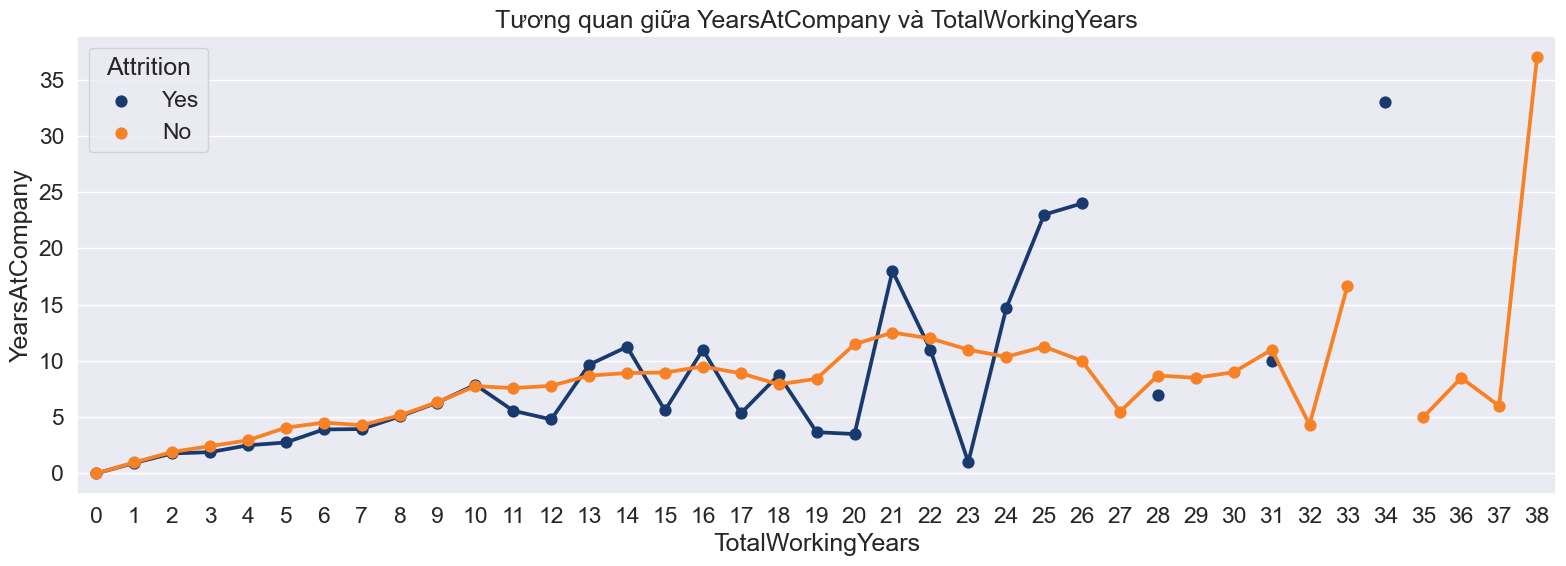

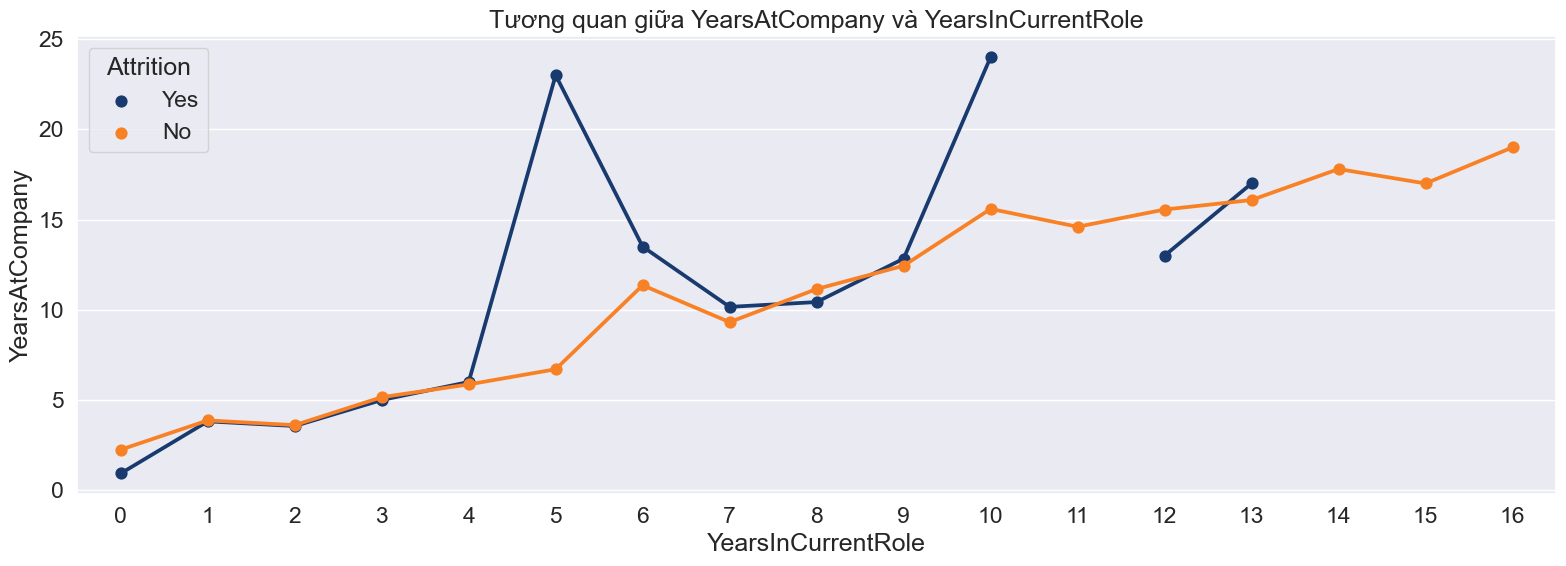

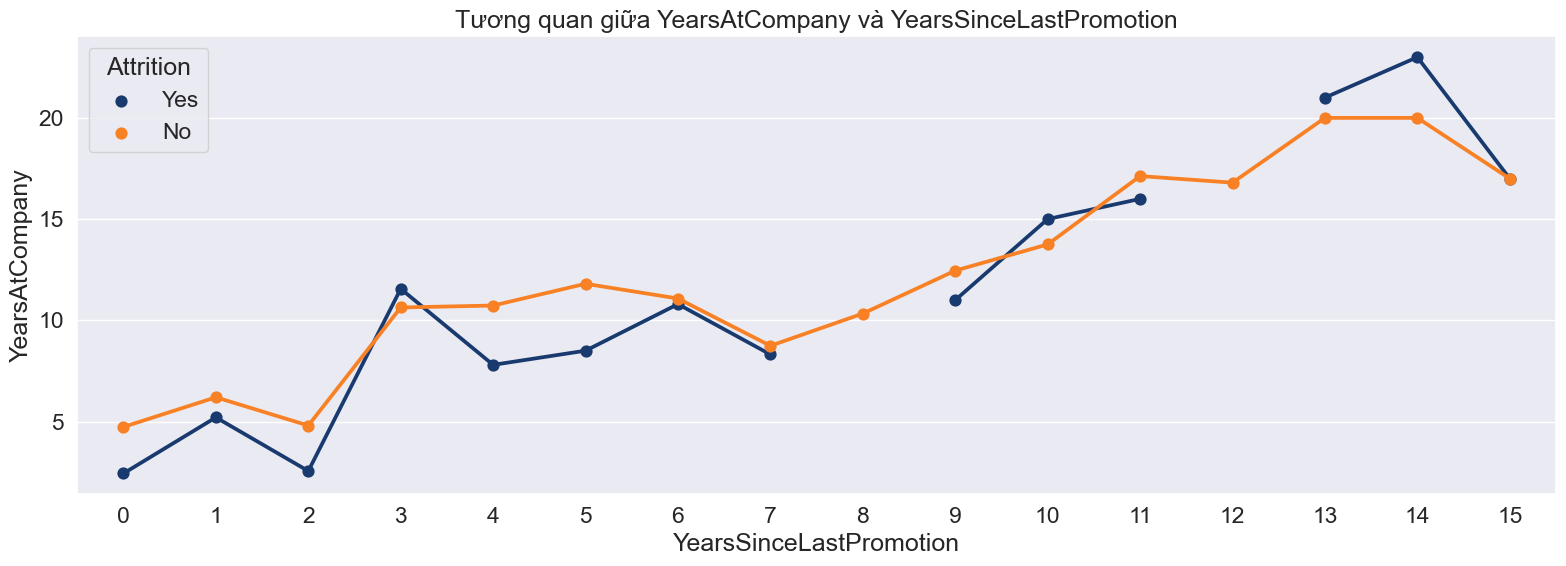

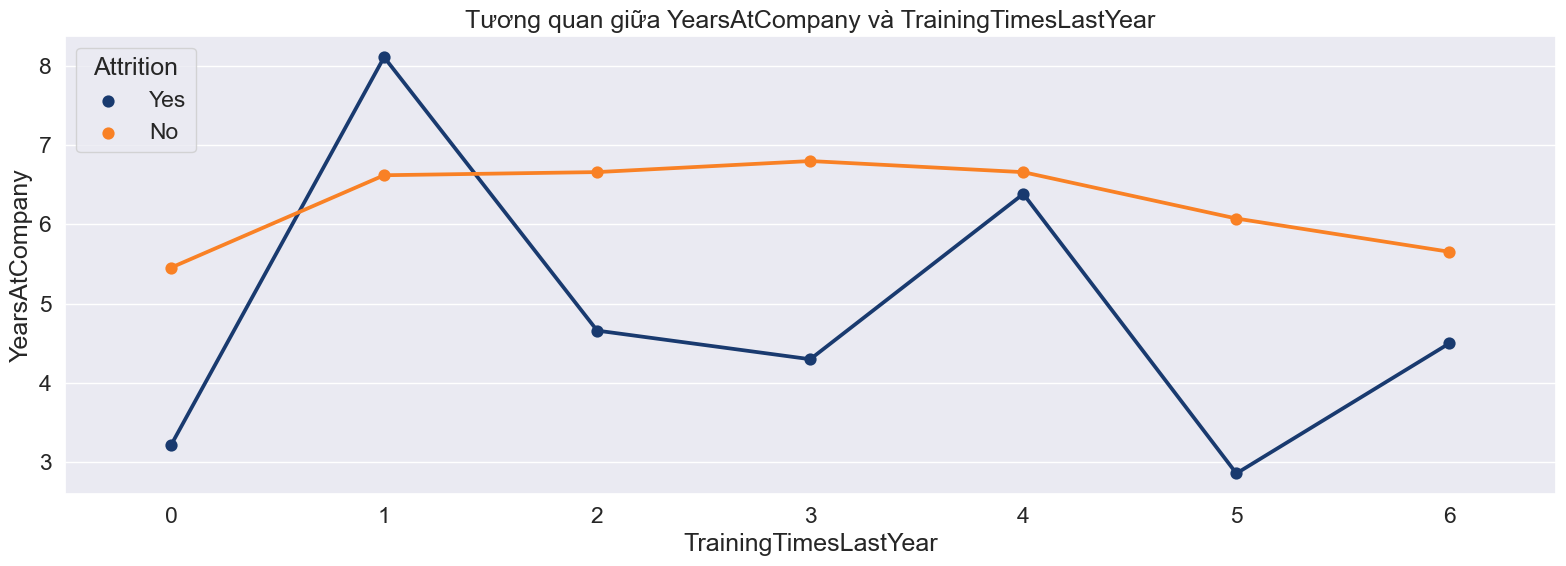

In [21]:
columns = ['TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'TrainingTimesLastYear']

for column in columns:
    fig, axes = plt.subplots(figsize=(16, 6))
    sns.pointplot(x=df[column], y=df['YearsAtCompany'], hue=df['Attrition'], palette=['#193a6f', '#f98125'], errorbar=None)
    plt.title(f'Tương quan giữa YearsAtCompany và {column}')
    plt.xlabel(column)
    plt.ylabel('YearsAtCompany')
    plt.legend(title='Attrition', loc='upper left')
    plt.tight_layout()
    plt.show()

#### Tương quan về mức lương trả theo đơn vị thời gian

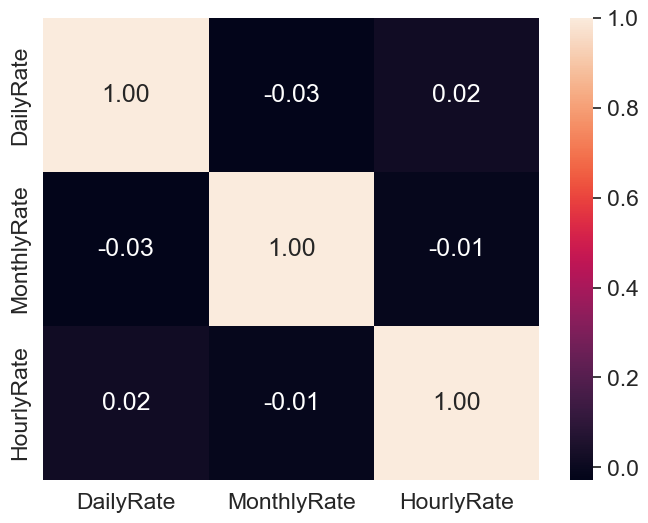

In [22]:
columns_of_interest = ['DailyRate', 'MonthlyRate', 'HourlyRate']

plt.figure(figsize=(8, 6))
sns.heatmap(df[columns_of_interest].corr(), annot=True, fmt='.2f')
plt.show()

#### Quan hệ giữa MonthlyRate, MonthlyIncome và Attrition

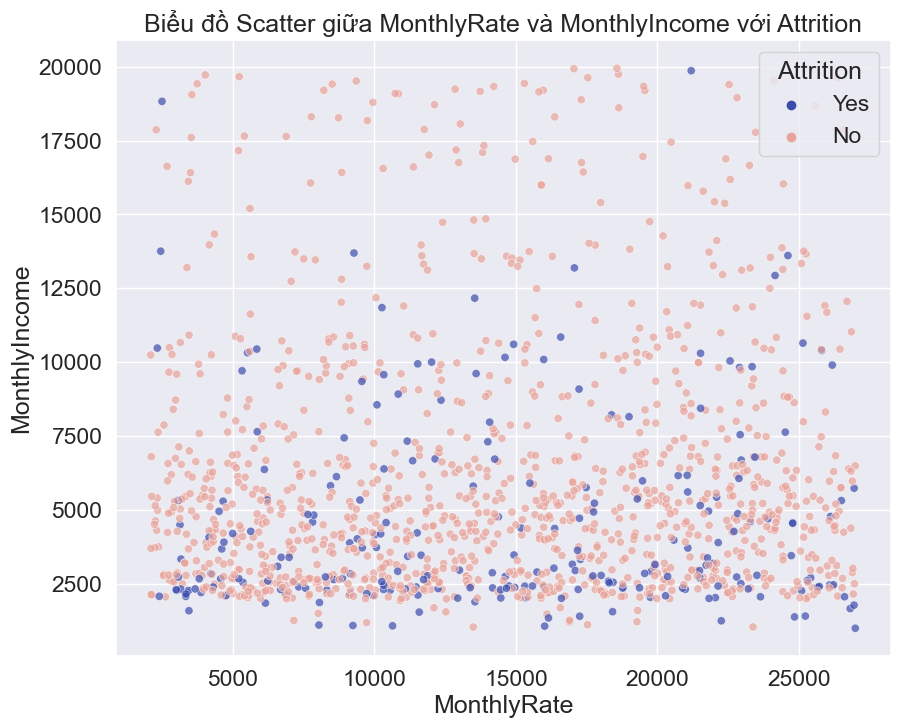

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='MonthlyRate', y='MonthlyIncome', hue='Attrition', data=df, alpha=0.7, palette=['#3c4cad', '#e8a49c'])

plt.xlabel('MonthlyRate')
plt.ylabel('MonthlyIncome')
plt.title('Biểu đồ Scatter giữa MonthlyRate và MonthlyIncome với Attrition')

plt.legend(title='Attrition')
plt.show()

#### Quan hệ giữa MonthlyRate, MonthlyIncome và YearsAtCompany

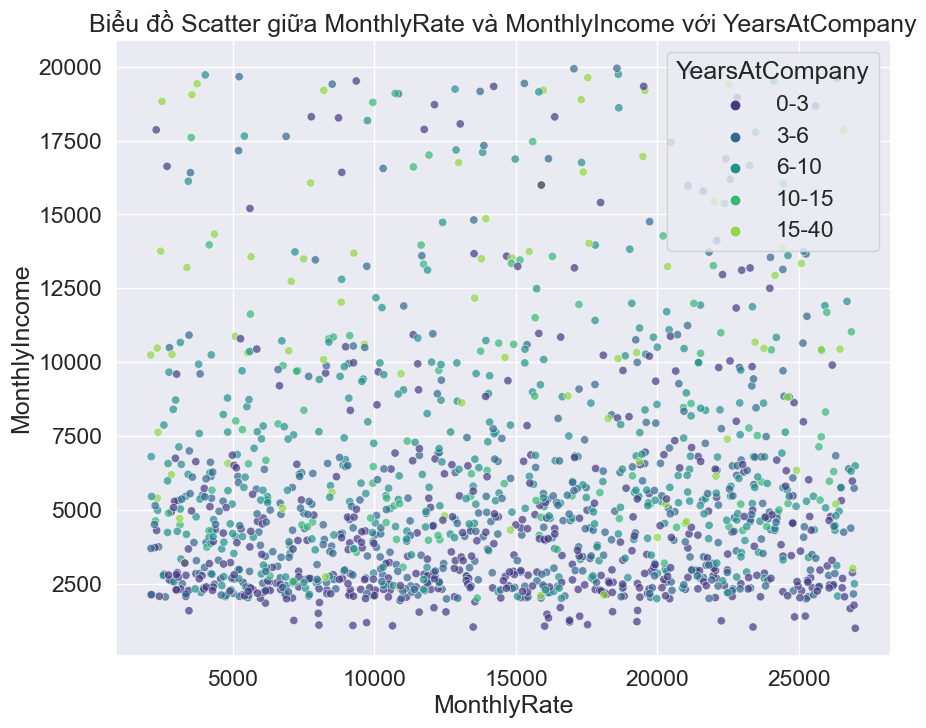

In [24]:
df['YearsAtCompanyCategory'] = pd.cut(df['YearsAtCompany'], bins=[-1, 3, 6, 10, 15, 40], labels=['0-3', '3-6', '6-10', '10-15', '15-40'])

plt.figure(figsize=(10, 8))
sns.scatterplot(x='MonthlyRate', y='MonthlyIncome', hue='YearsAtCompanyCategory', data=df, palette='viridis', alpha=0.7)

plt.xlabel('MonthlyRate')
plt.ylabel('MonthlyIncome')
plt.title('Biểu đồ Scatter giữa MonthlyRate và MonthlyIncome với YearsAtCompany')

plt.legend(title='YearsAtCompany')
plt.show()

df.drop('YearsAtCompanyCategory', axis=1, inplace=True)

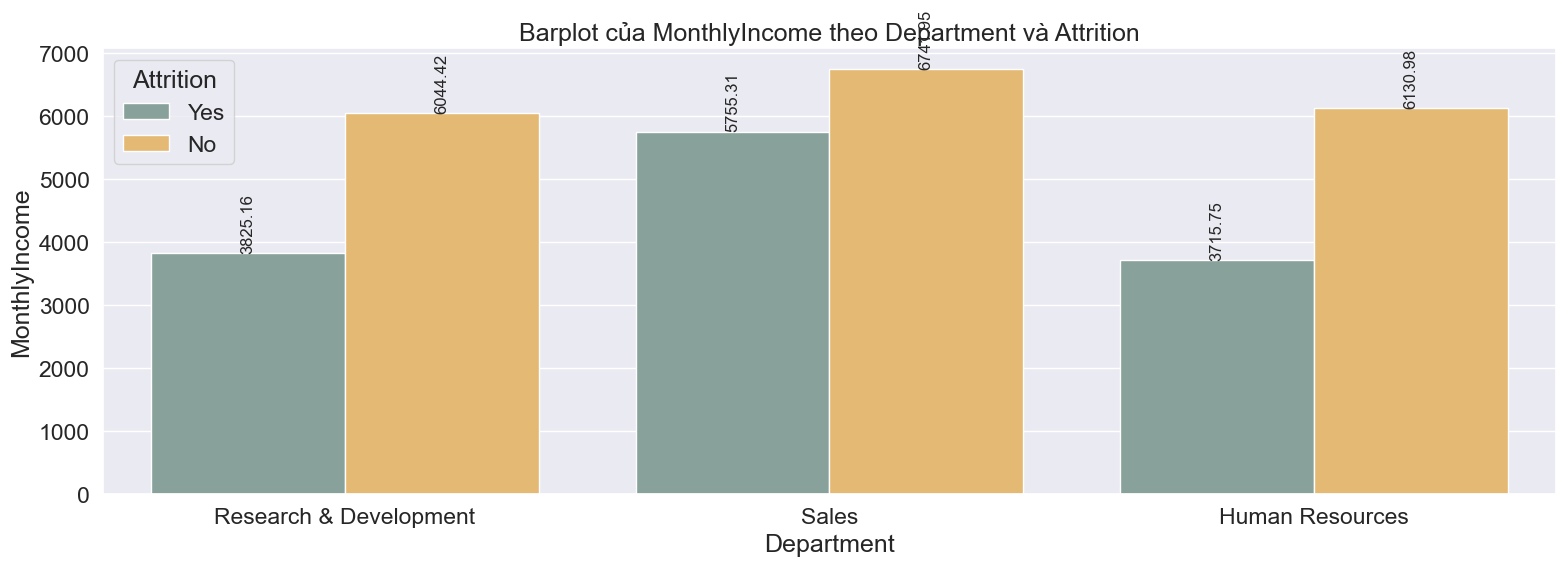

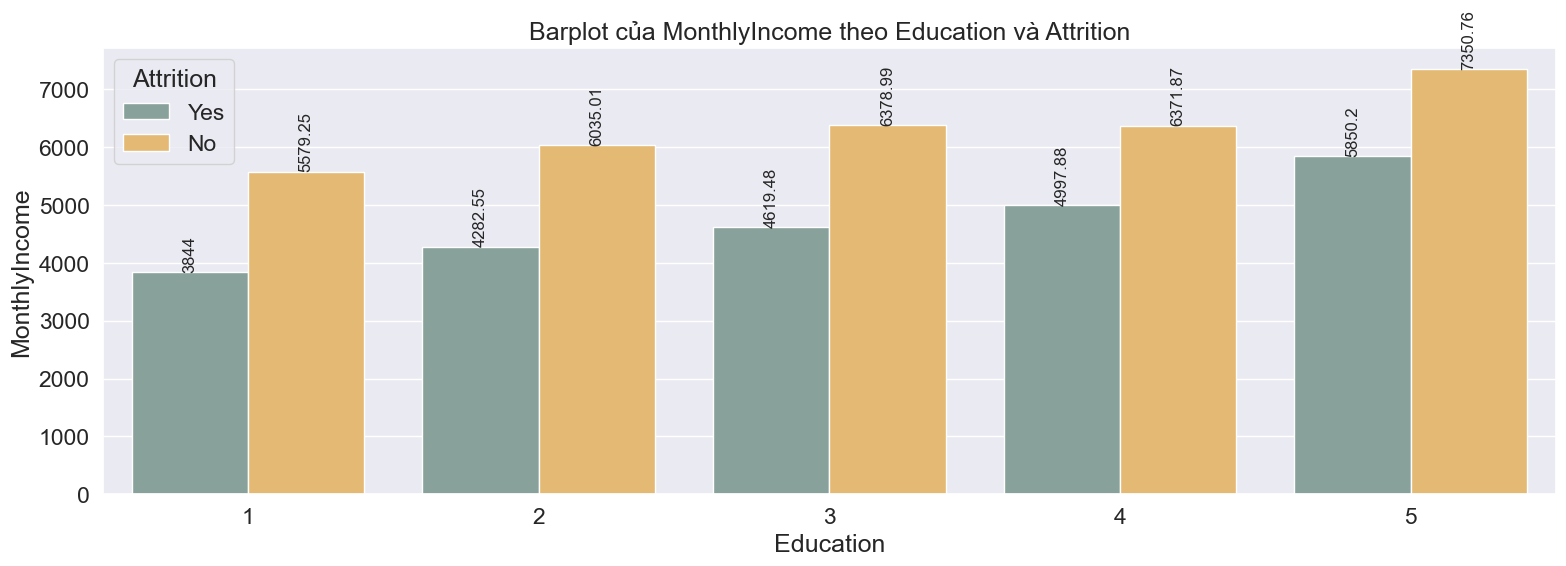

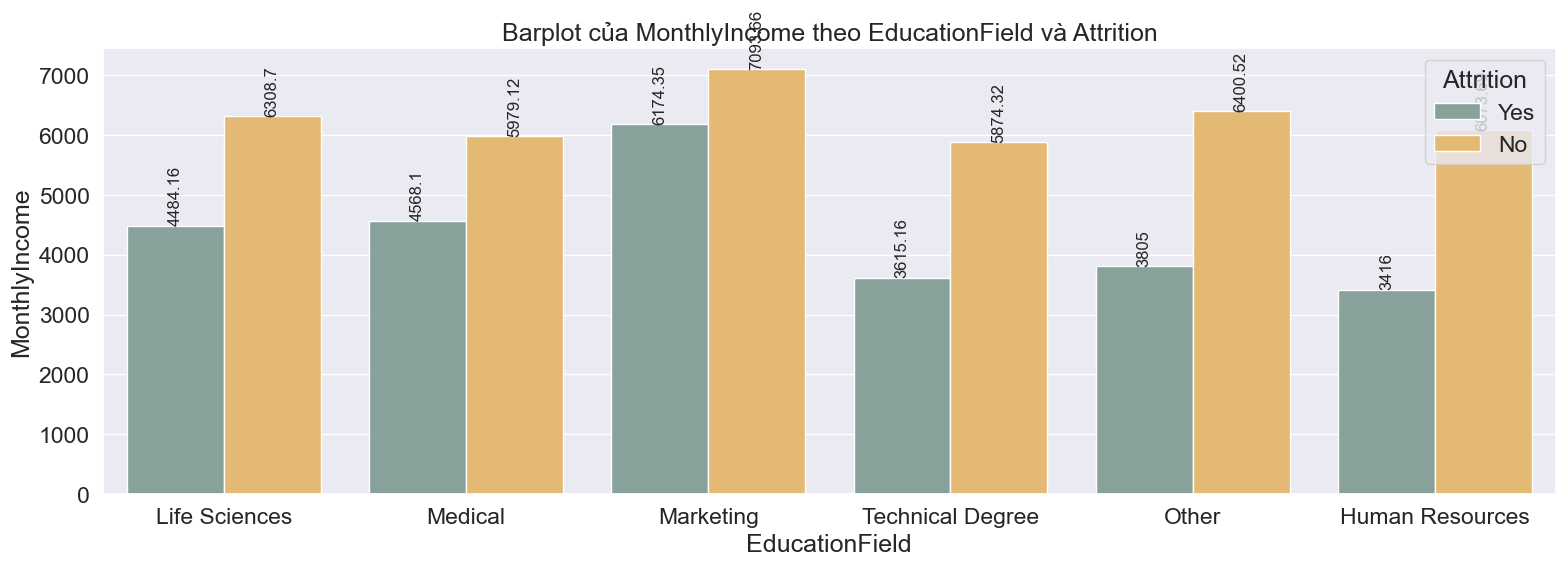

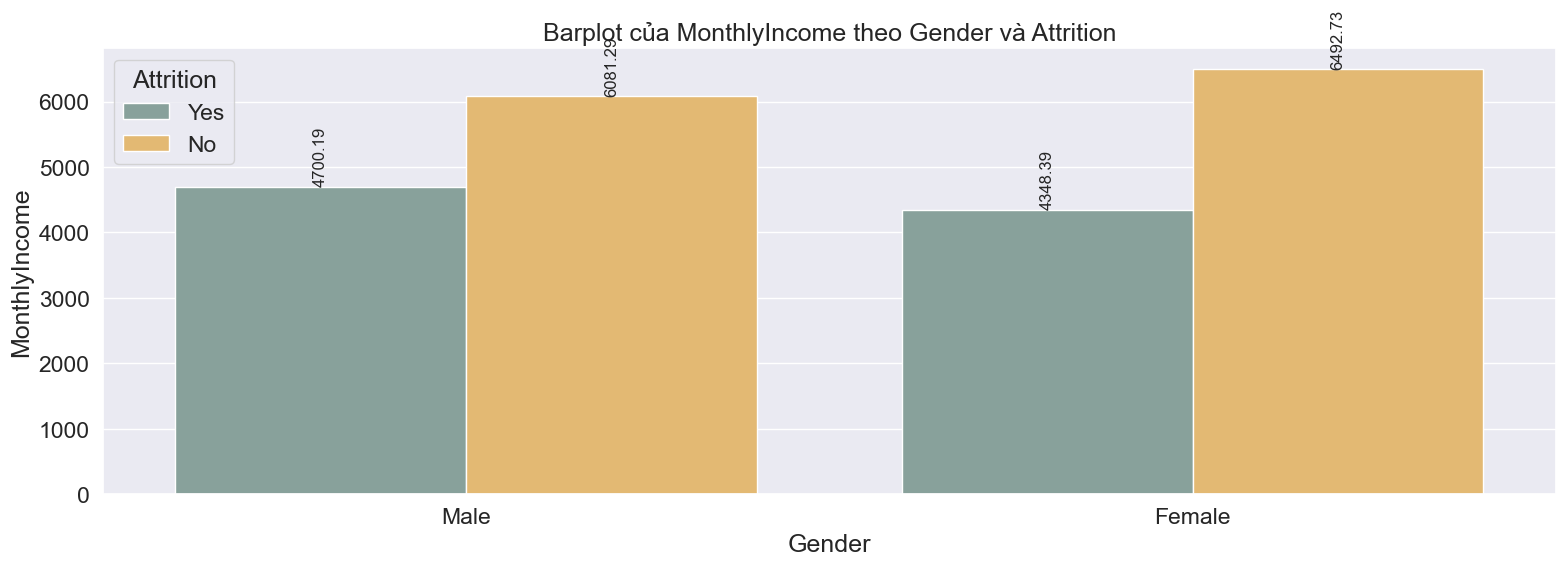

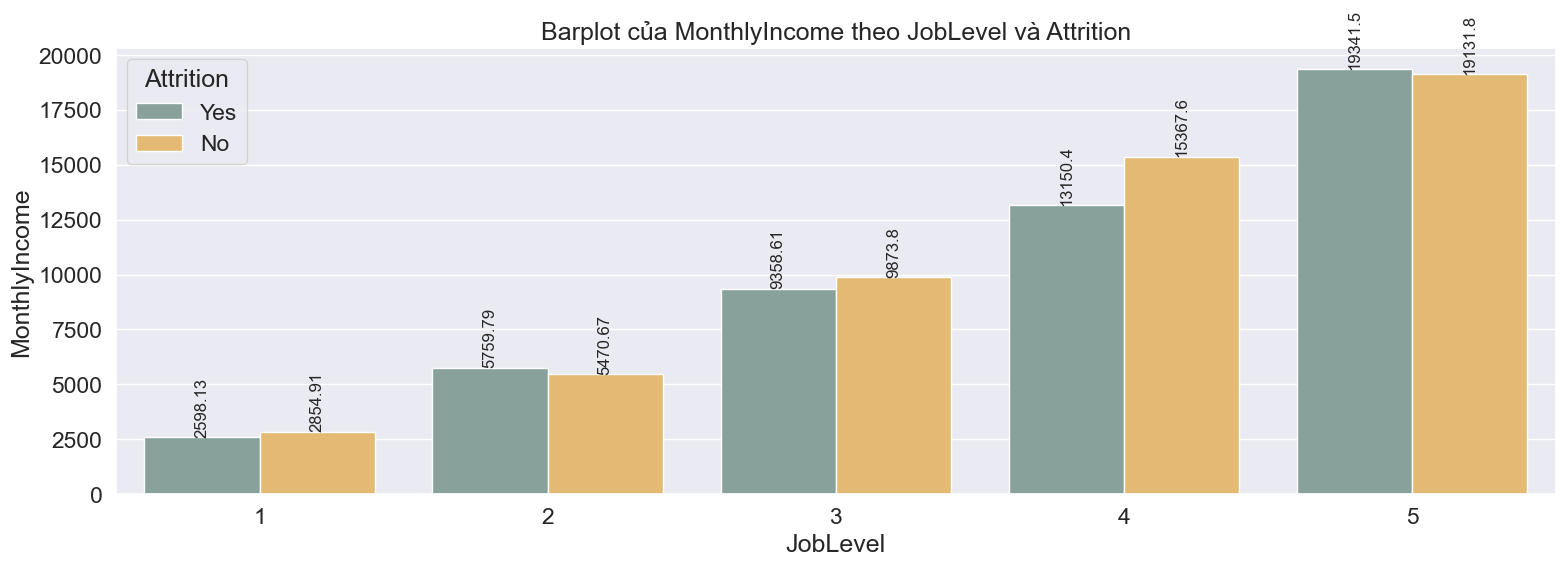

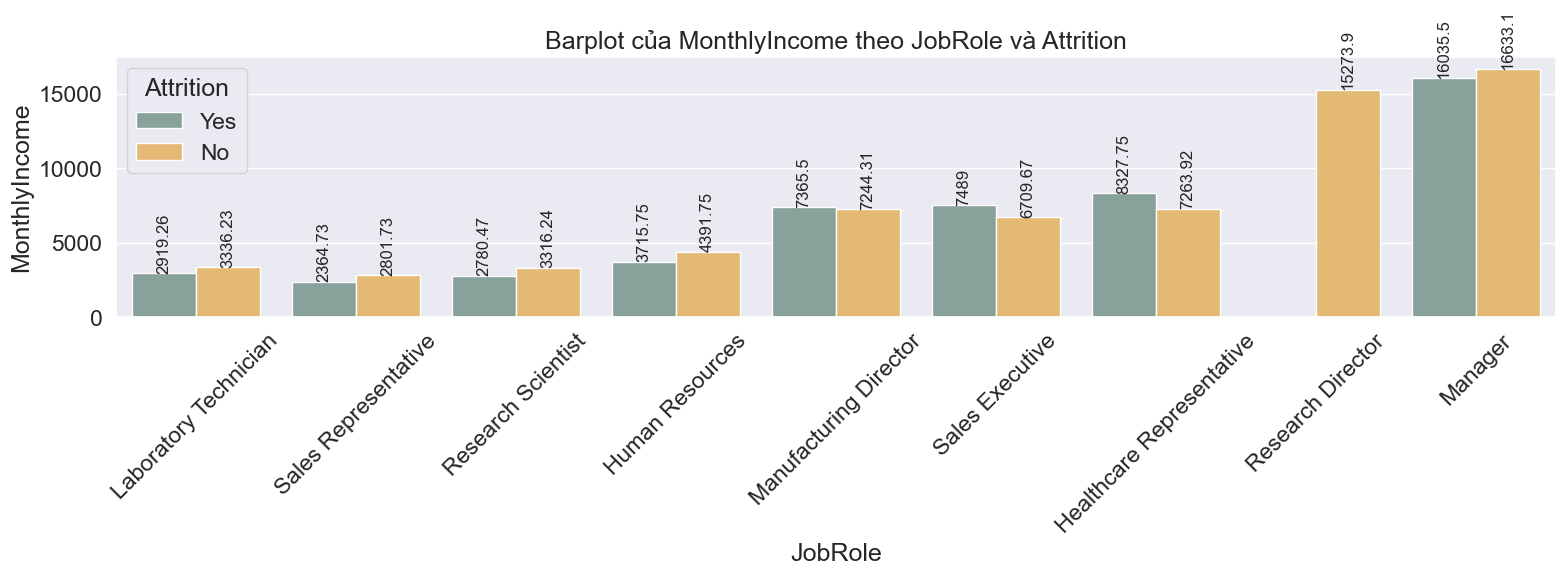

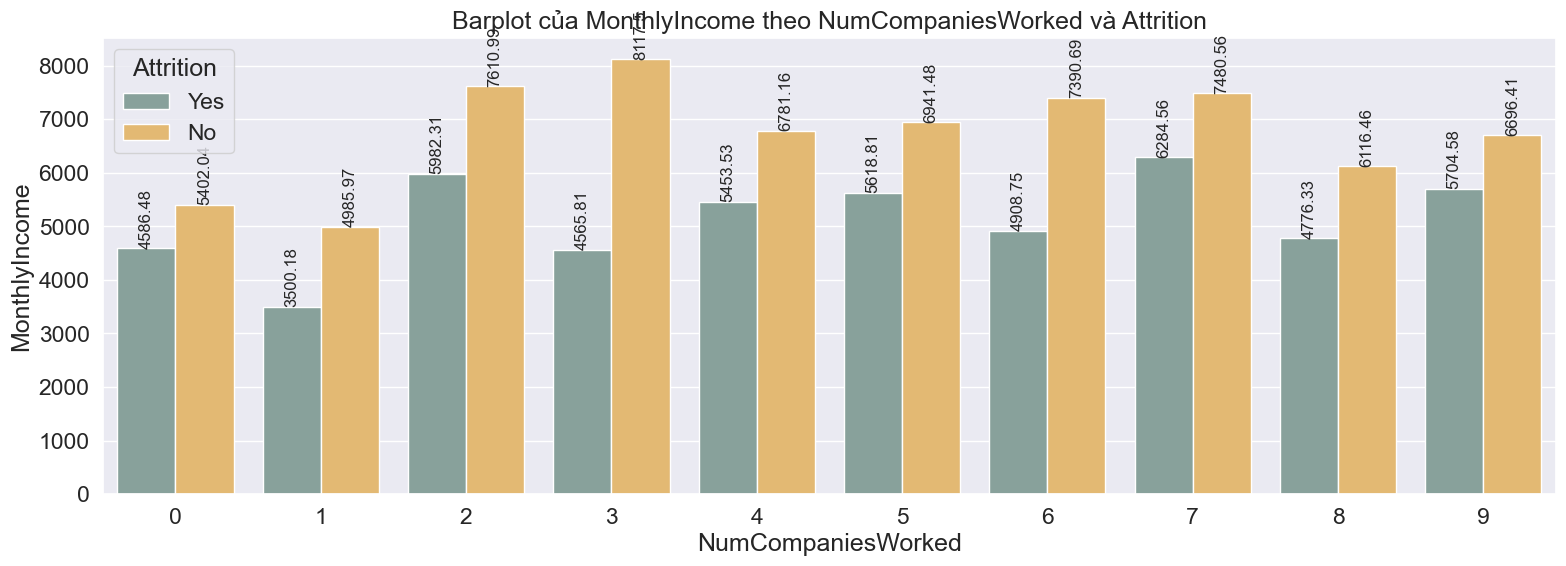

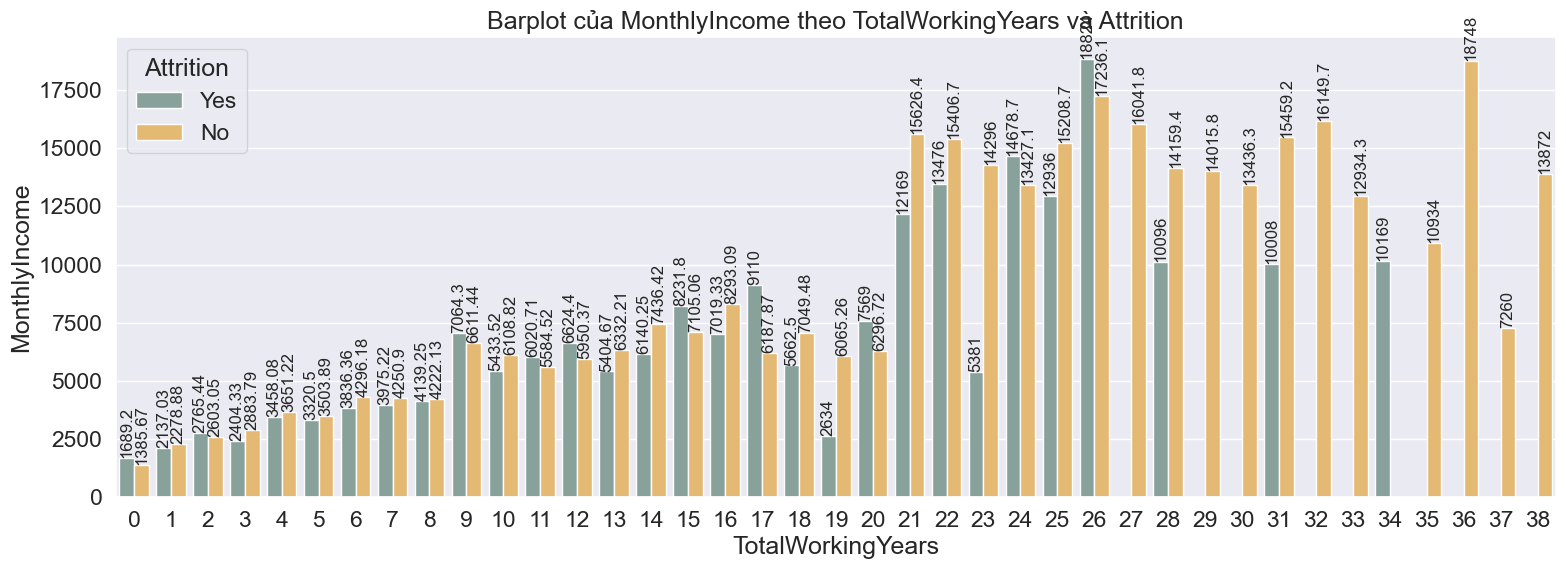

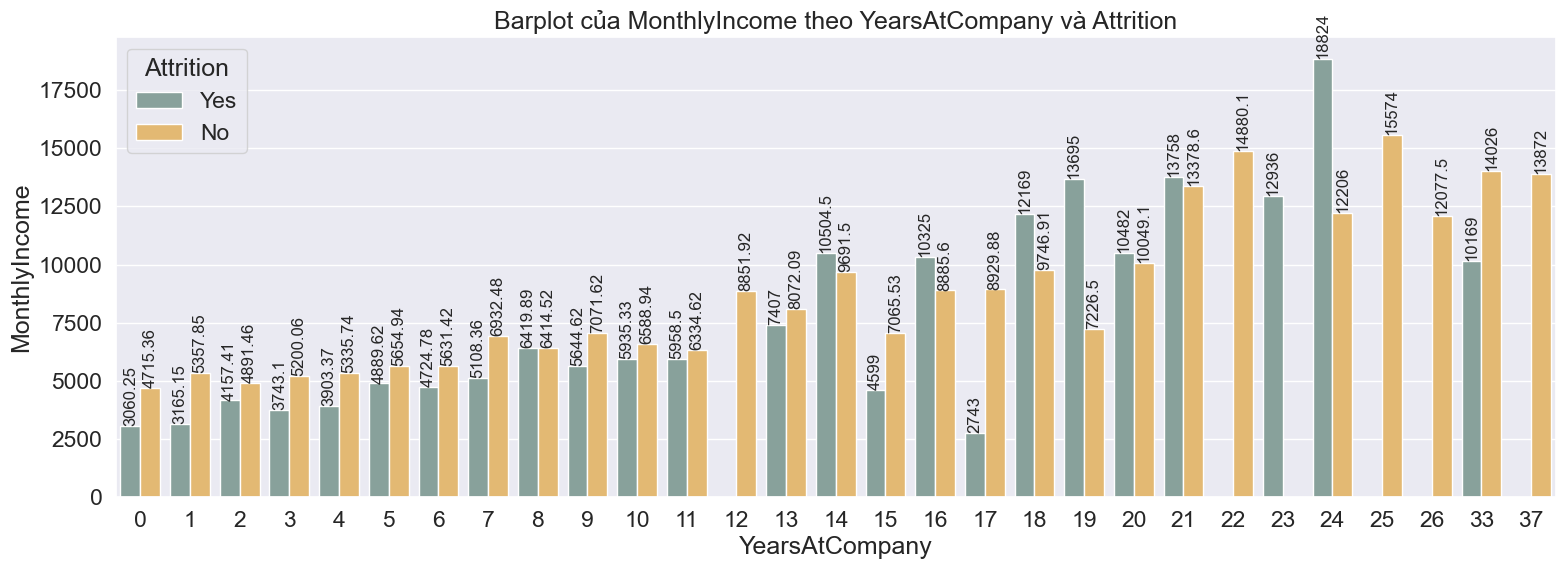

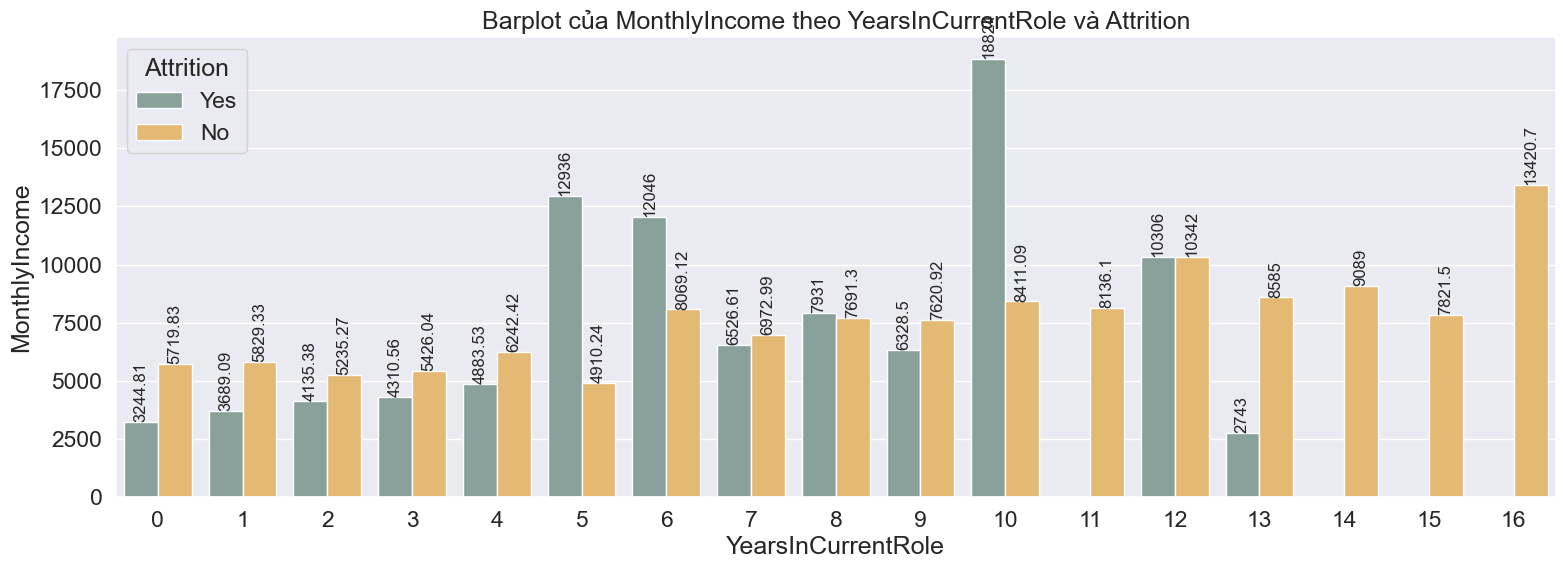

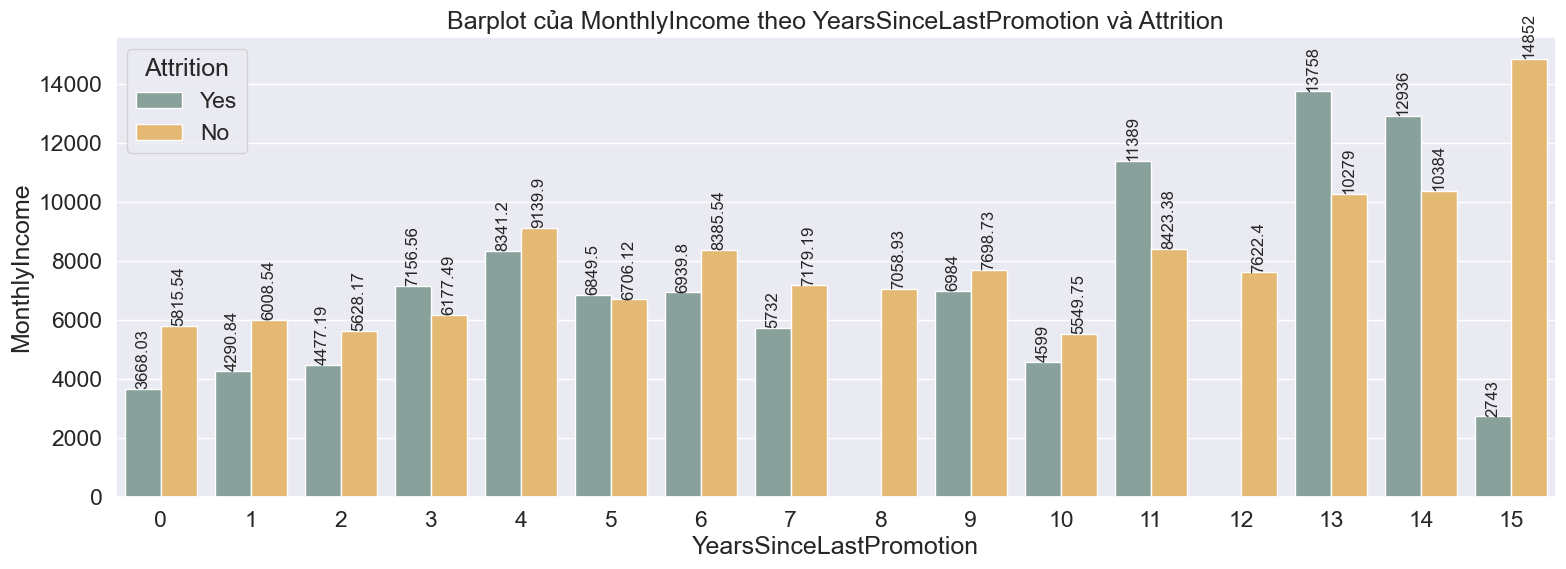

In [25]:
columns = ['Department', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
           'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany',
           'YearsInCurrentRole', 'YearsSinceLastPromotion']

for col in columns:
    fig, axes = plt.subplots(figsize=(16, 6))
    
    rotation_angle = 45 if col == 'JobRole' else 0
    
    sns.barplot(x=df[col], y=df['MonthlyIncome'], hue=df['Attrition'], palette=['#84a59d', '#f6bd60'], errorbar=None)
    plt.xticks(rotation=rotation_angle)
    
    for cont in axes.containers:
        axes.bar_label(cont, rotation=90, fontsize=12)
    
    plt.tight_layout()
    plt.title(f'Barplot của MonthlyIncome theo {col} và Attrition')
    plt.show()

#### Đánh giá
- Nhìn chung trung bình thu nhập hàng tháng của những nhân viên rời công ty thấp hơn những người ở lại, dù xét theo yếu tố bộ phận làm việc, trình độ, chuyên ngành, vị trí công việc, số năm đã làm việc,...
- Chỉ có một số ngoại lệ ở các biến liên quan đến thời gian làm việc, thời gian gắn bó,...

## 3. Mã hoá dữ liệu

### Kiểm tra tần suất xuất hiện của thuộc tính

In [26]:
for col_name in df.columns:
    if df[col_name].dtype == 'object' and col_name != 'EmpID':
        count = df[col_name].value_counts()
        print(f"Tần suất xuất hiện thuộc tính '{col_name}':")
        print(count)
        print()

Tần suất xuất hiện thuộc tính 'Attrition':
Attrition
No     1164
Yes     233
Name: count, dtype: int64

Tần suất xuất hiện thuộc tính 'BusinessTravel':
BusinessTravel
Travel_Rarely        983
Travel_Frequently    265
Non-Travel           142
TravelRarely           7
Name: count, dtype: int64

Tần suất xuất hiện thuộc tính 'Department':
Department
Research & Development    912
Sales                     427
Human Resources            58
Name: count, dtype: int64

Tần suất xuất hiện thuộc tính 'EducationField':
EducationField
Life Sciences       581
Medical             434
Marketing           151
Technical Degree    126
Other                82
Human Resources      23
Name: count, dtype: int64

Tần suất xuất hiện thuộc tính 'Gender':
Gender
Male      838
Female    559
Name: count, dtype: int64

Tần suất xuất hiện thuộc tính 'JobRole':
JobRole
Sales Executive              320
Research Scientist           290
Laboratory Technician        259
Manufacturing Director       144
Healthcare Repres

In [27]:
display(df.describe())
display(df.describe(include='object'))

Age    DailyRate  DistanceFromHome    Education  \
count  1397.000000  1397.000000       1397.000000  1397.000000   
mean     36.331424   803.983536          9.246242     2.898354   
std       8.890110   402.440637          8.068532     1.019005   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   468.000000          2.000000     2.000000   
50%      35.000000   805.000000          7.000000     3.000000   
75%      42.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1397.000000  1397.000000     1397.000000  1397.000000   
mean                  2.722262    65.912670        2.730136     1.947745   
std                   1.092511    20.331341        0.710775     0.993238   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    84.000000        3.000000     2.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count      1397.000000    1397.000000   1397.000000         1397.000000   
mean          2.742305    5969.684324  14337.543307            2.668576   
std           1.101324    4121.679047   7089.980271            2.476762   
min           1.000000    1009.000000   2094.000000            0.000000   
25%           2.000000    2851.000000   8232.000000            1.000000   
50%           3.000000    4739.000000  14242.000000            2.000000   
75%           4.000000    7403.000000  20467.000000            4.000000   
max           4.000000   19943.000000  26999.000000            9.000000   

       PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count        1397.000000        1397.000000               1397.000000   
mean           15.153901           3.146027                  2.694345   
std             3.592805           0.353260                  1.080726   
min            11.000000           3.000000                  1.000000   
25%            12.000000           3.000000                  2.000000   
50%            14.000000           3.000000                  3.000000   
75%            18.000000           3.000000                  4.000000   
max            25.000000           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1397.000000        1397.000000            1397.000000   
mean           0.785970          10.425197               2.797423   
std            0.849323           6.868674               1.272835   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000           9.000000               3.000000   
75%            1.000000          14.000000               3.000000   
max            3.000000          38.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1397.000000     1397.000000         1397.000000   
mean          2.760916        6.261274            3.969220   
std           0.711221        4.956807            3.377797   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       37.000000           16.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1397.000000           1397.000000  
mean                  1.828203              3.796707  
std                   2.648561              3.303235  


EmpID Attrition BusinessTravel              Department  \
count     1397      1397           1397                    1397   
unique    1394         2              4                       3   
top     RM1467        No  Travel_Rarely  Research & Development   
freq         2      1164            983                     912   

       EducationField Gender          JobRole MaritalStatus SalarySlab  \
count            1397   1397             1397          1397       1397   
unique              6      2                9             3          4   
top     Life Sciences   Male  Sales Executive       Married    Upto 5k   
freq              581    838              320           635        748   

       OverTime  
count      1397  
unique        2  
top          No  
freq        997

### Chia dữ liệu thành các khoảng

In [28]:
df['Age'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60])

bin_counts = df['Age'].value_counts()
print(bin_counts)

Age
(30, 40]    608
(0, 30]     387
(40, 50]    286
(50, 60]    116
Name: count, dtype: int64


In [29]:
df['DistanceFromHome'] = pd.cut(df['DistanceFromHome'], bins=[0, 3, 7, 15, 30])

bin_counts = df['DistanceFromHome'].value_counts()
print(bin_counts)

DistanceFromHome
(0, 3]      466
(7, 15]     355
(15, 30]    314
(3, 7]      262
Name: count, dtype: int64


In [30]:
df['MonthlyIncome'] = pd.cut(df['MonthlyIncome'], bins=[1000, 3000, 6000, 12000, 20000])

bin_counts = df['MonthlyIncome'].value_counts()
print(bin_counts)

MonthlyIncome
(3000, 6000]      516
(1000, 3000]      396
(6000, 12000]     354
(12000, 20000]    131
Name: count, dtype: int64


In [31]:
df['NumCompaniesWorked'] = pd.cut(df['NumCompaniesWorked'], bins=[-1, 1, 4, 7, 10])

bin_counts = df['NumCompaniesWorked'].value_counts()
print(bin_counts)

NumCompaniesWorked
(-1, 1]    685
(1, 4]     423
(4, 7]     198
(7, 10]     91
Name: count, dtype: int64


In [32]:
df['TotalWorkingYears'] = pd.cut(df['TotalWorkingYears'], bins=[-1, 3, 6, 10, 15, 40])

bin_counts = df['TotalWorkingYears'].value_counts()
print(bin_counts)

TotalWorkingYears
(6, 10]     481
(15, 40]    285
(3, 6]      277
(10, 15]    189
(-1, 3]     165
Name: count, dtype: int64


In [33]:
df['YearsAtCompany'] = pd.cut(df['YearsAtCompany'], bins=[-1, 3, 6, 10, 15, 40])

bin_counts = df['YearsAtCompany'].value_counts()
print(bin_counts)

YearsAtCompany
(-1, 3]     466
(3, 6]      381
(6, 10]     366
(10, 15]    106
(15, 40]     78
Name: count, dtype: int64


In [34]:
df['YearsInCurrentRole'] = pd.cut(df['YearsInCurrentRole'], bins=[-1, 3, 5, 10, 18])

bin_counts = df['YearsInCurrentRole'].value_counts()
print(bin_counts)

YearsInCurrentRole
(-1, 3]     800
(5, 10]     401
(3, 5]      138
(10, 18]     58
Name: count, dtype: int64


In [35]:
df['YearsSinceLastPromotion'] = pd.cut(df['YearsSinceLastPromotion'], bins=[-1, 1, 3, 5, 15])

bin_counts = df['YearsSinceLastPromotion'].value_counts()
print(bin_counts)

YearsSinceLastPromotion
(-1, 1]    930
(1, 3]     203
(5, 15]    164
(3, 5]     100
Name: count, dtype: int64


In [36]:
df['HourlyRate'] = pd.cut(df['HourlyRate'], bins=[20, 40, 60, 80, 110])

bin_counts = df['HourlyRate'].value_counts()
print(bin_counts)

HourlyRate
(80, 110]    413
(40, 60]     412
(60, 80]     391
(20, 40]     181
Name: count, dtype: int64


In [37]:
df['DailyRate'] = pd.cut(df['DailyRate'], bins=[100, 250, 500, 1000, 1500])

bin_counts = df['DailyRate'].value_counts()
print(bin_counts)

DailyRate
(500, 1000]     521
(1000, 1500]    495
(250, 500]      237
(100, 250]      144
Name: count, dtype: int64


In [38]:
df['MonthlyRate'] = pd.cut(df['MonthlyRate'], bins=[2000, 7500, 15000, 20000, 30000])

bin_counts = df['MonthlyRate'].value_counts()
print(bin_counts)

MonthlyRate
(7500, 15000]     427
(20000, 30000]    378
(2000, 7500]      309
(15000, 20000]    283
Name: count, dtype: int64


In [39]:
df['PercentSalaryHike'] = pd.cut(df['PercentSalaryHike'], bins=[10, 15, 20, 25])

bin_counts = df['PercentSalaryHike'].value_counts()
print(bin_counts)

PercentSalaryHike
(10, 15]    876
(15, 20]    370
(20, 25]    151
Name: count, dtype: int64


In [40]:
df['TrainingTimesLastYear'] = pd.cut(df['TrainingTimesLastYear'], bins=[-1, 1, 3, 5, 8])

bin_counts = df['TrainingTimesLastYear'].value_counts()
print(bin_counts)

TrainingTimesLastYear
(1, 3]     994
(3, 5]     228
(-1, 1]    114
(5, 8]      61
Name: count, dtype: int64


In [41]:
df['YearsWithCurrManager'] = pd.cut(df['YearsWithCurrManager'], bins=[-1, 3, 5, 10, 20])

bin_counts = df['YearsWithCurrManager'].value_counts()
print(bin_counts)

YearsWithCurrManager
(-1, 3]     840
(5, 10]     386
(3, 5]      121
(10, 20]     50
Name: count, dtype: int64


### Mã hoá các biến

In [42]:
df['BusinessTravel'] = df['BusinessTravel'].replace('TravelRarely', 'Travel_Rarely')

business_travel_mapping = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
df['BusinessTravel'] = df['BusinessTravel'].map(business_travel_mapping)

bin_counts = df['BusinessTravel'].value_counts()
print(bin_counts)

BusinessTravel
1    990
2    265
0    142
Name: count, dtype: int64


In [43]:
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_mapping)

marital_status_mapping = {'Single': 0, 'Married': 1, 'Divorced': 2}
df['MaritalStatus'] = df['MaritalStatus'].map(marital_status_mapping)

salary_slab_mapping = {'Upto 5k': 0, '5k-10k': 1, '10k-15k': 2, '15k+': 3}
df['SalarySlab'] = df['SalarySlab'].map(salary_slab_mapping)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmpID                     1397 non-null   object  
 1   Age                       1397 non-null   category
 2   Attrition                 1397 non-null   object  
 3   BusinessTravel            1397 non-null   int64   
 4   DailyRate                 1397 non-null   category
 5   Department                1397 non-null   object  
 6   DistanceFromHome          1397 non-null   category
 7   Education                 1397 non-null   int64   
 8   EducationField            1397 non-null   object  
 9   EnvironmentSatisfaction   1397 non-null   int64   
 10  Gender                    1397 non-null   int64   
 11  HourlyRate                1397 non-null   category
 12  JobInvolvement            1397 non-null   int64   
 13  JobLevel                  1397 non-null   int64 

In [45]:
df["Attrition"] = lb_make.fit_transform(df["Attrition"])

df["Age"] = lb_make.fit_transform(df["Age"])
df["Department"] = lb_make.fit_transform(df["Department"])
df["DistanceFromHome"] = lb_make.fit_transform(df["DistanceFromHome"])
df["JobRole"] = lb_make.fit_transform(df["JobRole"])

df["MonthlyIncome"] = lb_make.fit_transform(df["MonthlyIncome"])
df["NumCompaniesWorked"] = lb_make.fit_transform(df["NumCompaniesWorked"])
df["OverTime"] = lb_make.fit_transform(df["OverTime"])

df["TotalWorkingYears"] = lb_make.fit_transform(df["TotalWorkingYears"])
df["YearsAtCompany"] = lb_make.fit_transform(df["YearsAtCompany"])
df["YearsInCurrentRole"] = lb_make.fit_transform(df["YearsInCurrentRole"])
df["YearsSinceLastPromotion"] = lb_make.fit_transform(df["YearsSinceLastPromotion"])

df["EducationField"] = lb_make.fit_transform(df["EducationField"])
df["HourlyRate"] = lb_make.fit_transform(df["HourlyRate"])
df["DailyRate"] = lb_make.fit_transform(df["DailyRate"])
df["MonthlyRate"] = lb_make.fit_transform(df["MonthlyRate"])

df["PercentSalaryHike"] = lb_make.fit_transform(df["PercentSalaryHike"])
df["TrainingTimesLastYear"] = lb_make.fit_transform(df["TrainingTimesLastYear"])
df["YearsWithCurrManager"] = lb_make.fit_transform(df["YearsWithCurrManager"])

df.head(5)

EmpID  Age  Attrition  BusinessTravel  DailyRate  Department  \
0  RM297    0          1               1          0           1   
1  RM302    0          0               1          2           2   
2  RM458    0          1               2          3           2   
3  RM728    0          0               0          1           1   
4  RM829    0          1               0          0           1   

   DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0                 0          3               1                        3   
1                 2          3               3                        4   
2                 1          3               2                        2   
3                 1          2               1                        2   
4                 2          1               3                        3   

   Gender  HourlyRate  JobInvolvement  JobLevel  JobRole  JobSatisfaction  \
0       0           1               3         1        2                3   
1       1           2               2         1        8                3   
2       0           2               3         1        8                2   
3       0           2               3         1        6                4   
4       0           2               3         1        2                3   

   MaritalStatus  MonthlyIncome  SalarySlab  MonthlyRate  NumCompaniesWorked  \
0              0              0           0            3                   0   
1              0              0           0            1                   0   
2              0              0           0            1                   0   
3              0              0           0            1                   0   
4              0              0           0            1                   0   

   OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0         0                  0                  3                         3   
1         0                  0                  3                         1   
2         1                  0                  3                         4   
3         0                  0                  3                         4   
4         0                  0                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  0                      1   
1                 0                  0                      1   
2                 0                  0                      1   
3                 0                  0                      1   
4                 0                  0                      0   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                3               0                   0   
1                3               0                   0   
2                3               0                   0   
3                3               0                   0   
4                3               0                   0   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        0                     0  
2                        0                     0  
3                        0                     0  
4                        0                     0

### Ma trận tương quan mới

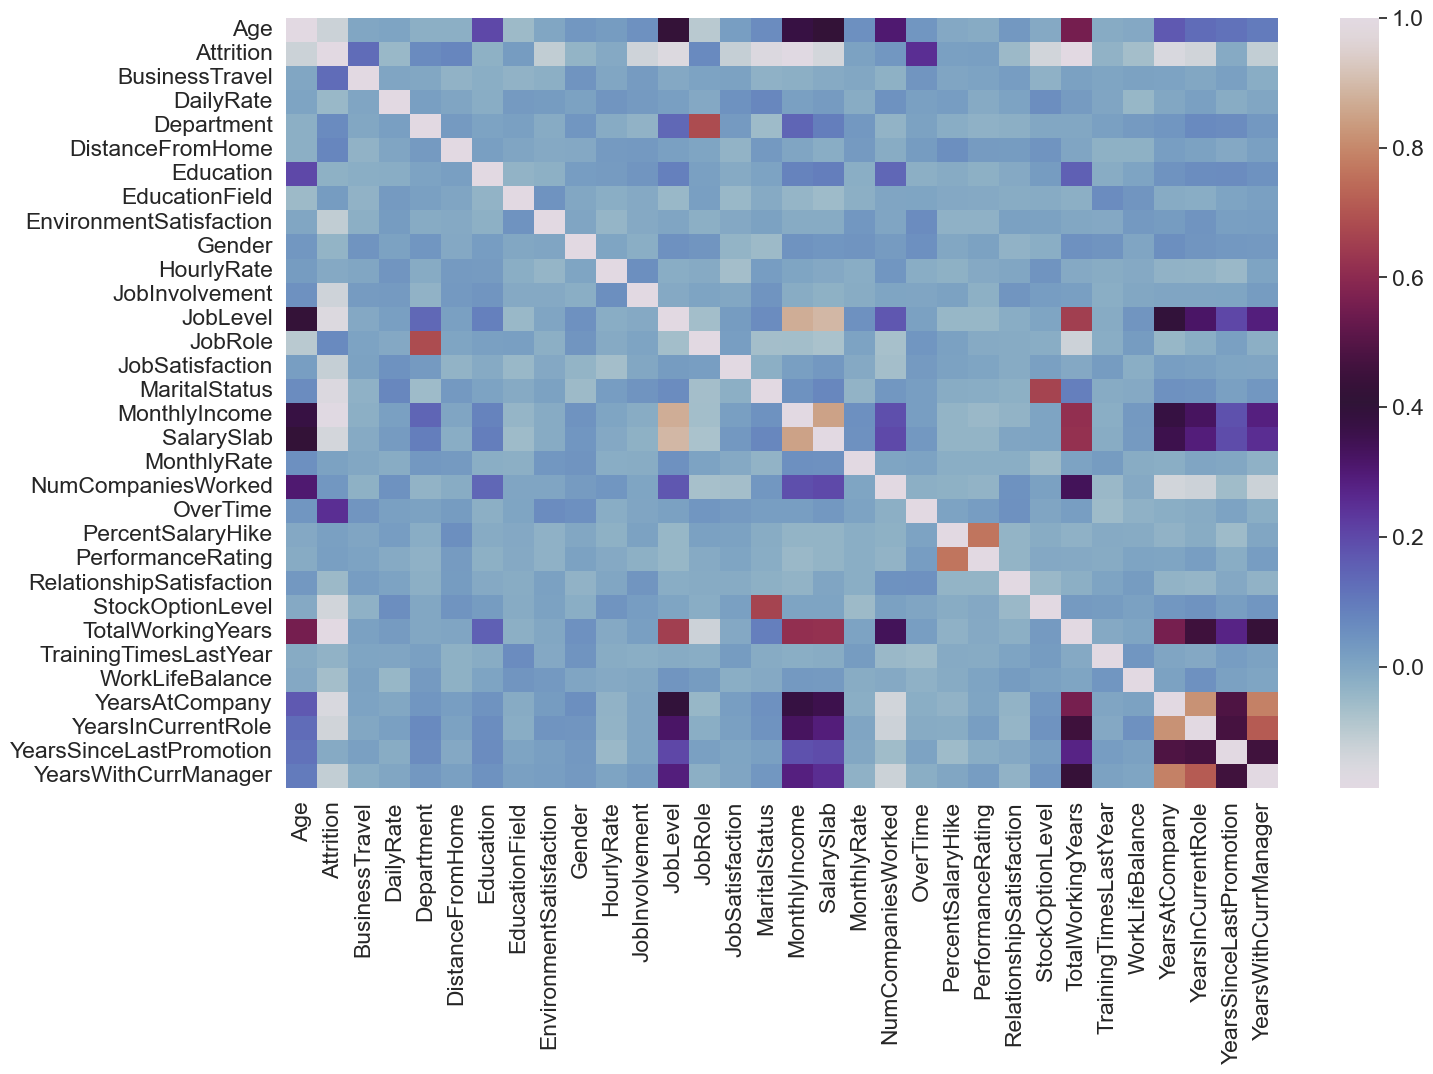

In [46]:
numeric_columns_new = df.select_dtypes(include=['int32', 'int64']).columns.tolist()
numeric_df_new = df[numeric_columns_new]

plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df_new.corr(), annot=False, fmt='.2f', cmap='twilight')
plt.show()

### Ma trận của các cột có tương quan cao sau khi mã hoá

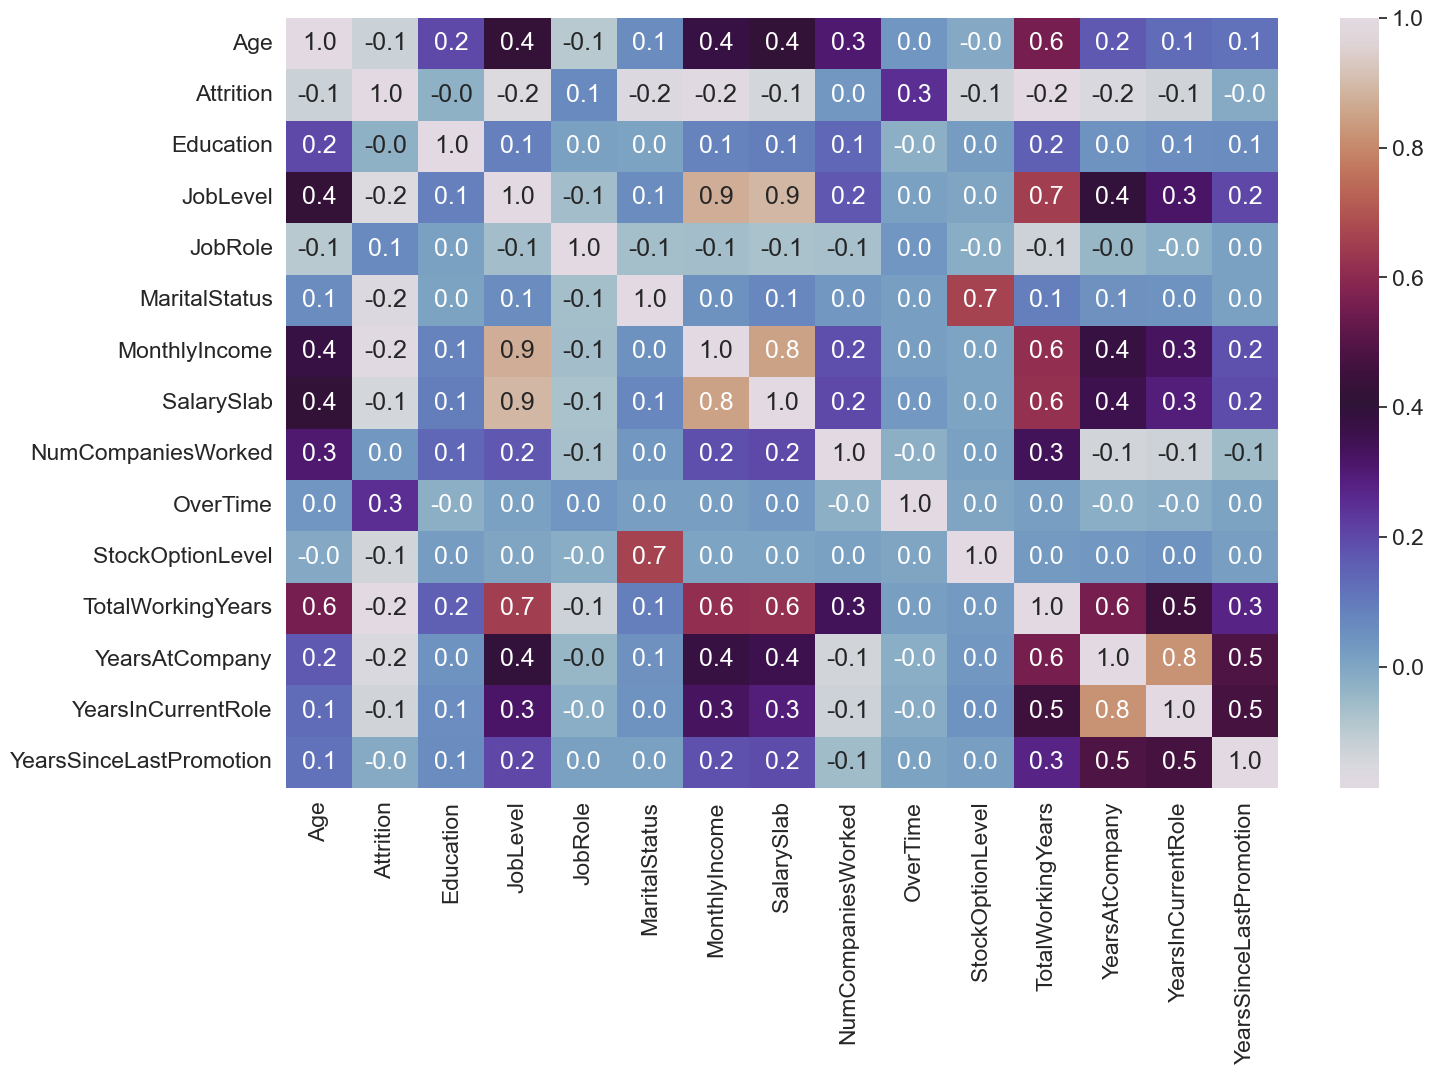

In [47]:
high_corr_columns_new = ['Age', 'Attrition', 'Education', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab', 'NumCompaniesWorked', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears',
                     'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']

plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df_new[high_corr_columns_new].corr(), annot=True, fmt='.1f', cmap='twilight')
plt.show()

## 4. Xây dựng mô hình

### 4.1. Phân chia dữ liệu

#### 4.1.1. Tạo 2 ma trận X và y lần lượt gồm các biến độc lập và biến phụ thuộc

In [48]:
X = df.drop(['EmpID', 'Attrition'], axis=1)
X.head(5)

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0    0               1          0           1                 0          3   
1    0               1          2           2                 2          3   
2    0               2          3           2                 1          3   
3    0               0          1           1                 1          2   
4    0               0          0           1                 2          1   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0               1                        3       0           1   
1               3                        4       1           2   
2               2                        2       0           2   
3               1                        2       0           2   
4               3                        3       0           2   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         1        2                3              0   
1               2         1        8                3              0   
2               3         1        8                2              0   
3               3         1        6                4              0   
4               3         1        2                3              0   

   MonthlyIncome  SalarySlab  MonthlyRate  NumCompaniesWorked  OverTime  \
0              0           0            3                   0         0   
1              0           0            1                   0         0   
2              0           0            1                   0         1   
3              0           0            1                   0         0   
4              0           0            1                   0         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                  0                  3                         3   
1                  0                  3                         1   
2                  0                  3                         4   
3                  0                  3                         4   
4                  0                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  0                      1   
1                 0                  0                      1   
2                 0                  0                      1   
3                 0                  0                      1   
4                 0                  0                      0   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                3               0                   0   
1                3               0                   0   
2                3               0                   0   
3                3               0                   0   
4                3               0                   0   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        0                     0  
2                        0                     0  
3                        0                     0  
4                        0                     0

In [49]:
y = df['Attrition']
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Attrition, dtype: int32

#### 4.1.2. Xây dựng tham số cho việc chia dữ liệu huấn luyện và kiểm thử

- Tỉ lệ tập huấn luyện/tập kiểm thử: 70/30, 80/20
- **Stratify** (Chia theo tỉ lệ): Chia dữ liệu sao cho tỷ lệ phân phối các lớp giữa tập huấn luyện và kiểm thử không biến đổi, nhằm *đảm bảo tính đại diện của mẫu cho mỗi lớp trong cả hai tập dữ liệu*
- **Shuffle**: Dữ liệu được trộn ngẫu nhiên trước khi chia *(Khi sử dụng stratify thì shuffle không nhận giá trị False)*

In [50]:
test_sizes = [0.3, 0.2]
stratify_values = [True, False, False]
shuffle_values = [True, False, True]

### 4.2. Xây dựng ban đầu các mô hình phân lớp và so sánh

- **Decision Tree**: Dựa trên cây quyết định, mỗi nút là một quyết định và mỗi lá là một dự đoán.
 
- **Random Forest**: Tập hợp nhiều cây quyết định và kết hợp kết quả để giảm overfitting và tăng ổn định, đối phó với nhiễu.

- **Naive Bayes**: Dựa trên định lý Bayes, giả định sự độc lập giữa các biến, đặc biệt hiệu quả cho dữ liệu văn bản. Sử dụng xác suất để dự đoán lớp của mẫu dựa trên thông tin biến độc lập.

- **Gradient Boosting**: Xây dựng các cây theo chuỗi, sửa lỗi của các cây trước đó để cải thiện độ chính xác, tạo ra mô hình mới với hiệu suất cao hơn.

- **Neural Network**: Mô phỏng cấu trúc não nhân tạo. Học đặc trưng phức tạp thông qua nhiều lớp để thực hiện dự đoán.

In [51]:
results = []
for test_size in test_sizes:
    for stratify_value, shuffle_value in zip(stratify_values, shuffle_values):
        if stratify_value:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, shuffle=shuffle_value, random_state=42)
        else:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=None, shuffle=shuffle_value, random_state=42)
        
        models = [
            DecisionTreeClassifier(criterion='gini', random_state=42),
            RandomForestClassifier(criterion='gini', random_state=42),
            GaussianNB(),
            GradientBoostingClassifier(random_state=42),
            MLPClassifier(random_state=42, max_iter=1000)
        ]

        model_names = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Boosting', 'Neural Network']
        
        accuracy = []
        roc_auc = []
        precision = []
        recall = []
        f1 = []
        
        for model in models:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            accuracy.append(accuracy_score(y_test, y_pred))
            roc_auc.append(roc_auc_score(y_test, y_pred))
            precision.append(precision_score(y_test, y_pred))
            recall.append(recall_score(y_test, y_pred))
            f1.append(f1_score(y_test, y_pred))

        result_df = pd.DataFrame({
            'Model': model_names,
            'Accuracy': accuracy,
            'ROC AUC': roc_auc,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
        
        result_df['Test Size'] = test_size
        result_df['Stratify'] = stratify_value
        result_df['Shuffle'] = shuffle_value
        
        results.append(result_df)

In [52]:
model_comparison = pd.concat(results, ignore_index=True)

In [53]:
gb_results = model_comparison.query("Model == 'Gradient Boosting'")
gb_results

Model  Accuracy   ROC AUC  Precision    Recall  F1 Score  \
3   Gradient Boosting  0.864286  0.621429   0.782609  0.257143  0.387097   
8   Gradient Boosting  0.873810  0.599730   0.444444  0.240000  0.311688   
13  Gradient Boosting  0.866667  0.638649   0.807692  0.291667  0.428571   
18  Gradient Boosting  0.889286  0.678705   0.944444  0.361702  0.523077   
23  Gradient Boosting  0.867857  0.545310   0.444444  0.111111  0.177778   
28  Gradient Boosting  0.889286  0.699753   0.909091  0.408163  0.563380   

    Test Size  Stratify  Shuffle  
3         0.3      True     True  
8         0.3     False    False  
13        0.3     False     True  
18        0.2      True     True  
23        0.2     False    False  
28        0.2     False     True

In [54]:
rf_results = model_comparison.query("Model == 'Random Forest'")
rf_results

Model  Accuracy   ROC AUC  Precision    Recall  F1 Score  \
1   Random Forest  0.835714  0.518571   0.600000  0.042857  0.080000   
6   Random Forest  0.885714  0.528649   0.750000  0.060000  0.111111   
11  Random Forest  0.854762  0.581897   0.923077  0.166667  0.282353   
16  Random Forest  0.853571  0.572322   0.875000  0.148936  0.254545   
21  Random Forest  0.875000  0.525729   0.666667  0.055556  0.102564   
26  Random Forest  0.860714  0.602041   1.000000  0.204082  0.338983   

    Test Size  Stratify  Shuffle  
1         0.3      True     True  
6         0.3     False    False  
11        0.3     False     True  
16        0.2      True     True  
21        0.2     False    False  
26        0.2     False     True

In [55]:
nb_results = model_comparison.query("Model == 'Naive Bayes'")
nb_results

Model  Accuracy   ROC AUC  Precision    Recall  F1 Score  Test Size  \
2   Naive Bayes  0.821429  0.721429   0.470588  0.571429  0.516129        0.3   
7   Naive Bayes  0.871429  0.607027   0.433333  0.260000  0.325000        0.3   
12  Naive Bayes  0.830952  0.738266   0.505882  0.597222  0.547771        0.3   
17  Naive Bayes  0.800000  0.718473   0.430769  0.595745  0.500000        0.2   
22  Naive Bayes  0.860714  0.541211   0.363636  0.111111  0.170213        0.2   
27  Naive Bayes  0.807143  0.738404   0.462687  0.632653  0.534483        0.2   

    Stratify  Shuffle  
2       True     True  
7      False    False  
12     False     True  
17      True     True  
22     False    False  
27     False     True

In [56]:
nn_results = model_comparison.query("Model == 'Neural Network'")
nn_results

Model  Accuracy   ROC AUC  Precision    Recall  F1 Score  \
4   Neural Network  0.845238  0.655714   0.553191  0.371429  0.444444   
9   Neural Network  0.859524  0.591622   0.363636  0.240000  0.289157   
14  Neural Network  0.845238  0.691810   0.559322  0.458333  0.503817   
19  Neural Network  0.857143  0.710346   0.589744  0.489362  0.534884   
24  Neural Network  0.878571  0.598816   0.571429  0.222222  0.320000   
29  Neural Network  0.853571  0.734385   0.586957  0.551020  0.568421   

    Test Size  Stratify  Shuffle  
4         0.3      True     True  
9         0.3     False    False  
14        0.3     False     True  
19        0.2      True     True  
24        0.2     False    False  
29        0.2     False     True

In [57]:
df_results = model_comparison.query("Model == 'Decision Tree'")
df_results

Model  Accuracy   ROC AUC  Precision    Recall  F1 Score  \
0   Decision Tree  0.740476  0.570000   0.265060  0.314286  0.287582   
5   Decision Tree  0.778571  0.588919   0.220779  0.340000  0.267717   
10  Decision Tree  0.754762  0.593151   0.308642  0.347222  0.326797   
15  Decision Tree  0.778571  0.637659   0.363636  0.425532  0.392157   
20  Decision Tree  0.810714  0.607240   0.292683  0.333333  0.311688   
25  Decision Tree  0.775000  0.646568   0.379310  0.448980  0.411215   

    Test Size  Stratify  Shuffle  
0         0.3      True     True  
5         0.3     False    False  
10        0.3     False     True  
15        0.2      True     True  
20        0.2     False    False  
25        0.2     False     True

#### Đánh giá
- Các mô hình Gradient Boosting và Random Forest có hiệu suất tốt nhất với độ chính xác cao.
- Các mô hình Neural Network cũng có tiềm năng, với một số mô hình đạt được độ chính xác và AUC ROC cao.
- Các mô hình Naive Bayes có chỉ số AUC ROC tốt, cho thấy khả năng phân biệt giữa các lớp tốt, tuy nhiên độ chính xác không bằng so với 3 mô hình trên.
- Các mô hình Decision Tree nói chung kém hiệu quả hơn các mô hình khác ở hầu hết các chỉ số.
- Các mô hình có tỉ lệ tập huấn luyện / tập kiểm thử là 80:20 hầu hết đều có hiệu suất tốt hơn so với 70:30.
- Việc cân bằng tỉ lệ (stratify) không cho thấy hiệu quả so với không cân bằng tỉ lệ.

#### Với bài toán dự đoán khả năng rời đi của nhân viên, nhóm đánh giá recall và precision là 2 chỉ số quan trọng
- Nhà quản lý nhân sự sẽ không muốn bỏ sót những trường hợp nhân viên thực sự sẽ rời đi (False Negatives). Recall đo lường khả năng của mô hình trong việc bắt những trường hợp này.
- Nếu việc giữ lại nhân viên quan trọng hơn việc không rời đi, Precision cũng là một chỉ số quan trọng.
- F1 có thể là một chỉ số tổng quát và cân bằng giữa việc tránh bỏ sót các trường hợp quan trọng và giảm số lượng dự đoán False Positives.

### 4.3. Sử dụng phương pháp cross-validation (chia tách dữ liệu kiểm tra)

- Đánh giá khả năng tổng quát hóa của mô hình và đo lường hiệu suất của nó trên các dữ liệu chưa từng thấy.
- Đánh giá hiệu suất của mô hình trên nhiều tập dữ liệu kiểm thử khác nhau, giảm sự phụ thuộc vào một tập dữ liệu kiểm thử cụ thể, đảm bảo rằng đánh giá hiệu suất không bị chệch do sự ngẫu nhiên trong quá trình chia dữ liệu.
- Phát hiện và tránh overfitting hoặc underfitting, giúp tinh chỉnh siêu tham số mô hình để cải thiện hiệu suất.
- Tận dụng tối đa thông tin từ dữ liệu có sẵn (nhất là với bộ dữ liệu nhỏ).
- Chi phí tính toán cao.
- Dữ liệu được chia thành các tập huấn luyện và kiểm thử theo một số lượng fold (dưới đây là 5). Mỗi lượt cross-validation, một fold được chọn làm tập kiểm thử, và các fold còn lại được sử dụng để huấn luyện mô hình. Mô hình được đánh giá trên fold kiểm thử để đo lường độ chính xác hoặc các độ đo khác.

In [58]:
models = [
    DecisionTreeClassifier(criterion='gini', random_state=42),
    RandomForestClassifier(criterion='gini', random_state=42),
    GaussianNB(),
    GradientBoostingClassifier(random_state=42),
    MLPClassifier(random_state=42, max_iter=1000)
]

model_names = [
    'Decision Tree',
    'Random Forest',
    'Naive Bayes',
    'Gradient Boosting',
    'Neural Network'
]

num_folds = 5

results = []

for model, model_name in zip(models, model_names):
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    accuracy_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    roc_auc_scores = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')
    precision_scores = cross_val_score(model, X, y, cv=kfold, scoring='precision')
    recall_scores = cross_val_score(model, X, y, cv=kfold, scoring='recall')
    f1_scores = cross_val_score(model, X, y, cv=kfold, scoring='f1')
    
    result = {
        'Model': model_name,
        'Accuracy': np.mean(accuracy_scores),
        'ROC AUC': np.mean(roc_auc_scores),
        'Precision': np.mean(precision_scores),
        'Recall': np.mean(recall_scores),
        'F1 Score': np.mean(f1_scores),
    }
    
    results.append(result)

In [59]:
cv_results = pd.DataFrame(results)

cv_results.sort_values(by='Accuracy', ascending=False, inplace=True)
cv_results

Model  Accuracy   ROC AUC  Precision    Recall  F1 Score
3  Gradient Boosting  0.871137  0.823673   0.743641  0.343016  0.468516
1      Random Forest  0.856121  0.818188   0.840152  0.167345  0.276990
4     Neural Network  0.839647  0.767739   0.528312  0.437835  0.477319
2        Naive Bayes  0.780965  0.760187   0.404144  0.626735  0.490255
0      Decision Tree  0.778090  0.631912   0.359213  0.412488  0.383488

#### Đánh giá
- Gradient Boosting đạt hiệu suất tốt nhất xét trên Accuracy, ROC AUC và F1 Score.
- Random Forest có Accuracy và Precision cao nhưng Recall rất thấp, cho thấy khả năng phát hiện nhân viên có nguy cơ nghỉ việc hạn chế.
- Neural Network và Naive Bayes cho kết quả khá tương đồng, với Recall cao hơn Random Forest nhưng Accuracy và Precision thấp hơn.
- Decision Tree có hiệu suất kém nhất trên hầu hết các chỉ số.

### Lựa chọn mô hình để triển khai sâu hơn
- Gradient Boosting: Mô hình này đạt hiệu suất tốt nhất xét trên Accuracy, ROC AUC và F1 Score. Ngoài ra, mô hình này cũng có khả năng giảm thiểu overfitting khá tốt.
- Random Forest: Mô hình có Precision vượt trội, thích hợp nếu doanh nghiệp muốn hiểu rõ hơn về các yếu tố ảnh hưởng đến khả năng nghỉ việc của nhân viên.
- Neural Network: Mô hình này có khả năng phát hiện nhân viên có nguy cơ nghỉ việc tốt, với Recall cao hơn đa số các mô hình khác.

### 4.4. Kết quả chi tiết từ GradientBoosting

In [60]:
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

In [61]:
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_gb, y_train_gb)

y_pred_gb = gb_clf.predict(X_test_gb)
print("Giá trị nhãn mô hình dự đoán được:\n", y_pred_gb)

print(f"Độ chính xác của Gradient Boosting trên tập kiểm thử: {accuracy_score(y_test_gb, y_pred_gb)*100}%")
print("Classification Report:\n", classification_report(y_test_gb, y_pred_gb))

Giá trị nhãn mô hình dự đoán được:
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
Độ chính xác của Gradient Boosting trên tập kiểm thử: 88.92857142857142%
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       233
           1       0.94      0.36      0.52        47

    accuracy                           0.89       280
   macro avg       0.91      0.68      0.73       280
weighted avg       0.90   

#### Ma trận nhầm lẫn

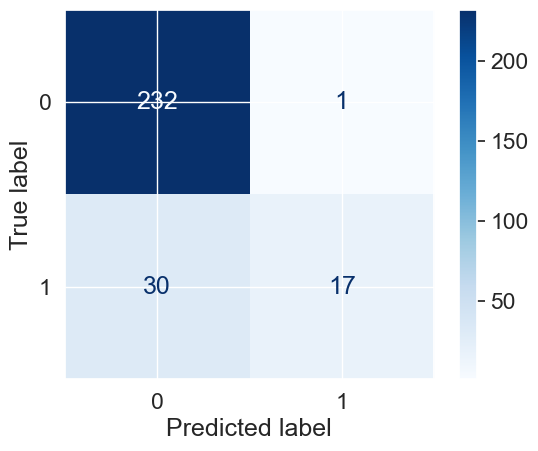

In [62]:
conf_matrix_gb = confusion_matrix(y_test_gb, y_pred_gb)

disp = ConfusionMatrixDisplay(conf_matrix_gb, display_labels=gb_clf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.show()

#### Dự đoán xác suất rời công ty dựa trên tập kiểm tra (chỉ lấy giá trị Positive)

In [63]:
default_prob_gb = gb_clf.predict_proba(X_test_gb)[:, 1]

print(default_prob_gb)

[0.1690119  0.02245629 0.10887413 0.11833591 0.07384338 0.3412235
 0.0573589  0.37513543 0.21480302 0.25427817 0.88149798 0.05072957
 0.79974598 0.0600744  0.1904486  0.97723378 0.80998381 0.17646749
 0.01864951 0.06226816 0.11540054 0.08326389 0.08551457 0.07664534
 0.43165644 0.31410154 0.25251831 0.02883791 0.03911995 0.10725631
 0.01574834 0.01721347 0.06898452 0.01614444 0.01714552 0.12414098
 0.59481722 0.03636259 0.01935897 0.04899652 0.0324607  0.08235308
 0.02222886 0.02448943 0.12766373 0.03265423 0.05018711 0.05324643
 0.01532095 0.02396984 0.22380468 0.1077898  0.02830153 0.02683912
 0.02059966 0.04077596 0.15127332 0.01760691 0.21724954 0.09218101
 0.73157896 0.08965746 0.06785303 0.01674176 0.05175546 0.13758119
 0.05539701 0.05837516 0.04620026 0.12402661 0.02270136 0.14830142
 0.1163048  0.32612956 0.1991875  0.0760009  0.09301717 0.23378754
 0.02250865 0.03954361 0.62230605 0.56318204 0.08602159 0.13557984
 0.02086069 0.09513683 0.03679476 0.4507287  0.07970754 0.02971

In [64]:
X_test_with_prob_gb = X_test_gb.copy()
X_test_with_prob_gb['Predicted Probability'] = default_prob_gb

high_prob_gb = X_test_with_prob_gb[X_test_with_prob_gb['Predicted Probability'] > 0.5]

In [65]:
print("Nhân viên có xác suất rời công ty lớn hơn 0.5:")
high_prob_gb

Nhân viên có xác suất rời công ty lớn hơn 0.5:


Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
322     0               2          2           2                 3          3   
289     0               1          2           1                 2          3   
30      0               2          2           2                 0          1   
832     1               1          3           1                 2          2   
134     0               2          1           0                 3          4   
219     0               1          3           1                 0          4   
1000    2               1          3           2                 3          2   
66      0               1          3           1                 2          1   
535     1               2          3           1                 0          3   
917     1               1          3           1                 1          3   
739     1               2          3           1                 0          2   
305     0               1          0           1                 0          4   
1327    3               1          3           2                 3          4   
628     1               1          2           2                 3          4   
682     1               2          0           1                 3          4   
426     1               2          3           2                 0          3   
316     0               1          1           0                 2          3   
508     1               1          1           2                 0          4   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
322                5                        3       0           1   
289                1                        4       1           3   
30                 5                        1       1           3   
832                3                        1       1           2   
134                1                        2       1           1   
219                3                        1       0           3   
1000               2                        2       1           2   
66                 3                        4       0           3   
535                1                        1       0           2   
917                3                        4       0           2   
739                3                        4       0           0   
305                5                        1       0           3   
1327               1                        1       0           2   
628                3                        1       1           0   
682                1                        4       1           3   
426                1                        4       1           1   
316                0                        1       0           1   
508                2                        3       0           3   

      JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
322                4         1        8                1              0   
289                2         1        6                1              0   
30                 2         1        8                2              0   
832                1         2        0                2              1   
134                3         1        1                3              2   
219                1         1        6                4              1   
1000               3         1        8                2              0   
66                 2         1        2                3              0   
535                3         1        6                1              0   
917                3         1        2                1              1   
739                3         1        2                2              0   
305                2         1        6                1              0   
1327               3         3        7                1              0   
628                2         2        7                2              0   
682                3         

#### Mức độ quan trọng của đặc trưng

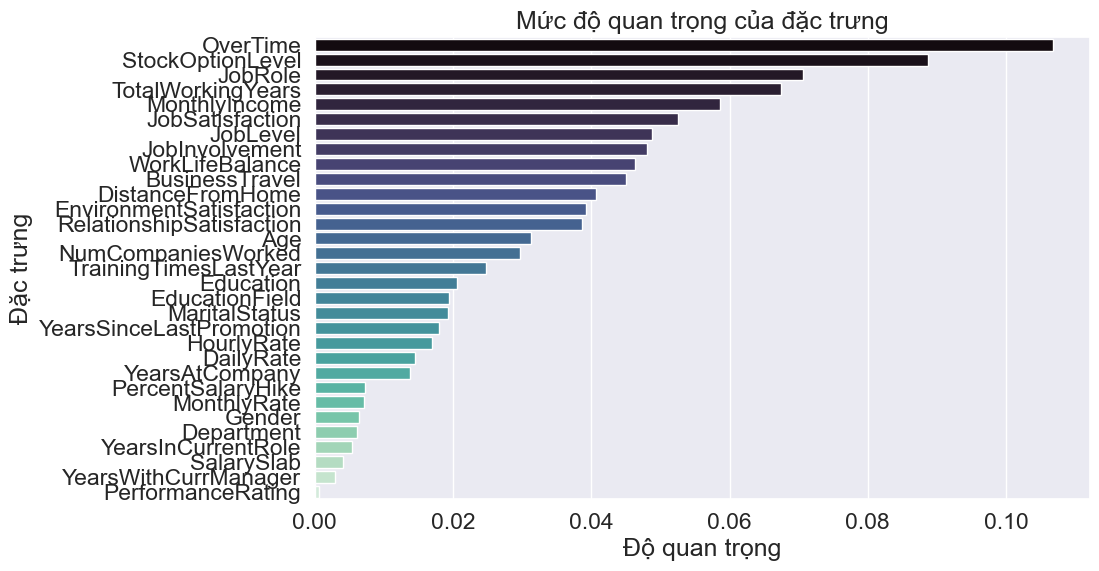

In [66]:
feature_importances_gb = gb_clf.feature_importances_
features = X.columns.tolist()

feature_importance_df = pd.DataFrame({'Đặc trưng': features, 'Độ quan trọng': feature_importances_gb})
feature_importance_df = feature_importance_df.sort_values(by='Độ quan trọng', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Độ quan trọng', y='Đặc trưng', data=feature_importance_df, palette='mako')
plt.title('Mức độ quan trọng của đặc trưng')
plt.show()

#### Vẽ ROC Curve

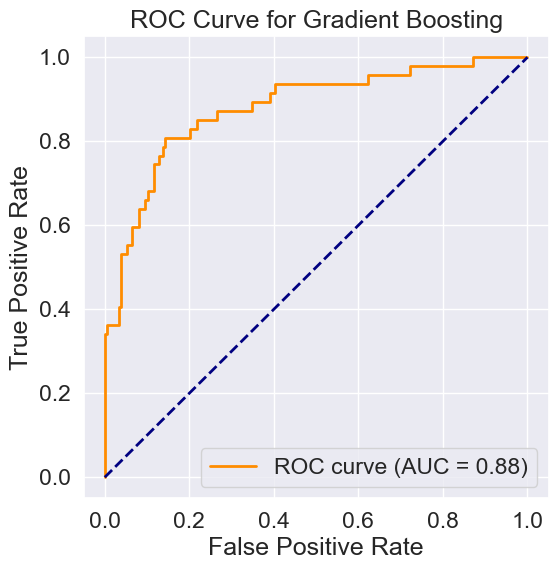

In [67]:
fpr, tpr, thresholds = roc_curve(y_test_gb, default_prob_gb)
roc_auc = roc_auc_score(y_test_gb, default_prob_gb)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc='lower right')

plt.show()

#### Đặt ngưỡng và đánh giá hiệu suất với ngưỡng

In [68]:
threshold = 0.5
predicted_labels_gb = (default_prob_gb >= threshold).astype(int)

print(f"Độ chính xác của Gradient Boosting: {accuracy_score(y_test_gb, predicted_labels_gb)*100}%")
print("Classification Report:\n", classification_report(y_test_gb, predicted_labels_gb))

Độ chính xác của Gradient Boosting: 88.92857142857142%
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       233
           1       0.94      0.36      0.52        47

    accuracy                           0.89       280
   macro avg       0.91      0.68      0.73       280
weighted avg       0.90      0.89      0.87       280



In [69]:
X_test_with_labels_gb = X_test_gb.copy()
X_test_with_labels_gb['Predicted Labels'] = predicted_labels_gb

potential_leavers_gb = X_test_with_labels_gb[X_test_with_labels_gb['Predicted Labels'] == 1]

In [70]:
print("Danh sách nhân viên có khả năng rời đi:")
potential_leavers_gb

Danh sách nhân viên có khả năng rời đi:


Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
322     0               2          2           2                 3          3   
289     0               1          2           1                 2          3   
30      0               2          2           2                 0          1   
832     1               1          3           1                 2          2   
134     0               2          1           0                 3          4   
219     0               1          3           1                 0          4   
1000    2               1          3           2                 3          2   
66      0               1          3           1                 2          1   
535     1               2          3           1                 0          3   
917     1               1          3           1                 1          3   
739     1               2          3           1                 0          2   
305     0               1          0           1                 0          4   
1327    3               1          3           2                 3          4   
628     1               1          2           2                 3          4   
682     1               2          0           1                 3          4   
426     1               2          3           2                 0          3   
316     0               1          1           0                 2          3   
508     1               1          1           2                 0          4   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
322                5                        3       0           1   
289                1                        4       1           3   
30                 5                        1       1           3   
832                3                        1       1           2   
134                1                        2       1           1   
219                3                        1       0           3   
1000               2                        2       1           2   
66                 3                        4       0           3   
535                1                        1       0           2   
917                3                        4       0           2   
739                3                        4       0           0   
305                5                        1       0           3   
1327               1                        1       0           2   
628                3                        1       1           0   
682                1                        4       1           3   
426                1                        4       1           1   
316                0                        1       0           1   
508                2                        3       0           3   

      JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
322                4         1        8                1              0   
289                2         1        6                1              0   
30                 2         1        8                2              0   
832                1         2        0                2              1   
134                3         1        1                3              2   
219                1         1        6                4              1   
1000               3         1        8                2              0   
66                 2         1        2                3              0   
535                3         1        6                1              0   
917                3         1        2                1              1   
739                3         1        2                2              0   
305                2         1        6                1              0   
1327               3         3        7                1              0   
628                2         2        7                2              0   
682                3         

#### Phân tích kết quả dự đoán xác suất rời đi

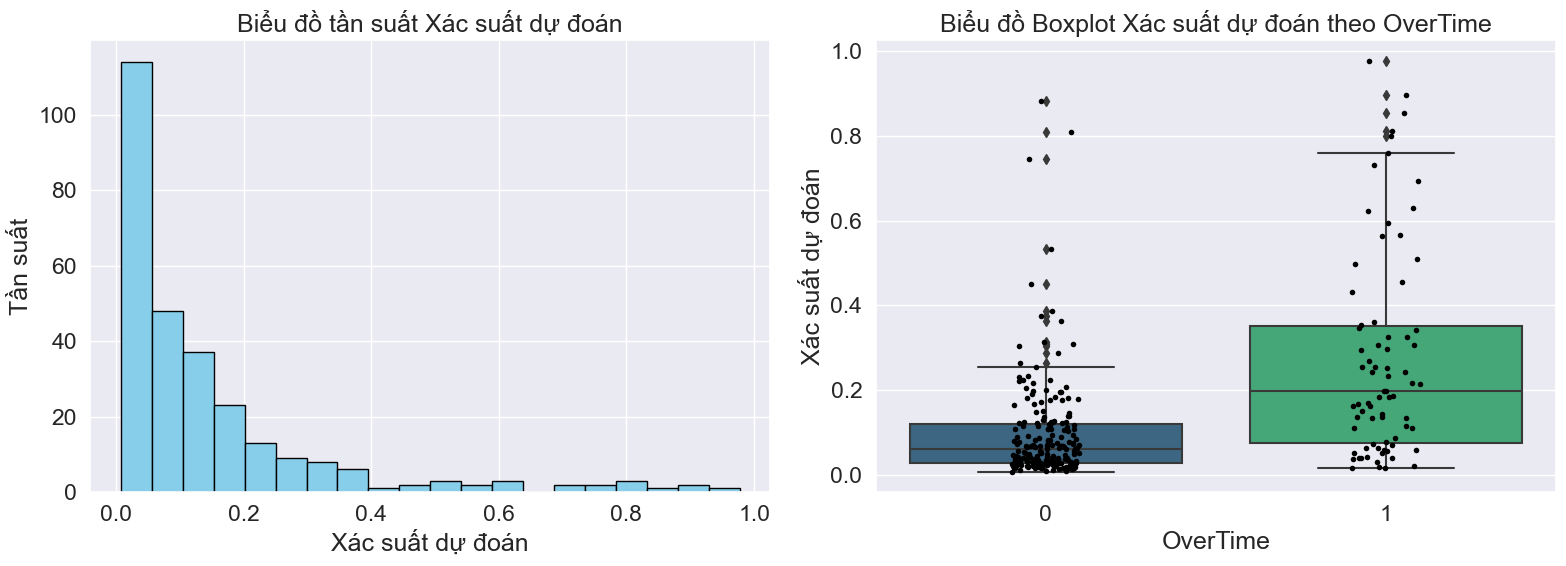

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

axes[0].hist(default_prob_gb, bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Biểu đồ tần suất Xác suất dự đoán')
axes[0].set_xlabel('Xác suất dự đoán')
axes[0].set_ylabel('Tần suất')

boxplot = sns.boxplot(x='OverTime', y=default_prob_gb, data=X_test_gb, palette='viridis', ax=axes[1])
stripplot = sns.stripplot(x='OverTime', y=default_prob_gb, data=X_test_gb, color='black', size=4, ax=axes[1])
boxplot.set_title('Biểu đồ Boxplot Xác suất dự đoán theo OverTime')
boxplot.set_xlabel('OverTime')
boxplot.set_ylabel('Xác suất dự đoán')

plt.tight_layout()
plt.show()

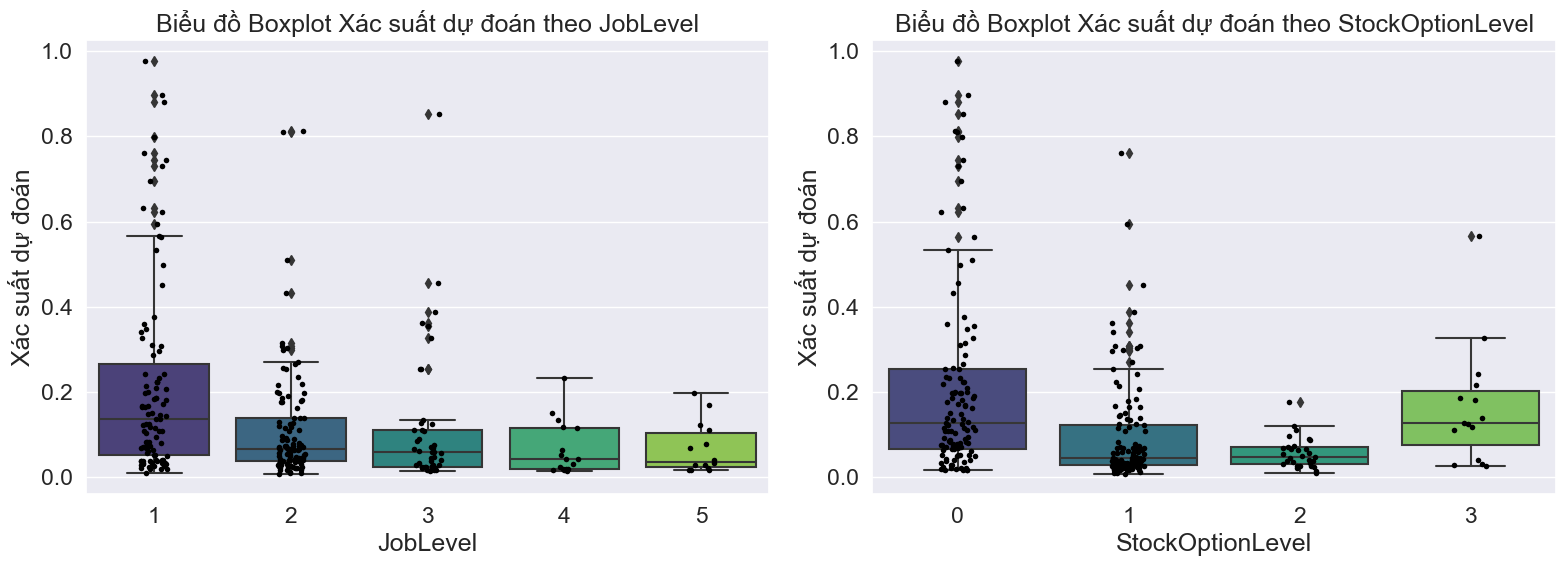

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

boxplot_env = sns.boxplot(x='JobLevel', y=default_prob_gb, data=X_test_gb, palette='viridis', ax=axes[0])
stripplot_env = sns.stripplot(x='JobLevel', y=default_prob_gb, data=X_test_gb, color='black', size=4, ax=axes[0])
boxplot_env.set_title('Biểu đồ Boxplot Xác suất dự đoán theo JobLevel')
boxplot_env.set_xlabel('JobLevel')
boxplot_env.set_ylabel('Xác suất dự đoán')

boxplot_job = sns.boxplot(x='StockOptionLevel', y=default_prob_gb, data=X_test_gb, palette='viridis', ax=axes[1])
stripplot_job = sns.stripplot(x='StockOptionLevel', y=default_prob_gb, data=X_test_gb, color='black', size=4, ax=axes[1])
boxplot_job.set_title('Biểu đồ Boxplot Xác suất dự đoán theo StockOptionLevel')
boxplot_job.set_xlabel('StockOptionLevel')
boxplot_job.set_ylabel('Xác suất dự đoán')

plt.tight_layout()
plt.show()

### 4.5. Kết quả chi tiết từ Random Forest

In [73]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None, shuffle=True)

In [74]:
rf_clf = RandomForestClassifier(criterion='gini', random_state=42)
rf_clf.fit(X_train_rf, y_train_rf)

y_pred_rf = rf_clf.predict(X_test_rf)
print("Giá trị nhãn mô hình dự đoán được:\n", y_pred_rf)

print(f"Độ chính xác của Random Forest trên tập kiểm thử: {accuracy_score(y_test_rf, y_pred_rf)*100}%")
print("Classification Report:\n", classification_report(y_test_rf, y_pred_rf))

Giá trị nhãn mô hình dự đoán được:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Độ chính xác của Random Forest trên tập kiểm thử: 86.07142857142858%
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       231
           1       1.00      0.20      0.34        49

    accuracy                           0.86       280
   macro avg       0.93      0.60      0.63       280
weighted avg       0.88      0

#### Ma trận nhầm lẫn

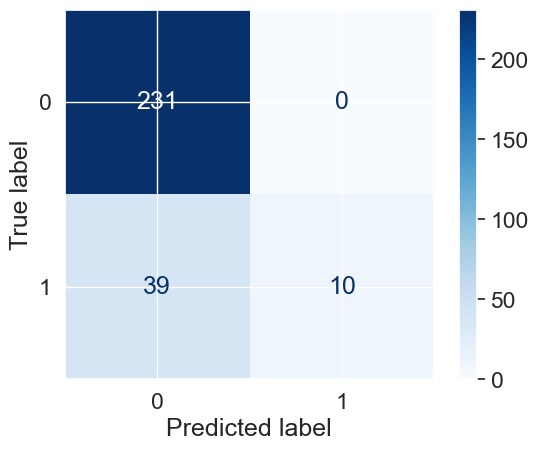

In [75]:
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)

disp = ConfusionMatrixDisplay(conf_matrix_rf, display_labels=rf_clf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.show()

#### Dự đoán xác suất rời công ty dựa trên tập kiểm tra (chỉ lấy giá trị Positive)

In [76]:
default_prob_rf = rf_clf.predict_proba(X_test_rf)[:, 1]

print(default_prob_rf)

[0.32 0.1  0.17 0.22 0.08 0.16 0.06 0.08 0.02 0.02 0.36 0.28 0.2  0.13
 0.12 0.02 0.04 0.5  0.37 0.19 0.22 0.07 0.04 0.25 0.13 0.22 0.12 0.17
 0.21 0.11 0.21 0.04 0.17 0.28 0.27 0.16 0.23 0.09 0.29 0.04 0.06 0.11
 0.13 0.21 0.43 0.11 0.11 0.1  0.08 0.04 0.13 0.17 0.43 0.36 0.04 0.03
 0.28 0.04 0.09 0.25 0.13 0.11 0.16 0.16 0.15 0.31 0.41 0.08 0.1  0.07
 0.1  0.19 0.08 0.05 0.29 0.13 0.21 0.34 0.06 0.02 0.53 0.2  0.35 0.09
 0.4  0.04 0.28 0.08 0.18 0.31 0.09 0.4  0.13 0.03 0.23 0.32 0.09 0.02
 0.14 0.12 0.05 0.1  0.12 0.27 0.19 0.27 0.04 0.15 0.08 0.14 0.25 0.36
 0.17 0.09 0.08 0.05 0.61 0.2  0.18 0.06 0.03 0.18 0.14 0.33 0.25 0.46
 0.11 0.07 0.11 0.26 0.68 0.04 0.16 0.11 0.19 0.01 0.07 0.06 0.07 0.33
 0.12 0.11 0.1  0.08 0.12 0.32 0.1  0.11 0.13 0.35 0.14 0.45 0.09 0.23
 0.3  0.04 0.11 0.69 0.2  0.14 0.24 0.3  0.04 0.16 0.07 0.16 0.16 0.27
 0.71 0.5  0.36 0.29 0.26 0.26 0.26 0.07 0.16 0.17 0.23 0.07 0.03 0.08
 0.22 0.08 0.05 0.08 0.09 0.31 0.19 0.21 0.08 0.07 0.03 0.17 0.04 0.06
 0.35 

In [77]:
X_test_with_prob_rf = X_test_rf.copy()
X_test_with_prob_rf['Predicted Probability'] = default_prob_rf

high_prob_rf = X_test_with_prob_rf[X_test_with_prob_rf['Predicted Probability'] > 0.5]

In [78]:
print("Nhân viên có xác suất rời công ty lớn hơn 0.5:")
high_prob_rf

Nhân viên có xác suất rời công ty lớn hơn 0.5:


Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
486    1               1          1           1                 3          4   
208    0               2          3           0                 3          3   
30     0               2          2           2                 0          1   
289    0               1          2           1                 2          3   
23     0               2          2           2                 2          3   
429    1               2          2           2                 0          4   
123    0               1          3           1                 3          3   
361    0               1          0           1                 3          3   
113    0               2          2           2                 3          1   
316    0               1          1           0                 2          3   

     EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
486               1                        1       0           3   
208               0                        1       1           1   
30                5                        1       1           3   
289               1                        4       1           3   
23                2                        4       1           1   
429               1                        2       1           1   
123               1                        1       0           1   
361               1                        1       1           1   
113               1                        3       0           2   
316               0                        1       0           1   

     JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
486               3         1        2                4              0   
208               2         1        1                2              1   
30                2         1        8                2              0   
289               2         1        6                1              0   
23                3         1        8                4              0   
429               1         1        8                3              0   
123               1         1        2                3              0   
361               3         1        6                3              1   
113               1         1        8                4              0   
316               2         1        1                1              2   

     MonthlyIncome  SalarySlab  MonthlyRate  NumCompaniesWorked  OverTime  \
486              0           0            2                   0         1   
208              0           0            2                   0         0   
30               0           0            1                   0         1   
289              0           0            1                   2         1   
23               0           0            2                   0         1   
429              0           0            2                   0         0   
123              0           0            1                   0         0   
361              0           0            1                   1         1   
113              0           0            1                   0         1   
316              0           0            0                   1         1   

     PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
486                  2                  4                         3   
208                  0                  3                         1   
30                   0                  3                         3   
289                  1                  4                         3   
23                   0                  3                         2   
429                  0                  3                         2   
123                  0                  3                         3   
361                  0                  3                         2   
113                  0                  3                         4   
31

#### Mức độ quan trọng của đặc trưng

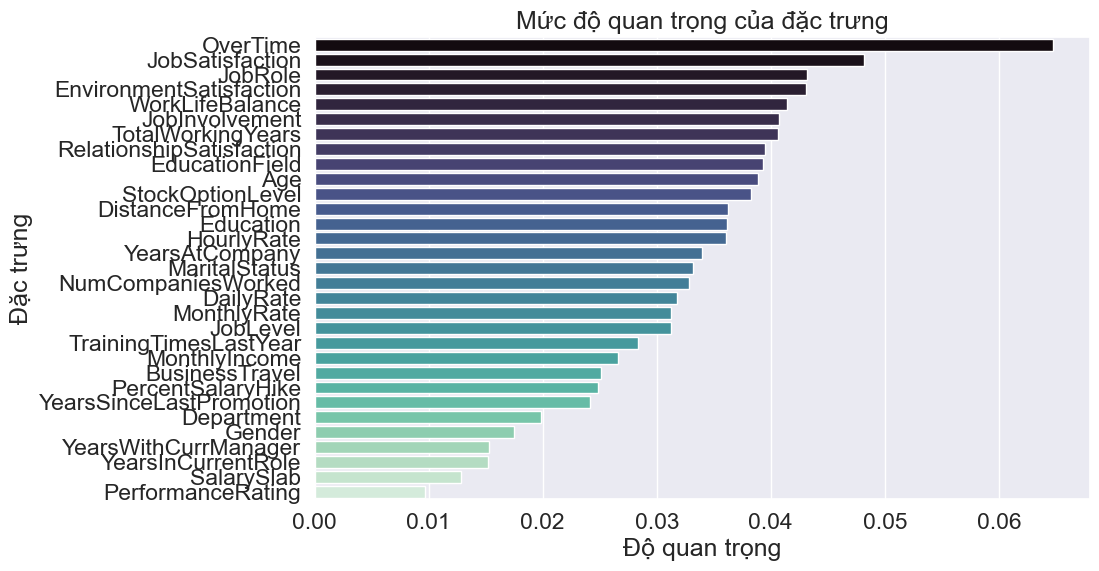

In [79]:
feature_importances_rf = rf_clf.feature_importances_
features = X.columns.tolist()

feature_importance_df = pd.DataFrame({'Đặc trưng': features, 'Độ quan trọng': feature_importances_rf})
feature_importance_df = feature_importance_df.sort_values(by='Độ quan trọng', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Độ quan trọng', y='Đặc trưng', data=feature_importance_df, palette='mako')
plt.title('Mức độ quan trọng của đặc trưng')
plt.show()

#### Vẽ ROC Curve

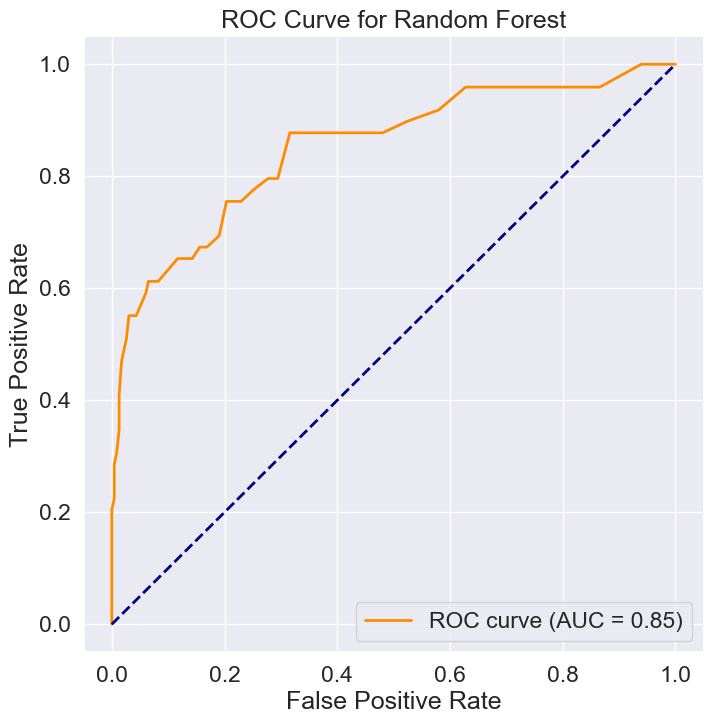

In [80]:
fpr, tpr, thresholds = roc_curve(y_test_rf, default_prob_rf)
roc_auc = roc_auc_score(y_test_rf, default_prob_rf)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')

plt.show()

#### Đặt ngưỡng và đánh giá hiệu suất với ngưỡng

In [81]:
threshold = 0.5
predicted_labels_rf = (default_prob_rf >= threshold).astype(int)

print(f"Độ chính xác của Random Forest: {accuracy_score(y_test_rf, predicted_labels_rf)*100}%")
print("Classification Report:\n", classification_report(y_test_rf, predicted_labels_rf))

Độ chính xác của Random Forest: 86.07142857142858%
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       231
           1       0.92      0.22      0.36        49

    accuracy                           0.86       280
   macro avg       0.89      0.61      0.64       280
weighted avg       0.87      0.86      0.82       280



In [82]:
X_test_with_labels_rf = X_test_rf.copy()
X_test_with_labels_rf['Predicted Labels'] = predicted_labels_rf

potential_leavers_rf = X_test_with_labels_rf[X_test_with_labels_rf['Predicted Labels'] == 1]

In [83]:
print("Danh sách nhân viên có khả năng rời đi:")
potential_leavers_rf

Danh sách nhân viên có khả năng rời đi:


Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
76     0               1          3           2                 0          1   
486    1               1          1           1                 3          4   
208    0               2          3           0                 3          3   
30     0               2          2           2                 0          1   
289    0               1          2           1                 2          3   
23     0               2          2           2                 2          3   
107    0               1          0           1                 0          1   
429    1               2          2           2                 0          4   
123    0               1          3           1                 3          3   
361    0               1          0           1                 3          3   
113    0               2          2           2                 3          1   
316    0               1          1           0                 2          3   

     EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
76                5                        1       1           2   
486               1                        1       0           3   
208               0                        1       1           1   
30                5                        1       1           3   
289               1                        4       1           3   
23                2                        4       1           1   
107               3                        1       0           2   
429               1                        2       1           1   
123               1                        1       0           1   
361               1                        1       1           1   
113               1                        3       0           2   
316               0                        1       0           1   

     JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
76                3         1        8                2              0   
486               3         1        2                4              0   
208               2         1        1                2              1   
30                2         1        8                2              0   
289               2         1        6                1              0   
23                3         1        8                4              0   
107               4         1        6                1              0   
429               1         1        8                3              0   
123               1         1        2                3              0   
361               3         1        6                3              1   
113               1         1        8                4              0   
316               2         1        1                1              2   

     MonthlyIncome  SalarySlab  MonthlyRate  NumCompaniesWorked  OverTime  \
76               1           0            3                   0         1   
486              0           0            2                   0         1   
208              0           0            2                   0         0   
30               0           0            1                   0         1   
289              0           0            1                   2         1   
23               0           0            2                   0         1   
107              1           0            3                   2         0   
429              0           0            2                   0         0   
123              0           0            1                   0         0   
361              0           0            1                   1         1   
113              0           0            1                   0         1   
316              0           0            0                   1         1   

     PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
76                   1                  3  

#### Phân tích kết quả dự đoán xác suất rời đi

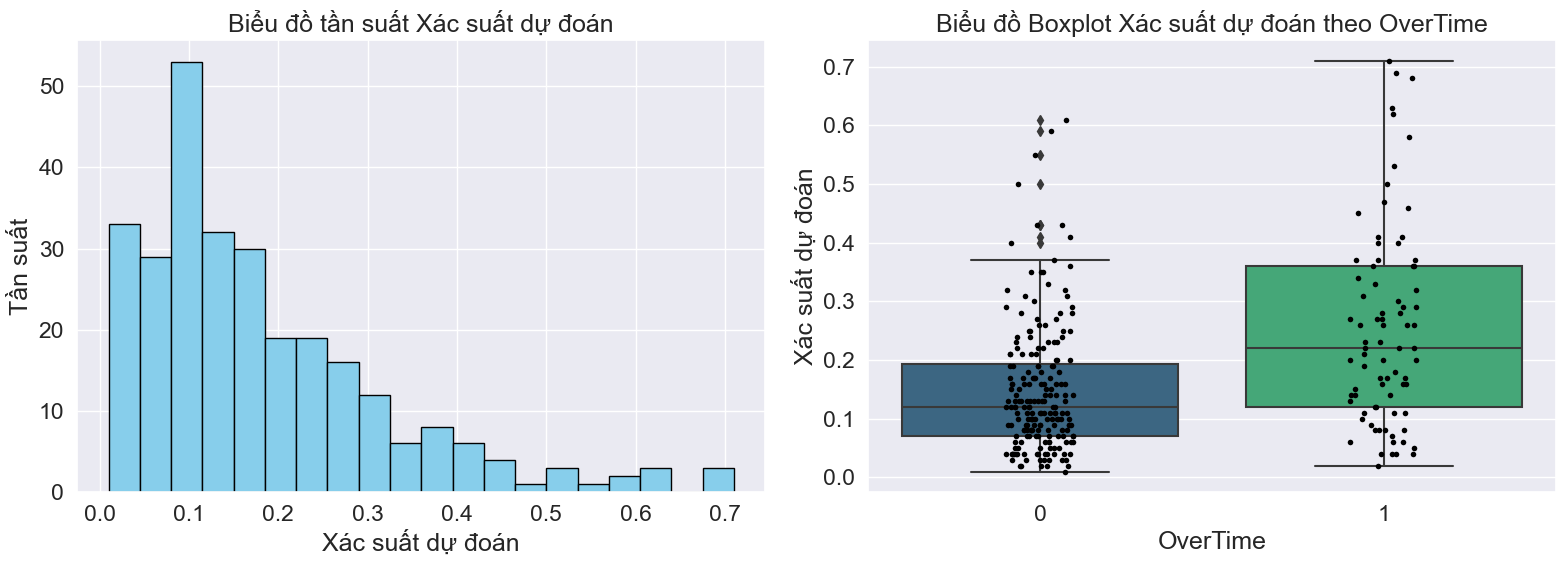

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

axes[0].hist(default_prob_rf, bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Biểu đồ tần suất Xác suất dự đoán')
axes[0].set_xlabel('Xác suất dự đoán')
axes[0].set_ylabel('Tần suất')

boxplot = sns.boxplot(x='OverTime', y=default_prob_rf, data=X_test_rf, palette='viridis', ax=axes[1])
stripplot = sns.stripplot(x='OverTime', y=default_prob_rf, data=X_test_rf, color='black', size=4, ax=axes[1])
boxplot.set_title('Biểu đồ Boxplot Xác suất dự đoán theo OverTime')
boxplot.set_xlabel('OverTime')

boxplot.set_ylabel('Xác suất dự đoán')

plt.tight_layout()
plt.show()

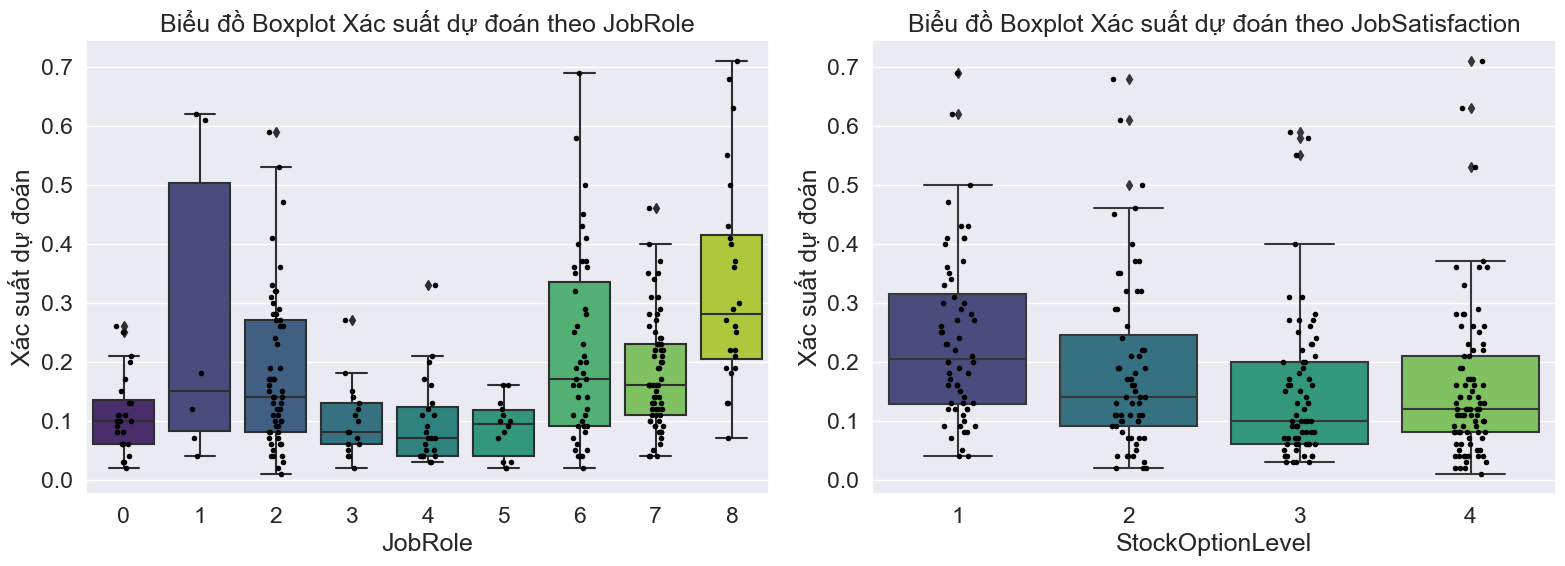

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

boxplot_env = sns.boxplot(x='JobRole', y=default_prob_rf, data=X_test_rf, palette='viridis', ax=axes[0])
stripplot_env = sns.stripplot(x='JobRole', y=default_prob_rf, data=X_test_rf, color='black', size=4, ax=axes[0])
boxplot_env.set_title('Biểu đồ Boxplot Xác suất dự đoán theo JobRole')
boxplot_env.set_xlabel('JobRole')
boxplot_env.set_ylabel('Xác suất dự đoán')

boxplot_job = sns.boxplot(x='JobSatisfaction', y=default_prob_rf, data=X_test_rf, palette='viridis', ax=axes[1])
stripplot_job = sns.stripplot(x='JobSatisfaction', y=default_prob_rf, data=X_test_rf, color='black', size=4, ax=axes[1])
boxplot_job.set_title('Biểu đồ Boxplot Xác suất dự đoán theo JobSatisfaction')
boxplot_job.set_xlabel('StockOptionLevel')
boxplot_job.set_ylabel('Xác suất dự đoán')

plt.tight_layout()
plt.show()

### 4.6. Kết quả chi tiết từ Neural Network

In [86]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None, shuffle=True)

In [87]:
scaler = StandardScaler()
X_train_nn_scaled = scaler.fit_transform(X_train_nn)
X_test_nn_scaled = scaler.transform(X_test_nn)

In [88]:
nn_clf = MLPClassifier(random_state=42, max_iter=1000)
nn_clf.fit(X_train_nn_scaled, y_train_nn)

y_pred_nn = nn_clf.predict(X_test_nn_scaled)
print("Giá trị nhãn mô hình dự đoán được:\n", y_pred_nn)

print(f"Độ chính xác của Neural Network trên tập kiểm thử: {accuracy_score(y_test_nn, y_pred_nn)*100}%")
print("Classification Report:\n", classification_report(y_test_nn, y_pred_nn))

Giá trị nhãn mô hình dự đoán được:
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0]
Độ chính xác của Neural Network trên tập kiểm thử: 86.07142857142858%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       231
           1       0.62      0.51      0.56        49

    accuracy                           0.86       280
   macro avg       0.76      0.72      0.74       280
weighted avg       0.85      

#### Ma trận nhầm lẫn

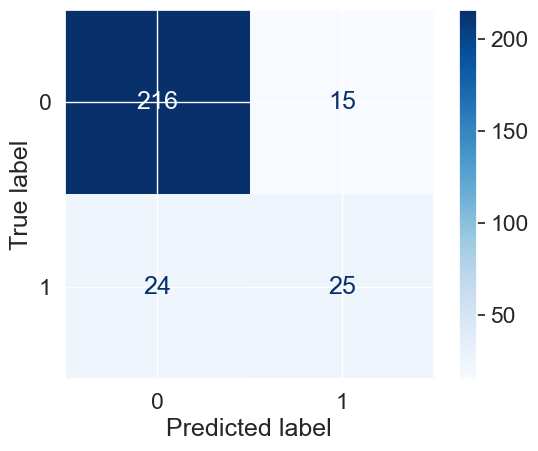

In [89]:
conf_matrix_nn = confusion_matrix(y_test_nn, y_pred_nn)

disp = ConfusionMatrixDisplay(conf_matrix_nn, display_labels=nn_clf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.show()

#### Dự đoán xác suất rời công ty dựa trên tập kiểm tra (chỉ lấy giá trị Positive)

In [90]:
default_prob_nn = nn_clf.predict_proba(X_test_nn_scaled)[:, 1]

print(default_prob_nn)

[9.35203065e-01 4.01318331e-02 3.83417507e-03 5.90739174e-05
 1.63933085e-03 9.14258779e-04 6.20704766e-03 4.21420853e-04
 2.96019305e-06 2.17236926e-06 3.14096449e-03 8.15518628e-03
 6.98369981e-05 2.71630858e-03 1.05582903e-05 1.94784117e-05
 3.13625779e-04 8.67650710e-01 9.96363319e-01 8.39077808e-02
 9.83471594e-01 9.53345519e-06 3.83425183e-05 8.02645339e-02
 3.04082317e-06 1.79773329e-02 2.23618878e-05 9.70198458e-01
 1.17734289e-04 7.89237544e-06 2.75740978e-03 1.03120322e-05
 6.20008189e-05 8.27821226e-01 1.82619871e-01 4.89990475e-02
 2.52901622e-02 8.90071460e-05 5.44981011e-01 1.01871259e-04
 3.31191643e-05 5.74980106e-04 5.97082523e-04 1.51286993e-02
 9.92255269e-01 2.45829167e-01 1.75331662e-02 1.08917707e-02
 4.95381664e-06 2.16332394e-05 1.02255206e-04 2.59362653e-04
 1.11964306e-02 1.82346612e-03 1.94575847e-01 1.12034056e-03
 9.65300084e-01 3.47504446e-03 3.23594095e-03 7.44741760e-02
 1.51666799e-03 7.27049223e-02 2.49505293e-02 2.18999709e-05
 5.76750847e-04 7.072554

In [91]:
X_test_with_prob_nn = X_test_nn.copy()

default_prob_nn_series = pd.Series(default_prob_nn, name='Predicted Probability', index=pd.DataFrame(X_test_nn).index)
X_test_with_prob_nn = pd.concat([pd.DataFrame(X_test_nn), default_prob_nn_series], axis=1)

high_prob_nn = X_test_with_prob_nn[X_test_with_prob_nn['Predicted Probability'] > 0.5]

In [92]:
print("Nhân viên có xác suất rời công ty lớn hơn 0.5:")
high_prob_nn

Nhân viên có xác suất rời công ty lớn hơn 0.5:


Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
363     0               2          0           1                 1          3   
76      0               1          3           2                 0          1   
535     1               2          3           1                 0          3   
628     1               1          2           2                 3          4   
51      0               1          0           1                 2          1   
198     0               1          3           1                 2          1   
353     0               1          1           2                 1          1   
240     0               1          2           1                 0          3   
701     1               2          2           2                 3          4   
724     1               1          3           1                 2          4   
486     1               1          1           1                 3          4   
342     0               2          1           2                 3          4   
1096    2               2          2           1                 3          3   
435     1               2          2           1                 0          3   
208     0               2          3           0                 3          3   
1307    3               1          3           2                 1          3   
30      0               2          2           2                 0          1   
543     1               0          2           2                 3          3   
163     0               1          2           1                 0          1   
549     1               1          3           1                 3          3   
289     0               1          2           1                 2          3   
1145    2               1          2           2                 0          2   
23      0               2          2           2                 2          3   
81      0               1          2           2                 0          2   
1193    2               0          2           2                 3          2   
429     1               2          2           2                 0          4   
239     0               2          0           1                 0          3   
839     1               0          3           1                 1          2   
985     1               1          3           1                 1          3   
1024    2               1          2           1                 2          4   
123     0               1          3           1                 3          3   
1327    3               1          3           2                 3          4   
682     1               2          0           1                 3          4   
310     0               1          1           2                 2          3   
128     0               2          1           1                 2          2   
113     0               2          2           2                 3          1   
271     0               1          1           1                 2          4   
718     1               1          1           2                 3          3   
316     0               1          1           0                 2          3   
1393    3               2          3           2                 3          3   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
363                3                        2       1           1   
76                 5                        1       1           2   
535                1                        1       0           2   
628                3                        1       1           0   
51                 1                        2       0           3   
198                1                        2       0           3   
353                2                        4       0           1   
240                5                        4       0           3   
701                2                        4       1          

#### Vẽ ROC Curve

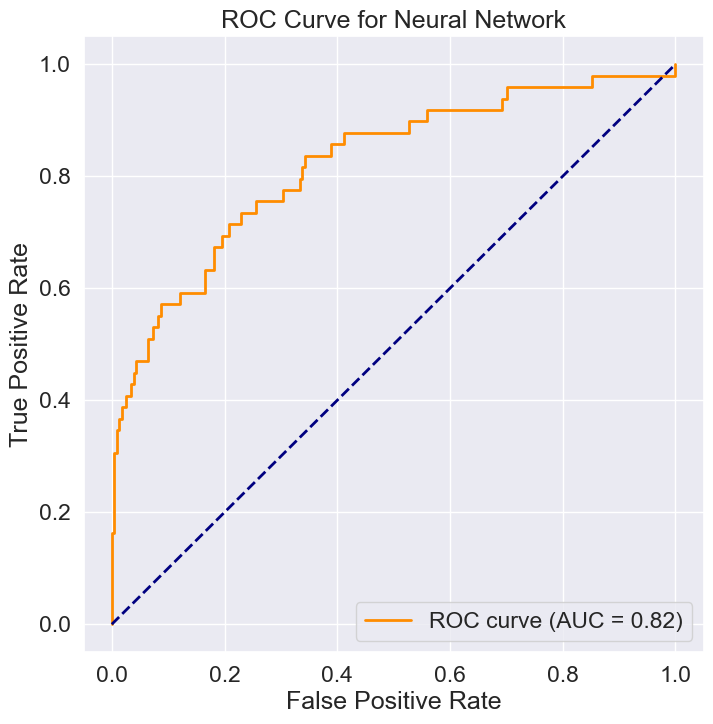

In [93]:
fpr, tpr, thresholds = roc_curve(y_test_nn, default_prob_nn)
roc_auc = roc_auc_score(y_test_nn, default_prob_nn)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.legend(loc='lower right')

plt.show()

#### Đặt ngưỡng và đánh giá hiệu suất với ngưỡng

In [94]:
threshold = 0.5
predicted_labels_nn = (default_prob_nn >= threshold).astype(int)

print(f"Độ chính xác của Neural Network: {accuracy_score(y_test_nn, predicted_labels_nn)*100}%")
print("Classification Report:\n", classification_report(y_test_nn, predicted_labels_nn))

Độ chính xác của Neural Network: 86.07142857142858%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       231
           1       0.62      0.51      0.56        49

    accuracy                           0.86       280
   macro avg       0.76      0.72      0.74       280
weighted avg       0.85      0.86      0.86       280



In [95]:
X_test_with_labels_nn = X_test_nn.copy()

predicted_labels_nn_series = pd.Series(predicted_labels_nn, name='Predicted Labels', index=pd.DataFrame(X_test_nn).index)
X_test_with_labels_nn = pd.concat([pd.DataFrame(X_test_nn), predicted_labels_nn_series], axis=1)

potential_leavers_nn = X_test_with_labels_nn[X_test_with_labels_nn['Predicted Labels'] == 1]

In [96]:
print("Danh sách nhân viên có khả năng rời đi:")
potential_leavers_nn

Danh sách nhân viên có khả năng rời đi:


Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
363     0               2          0           1                 1          3   
76      0               1          3           2                 0          1   
535     1               2          3           1                 0          3   
628     1               1          2           2                 3          4   
51      0               1          0           1                 2          1   
198     0               1          3           1                 2          1   
353     0               1          1           2                 1          1   
240     0               1          2           1                 0          3   
701     1               2          2           2                 3          4   
724     1               1          3           1                 2          4   
486     1               1          1           1                 3          4   
342     0               2          1           2                 3          4   
1096    2               2          2           1                 3          3   
435     1               2          2           1                 0          3   
208     0               2          3           0                 3          3   
1307    3               1          3           2                 1          3   
30      0               2          2           2                 0          1   
543     1               0          2           2                 3          3   
163     0               1          2           1                 0          1   
549     1               1          3           1                 3          3   
289     0               1          2           1                 2          3   
1145    2               1          2           2                 0          2   
23      0               2          2           2                 2          3   
81      0               1          2           2                 0          2   
1193    2               0          2           2                 3          2   
429     1               2          2           2                 0          4   
239     0               2          0           1                 0          3   
839     1               0          3           1                 1          2   
985     1               1          3           1                 1          3   
1024    2               1          2           1                 2          4   
123     0               1          3           1                 3          3   
1327    3               1          3           2                 3          4   
682     1               2          0           1                 3          4   
310     0               1          1           2                 2          3   
128     0               2          1           1                 2          2   
113     0               2          2           2                 3          1   
271     0               1          1           1                 2          4   
718     1               1          1           2                 3          3   
316     0               1          1           0                 2          3   
1393    3               2          3           2                 3          3   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
363                3                        2       1           1   
76                 5                        1       1           2   
535                1                        1       0           2   
628                3                        1       1           0   
51                 1                        2       0           3   
198                1                        2       0           3   
353                2                        4       0           1   
240                5                        4       0           3   
701                2                        4       1          

#### Phân tích kết quả dự đoán xác suất rời đi

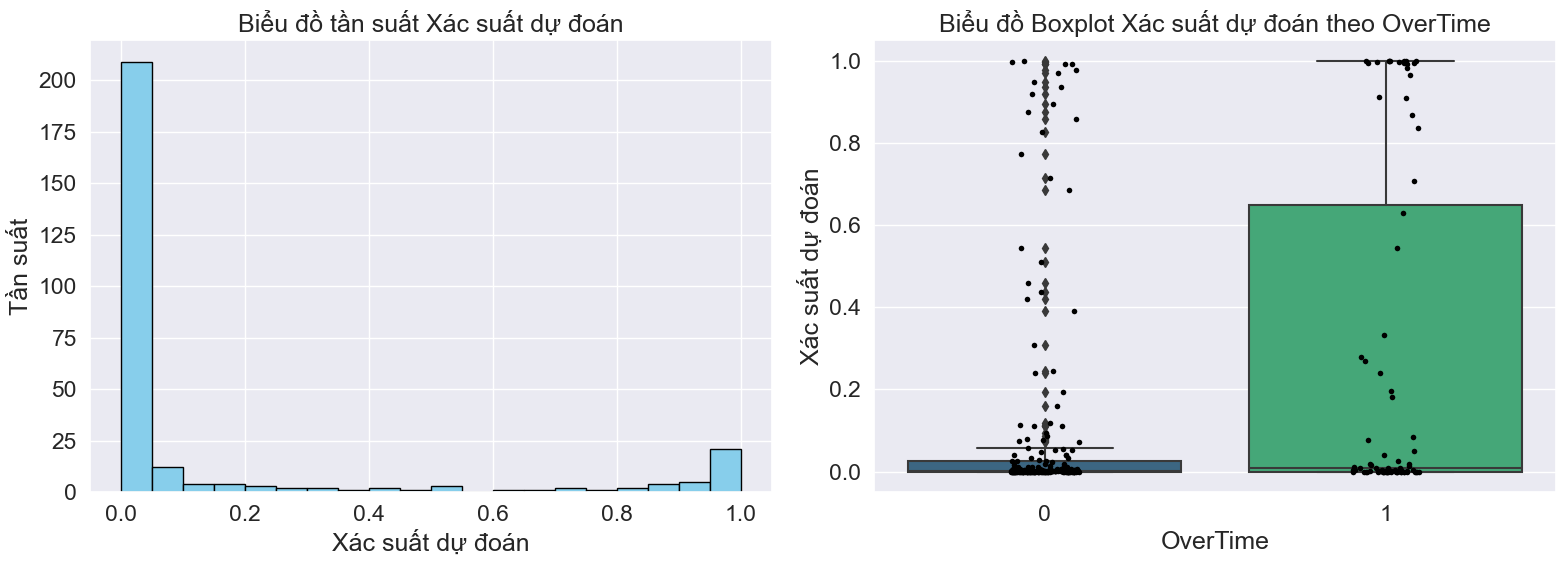

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

axes[0].hist(default_prob_nn, bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Biểu đồ tần suất Xác suất dự đoán')
axes[0].set_xlabel('Xác suất dự đoán')
axes[0].set_ylabel('Tần suất')

boxplot = sns.boxplot(x='OverTime', y=default_prob_nn, data=X_test_nn, palette='viridis', ax=axes[1])
stripplot = sns.stripplot(x='OverTime', y=default_prob_nn, data=X_test_nn, color='black', size=4, ax=axes[1])
boxplot.set_title('Biểu đồ Boxplot Xác suất dự đoán theo OverTime')
boxplot.set_xlabel('OverTime')
boxplot.set_ylabel('Xác suất dự đoán')

plt.tight_layout()
plt.show()

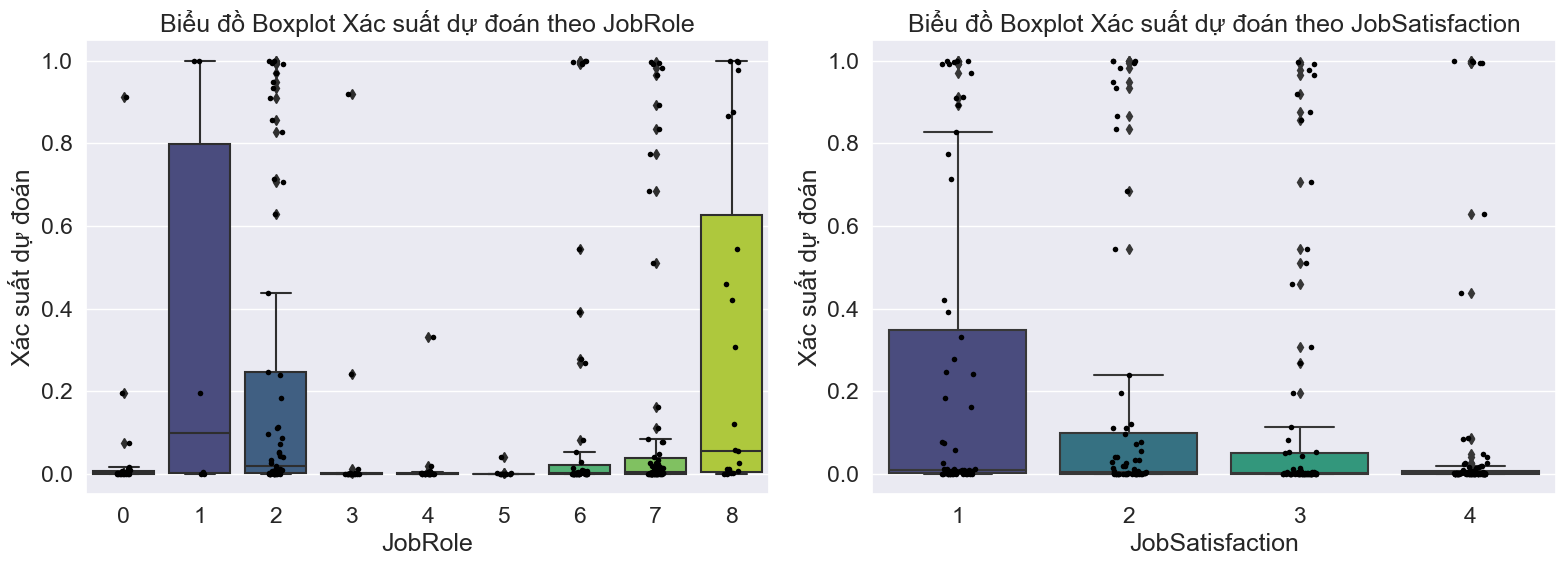

In [98]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

boxplot_job = sns.boxplot(x='JobSatisfaction', y=default_prob_nn, data=X_test_nn, palette='viridis', ax=axes[1])
stripplot_job = sns.stripplot(x='JobSatisfaction', y=default_prob_nn, data=X_test_nn, color='black', size=4, ax=axes[1])
boxplot_job.set_title('Biểu đồ Boxplot Xác suất dự đoán theo JobSatisfaction')
boxplot_job.set_xlabel('JobSatisfaction')
boxplot_job.set_ylabel('Xác suất dự đoán')

boxplot_env = sns.boxplot(x='JobRole', y=default_prob_nn, data=X_test_nn, palette='viridis', ax=axes[0])
stripplot_env = sns.stripplot(x='JobRole', y=default_prob_nn, data=X_test_nn, color='black', size=4, ax=axes[0])
boxplot_env.set_title('Biểu đồ Boxplot Xác suất dự đoán theo JobRole')
boxplot_env.set_xlabel('JobRole')
boxplot_env.set_ylabel('Xác suất dự đoán')

plt.tight_layout()
plt.show()

### 4.7. Điều chỉnh biến độc lập

In [99]:
columns_to_drop = ['Gender', 'PercentSalaryHike', 'PerformanceRating', 'Department', 'SalarySlab', 'YearsInCurrentRole', 'YearsWithCurrManager']
df.drop(columns=columns_to_drop, inplace=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmpID                     1397 non-null   object
 1   Age                       1397 non-null   int32 
 2   Attrition                 1397 non-null   int32 
 3   BusinessTravel            1397 non-null   int64 
 4   DailyRate                 1397 non-null   int32 
 5   DistanceFromHome          1397 non-null   int32 
 6   Education                 1397 non-null   int64 
 7   EducationField            1397 non-null   int32 
 8   EnvironmentSatisfaction   1397 non-null   int64 
 9   HourlyRate                1397 non-null   int32 
 10  JobInvolvement            1397 non-null   int64 
 11  JobLevel                  1397 non-null   int64 
 12  JobRole                   1397 non-null   int32 
 13  JobSatisfaction           1397 non-null   int64 
 14  MaritalStatus           

In [101]:
X = df.drop(['EmpID', 'Attrition'], axis=1)
X.head(5)

Age  BusinessTravel  DailyRate  DistanceFromHome  Education  \
0    0               1          0                 0          3   
1    0               1          2                 2          3   
2    0               2          3                 1          3   
3    0               0          1                 1          2   
4    0               0          0                 2          1   

   EducationField  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0               1                        3           1               3   
1               3                        4           2               2   
2               2                        2           2               3   
3               1                        2           2               3   
4               3                        3           2               3   

   JobLevel  JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  \
0         1        2                3              0              0   
1         1        8                3              0              0   
2         1        8                2              0              0   
3         1        6                4              0              0   
4         1        2                3              0              0   

   MonthlyRate  NumCompaniesWorked  OverTime  RelationshipSatisfaction  \
0            3                   0         0                         3   
1            1                   0         0                         1   
2            1                   0         1                         4   
3            1                   0         0                         4   
4            1                   0         0                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  0                      1   
1                 0                  0                      1   
2                 0                  0                      1   
3                 0                  0                      1   
4                 0                  0                      0   

   WorkLifeBalance  YearsAtCompany  YearsSinceLastPromotion  
0                3               0                        0  
1                3               0                        0  
2                3               0                        0  
3                3               0                        0  
4                3               0                        0

In [102]:
y = df['Attrition']
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Attrition, dtype: int32

In [103]:
results = []

for test_size in test_sizes:
    for stratify_value, shuffle_value in zip(stratify_values, shuffle_values):
        if stratify_value:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, shuffle=shuffle_value, random_state=42)
        else:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=None, shuffle=shuffle_value, random_state=42)

        models = [
            RandomForestClassifier(criterion='gini', random_state=42),
            GradientBoostingClassifier(random_state=42),
            MLPClassifier(random_state=42, max_iter=1250)
        ]

        model_names = ['Random Forest', 'Gradient Boosting', 'Neural Network']

        accuracy = []
        roc_auc = []
        precision = []
        recall = []
        f1 = []

        for model in models:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            accuracy.append(accuracy_score(y_test, y_pred))
            roc_auc.append(roc_auc_score(y_test, y_pred))
            precision.append(precision_score(y_test, y_pred))
            recall.append(recall_score(y_test, y_pred))
            f1.append(f1_score(y_test, y_pred))

        result_df = pd.DataFrame({
            'Model': model_names,
            'Accuracy': accuracy,
            'ROC AUC': roc_auc,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

        result_df['Test Size'] = test_size
        result_df['Stratify'] = stratify_value
        result_df['Shuffle'] = shuffle_value

        results.append(result_df)

In [104]:
model_comparison = pd.concat(results, ignore_index=True)

In [105]:
model_comparison.sort_values(by='Accuracy', ascending=False, inplace=True)
model_comparison

Model  Accuracy   ROC AUC  Precision    Recall  F1 Score  \
16  Gradient Boosting  0.900000  0.730365   0.920000  0.469388  0.621622   
7   Gradient Boosting  0.885714  0.683190   0.900000  0.375000  0.529412   
4   Gradient Boosting  0.883333  0.622432   0.518519  0.280000  0.363636   
10  Gradient Boosting  0.882143  0.657429   0.937500  0.319149  0.476190   
3       Random Forest  0.880952  0.525946   0.500000  0.060000  0.107143   
13  Gradient Boosting  0.871429  0.559199   0.500000  0.138889  0.217391   
12      Random Forest  0.867857  0.509791   0.333333  0.027778  0.051282   
15      Random Forest  0.867857  0.622449   1.000000  0.244898  0.393443   
11     Neural Network  0.867857  0.716784   0.638889  0.489362  0.554217   
1   Gradient Boosting  0.852381  0.602857   0.666667  0.228571  0.340426   
9       Random Forest  0.850000  0.561684   0.857143  0.127660  0.222222   
6       Random Forest  0.850000  0.568008   0.909091  0.138889  0.240964   
17     Neural Network  0.846429  0.697897   0.575000  0.469388  0.516854   
0       Random Forest  0.842857  0.545714   0.700000  0.100000  0.175000   
14     Neural Network  0.835714  0.597905   0.333333  0.277778  0.303030   
8      Neural Network  0.830952  0.672174   0.508197  0.430556  0.466165   
2      Neural Network  0.830952  0.652857   0.490909  0.385714  0.432000   
5      Neural Network  0.826190  0.615946   0.298246  0.340000  0.317757   

    Test Size  Stratify  Shuffle  
16        0.2     False     True  
7         0.3     False     True  
4         0.3     False    False  
10        0.2      True     True  
3         0.3     False    False  
13        0.2     False    False  
12        0.2     False    False  
15        0.2     False     True  
11        0.2      True     True  
1         0.3      True     True  
9         0.2      True     True  
6         0.3     False     True  
17        0.2     False     True  
0         0.3      True     True  
14        0.2     False    False  
8         0.3     False     True  
2         0.3      True     True  
5         0.3     False    False

In [106]:
model_comparison.sort_values(by='ROC AUC', ascending=False, inplace=True)
model_comparison

Model  Accuracy   ROC AUC  Precision    Recall  F1 Score  \
16  Gradient Boosting  0.900000  0.730365   0.920000  0.469388  0.621622   
11     Neural Network  0.867857  0.716784   0.638889  0.489362  0.554217   
17     Neural Network  0.846429  0.697897   0.575000  0.469388  0.516854   
7   Gradient Boosting  0.885714  0.683190   0.900000  0.375000  0.529412   
8      Neural Network  0.830952  0.672174   0.508197  0.430556  0.466165   
10  Gradient Boosting  0.882143  0.657429   0.937500  0.319149  0.476190   
2      Neural Network  0.830952  0.652857   0.490909  0.385714  0.432000   
15      Random Forest  0.867857  0.622449   1.000000  0.244898  0.393443   
4   Gradient Boosting  0.883333  0.622432   0.518519  0.280000  0.363636   
5      Neural Network  0.826190  0.615946   0.298246  0.340000  0.317757   
1   Gradient Boosting  0.852381  0.602857   0.666667  0.228571  0.340426   
14     Neural Network  0.835714  0.597905   0.333333  0.277778  0.303030   
6       Random Forest  0.850000  0.568008   0.909091  0.138889  0.240964   
9       Random Forest  0.850000  0.561684   0.857143  0.127660  0.222222   
13  Gradient Boosting  0.871429  0.559199   0.500000  0.138889  0.217391   
0       Random Forest  0.842857  0.545714   0.700000  0.100000  0.175000   
3       Random Forest  0.880952  0.525946   0.500000  0.060000  0.107143   
12      Random Forest  0.867857  0.509791   0.333333  0.027778  0.051282   

    Test Size  Stratify  Shuffle  
16        0.2     False     True  
11        0.2      True     True  
17        0.2     False     True  
7         0.3     False     True  
8         0.3     False     True  
10        0.2      True     True  
2         0.3      True     True  
15        0.2     False     True  
4         0.3     False    False  
5         0.3     False    False  
1         0.3      True     True  
14        0.2     False    False  
6         0.3     False     True  
9         0.2      True     True  
13        0.2     False    False  
0         0.3      True     True  
3         0.3     False    False  
12        0.2     False    False

#### Đánh giá huấn luyện lại
- Gradient Boosting có xu hướng đạt hiệu suất tốt nhất, đặc biệt là về Accuracy, ROC AUC và Precision.
- Random Forest có Accuracy cao nhưng Recall thấp trong nhiều trường hợp, tiềm ẩn nguy cơ bỏ sót nhân viên có nguy cơ nghỉ việc.
- Neural Network có thể đạt hiệu suất tốt, nhưng độ chính xác tổng thể và độ chính xác nhìn chung thấp hơn so với 2 mô hình còn lại.

#### 4.7.1. Kết quả chạy lại Gradient Boosting

In [107]:
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None, shuffle=True)

In [108]:
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_gb, y_train_gb)

y_pred_gb = gb_clf.predict(X_test_gb)

print(f"Độ chính xác của Gradient Boosting trên tập kiểm thử: {accuracy_score(y_test_gb, y_pred_gb)*100}%")
print("Classification Report:\n", classification_report(y_test_gb, y_pred_gb))

Độ chính xác của Gradient Boosting trên tập kiểm thử: 90.0%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       231
           1       0.92      0.47      0.62        49

    accuracy                           0.90       280
   macro avg       0.91      0.73      0.78       280
weighted avg       0.90      0.90      0.89       280



#### Ma trận nhầm lẫn

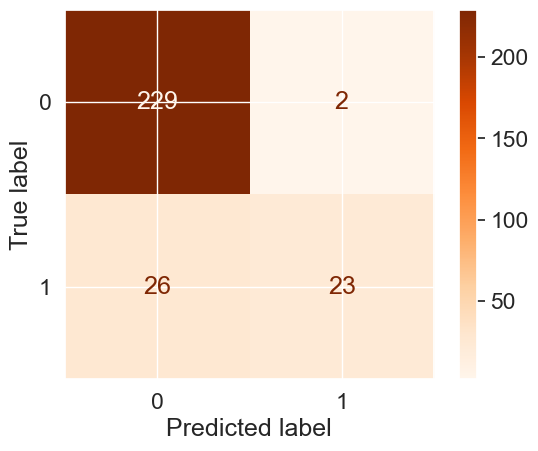

In [109]:
conf_matrix_gb = confusion_matrix(y_test_gb, y_pred_gb)

disp = ConfusionMatrixDisplay(conf_matrix_gb, display_labels=gb_clf.classes_)
disp.plot(cmap='Oranges', values_format='d')
plt.show()

#### Mức độ quan trọng của đặc trưng

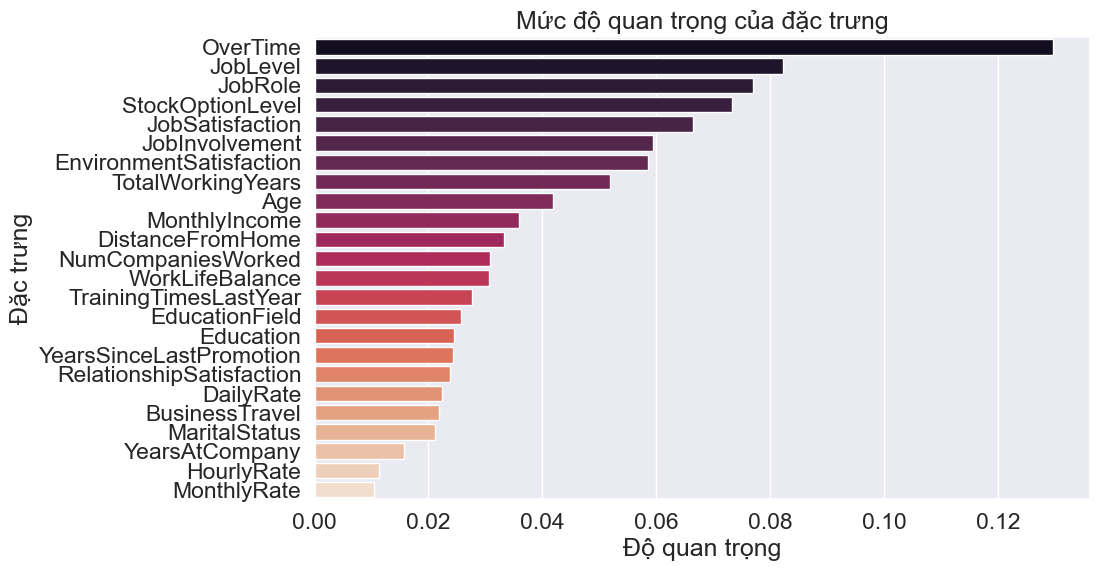

In [110]:
feature_importances_gb = gb_clf.feature_importances_
features = X.columns.tolist()

feature_importance_df = pd.DataFrame({'Đặc trưng': features, 'Độ quan trọng': feature_importances_gb})
feature_importance_df = feature_importance_df.sort_values(by='Độ quan trọng', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Độ quan trọng', y='Đặc trưng', data=feature_importance_df, palette='rocket')
plt.title('Mức độ quan trọng của đặc trưng')
plt.show()

#### Vẽ ROC Curve

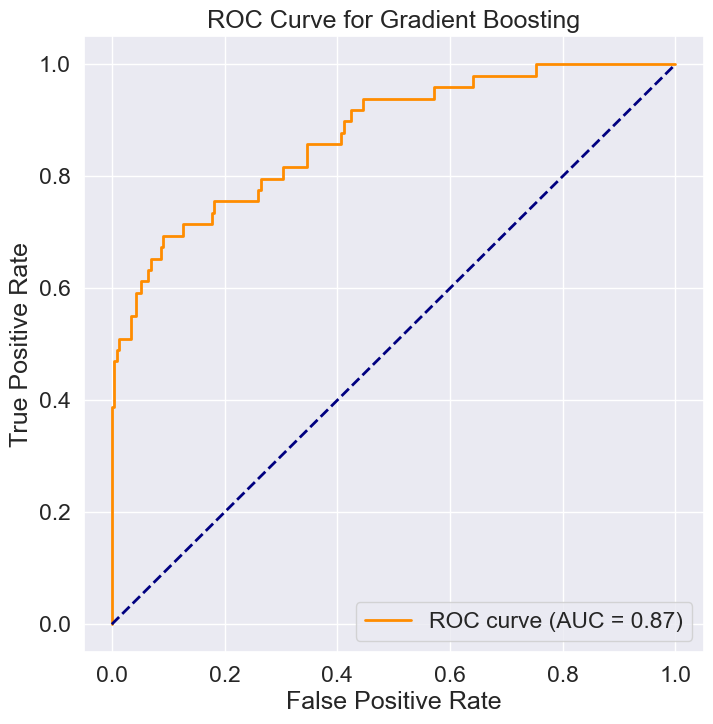

In [111]:
default_prob_gb = gb_clf.predict_proba(X_test_gb)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_gb, default_prob_gb)
roc_auc = roc_auc_score(y_test_gb, default_prob_gb)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc='lower right')

plt.show()

#### 4.7.2. Kết quả chạy lại Random Forest

In [112]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None, shuffle=True)

In [113]:
rf_clf = RandomForestClassifier(criterion='gini', random_state=42)
rf_clf.fit(X_train_rf, y_train_rf)

y_pred_rf = rf_clf.predict(X_test_rf)

print(f"Độ chính xác của Random Forest trên tập kiểm thử: {accuracy_score(y_test_rf, y_pred_rf)*100}%")
print("Classification Report:\n", classification_report(y_test_rf, y_pred_rf))

Độ chính xác của Random Forest trên tập kiểm thử: 86.78571428571429%
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       231
           1       1.00      0.24      0.39        49

    accuracy                           0.87       280
   macro avg       0.93      0.62      0.66       280
weighted avg       0.89      0.87      0.83       280



#### Ma trận nhầm lẫn

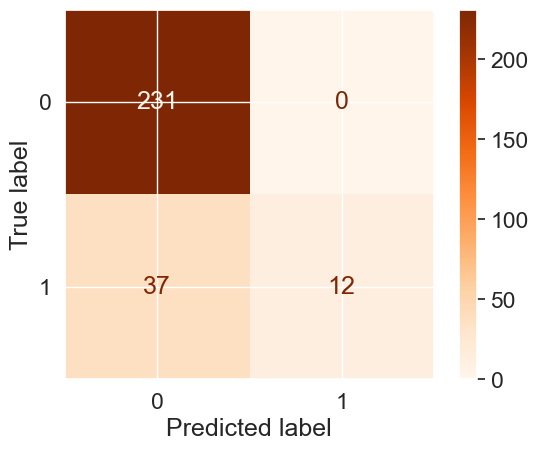

In [114]:
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)

disp = ConfusionMatrixDisplay(conf_matrix_rf, display_labels=rf_clf.classes_)
disp.plot(cmap='Oranges', values_format='d')
plt.show()

#### Mức độ quan trọng của đặc trưng

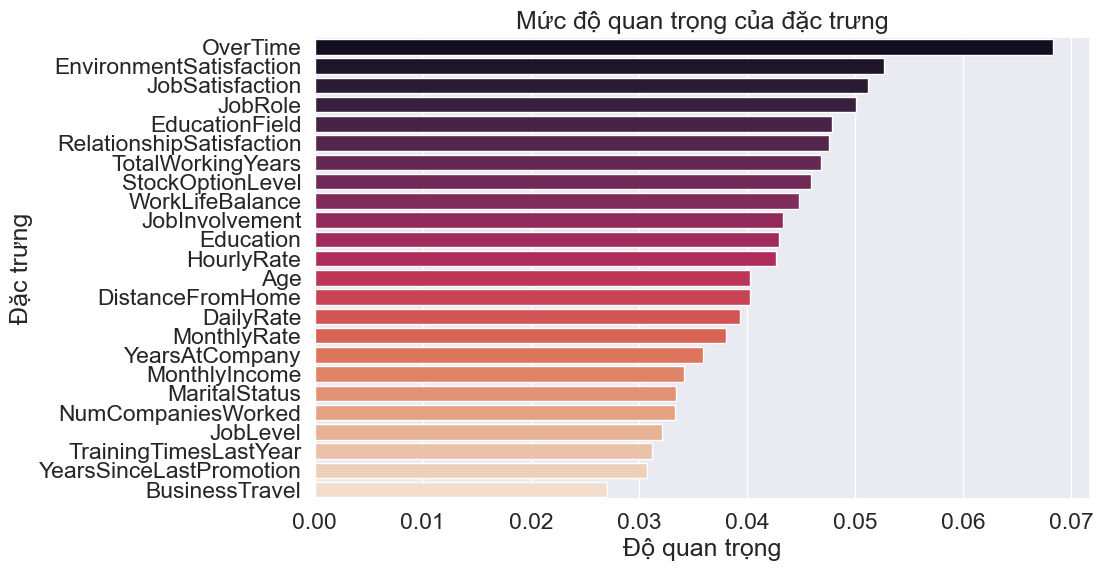

In [115]:
feature_importances_rf = rf_clf.feature_importances_
features = X.columns.tolist()

feature_importance_df = pd.DataFrame({'Đặc trưng': features, 'Độ quan trọng': feature_importances_rf})
feature_importance_df = feature_importance_df.sort_values(by='Độ quan trọng', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Độ quan trọng', y='Đặc trưng', data=feature_importance_df, palette='rocket')
plt.title('Mức độ quan trọng của đặc trưng')
plt.show()

#### Vẽ ROC Curve

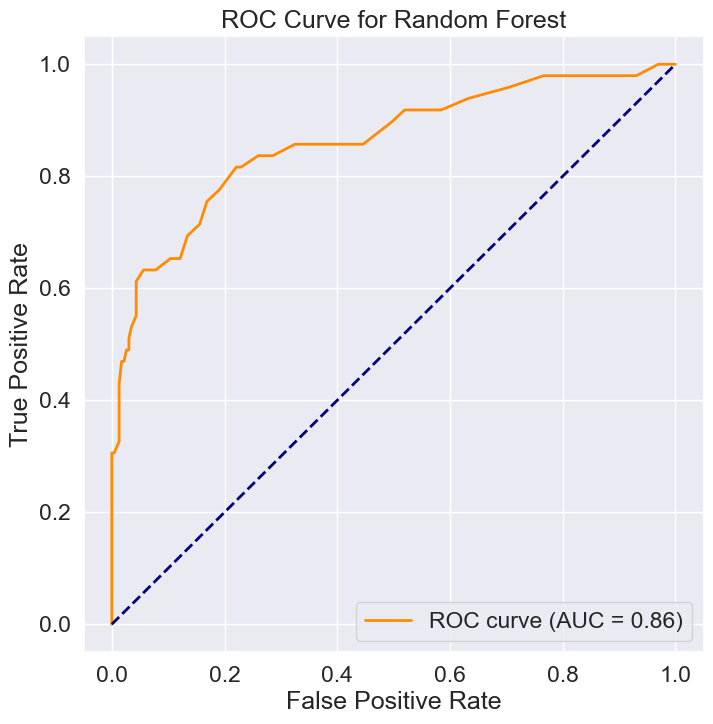

In [116]:
default_prob_rf = rf_clf.predict_proba(X_test_rf)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_rf, default_prob_rf)
roc_auc = roc_auc_score(y_test_rf, default_prob_rf)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')

plt.show()

#### 4.7.3. Kết quả chạy lại Neural Network

In [117]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

In [118]:
scaler = StandardScaler()
X_train_nn_scaled = scaler.fit_transform(X_train_nn)
X_test_nn_scaled = scaler.transform(X_test_nn)

In [119]:
nn_clf = MLPClassifier(random_state=42, max_iter=1000)
nn_clf.fit(X_train_nn_scaled, y_train_nn)

y_pred_nn = nn_clf.predict(X_test_nn_scaled)

print(f"Độ chính xác của Neural Network trên tập kiểm thử: {accuracy_score(y_test_nn, y_pred_nn)*100}%")
print("Classification Report:\n", classification_report(y_test_nn, y_pred_nn))

Độ chính xác của Neural Network trên tập kiểm thử: 86.78571428571429%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       233
           1       0.63      0.51      0.56        47

    accuracy                           0.87       280
   macro avg       0.77      0.73      0.74       280
weighted avg       0.86      0.87      0.86       280



#### Ma trận nhầm lẫn

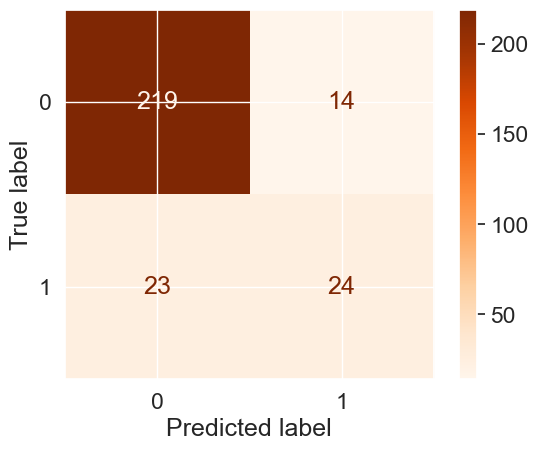

In [120]:
conf_matrix_nn = confusion_matrix(y_test_nn, y_pred_nn)

disp = ConfusionMatrixDisplay(conf_matrix_nn, display_labels=nn_clf.classes_)
disp.plot(cmap='Oranges', values_format='d')
plt.show()

#### Vẽ ROC Curve

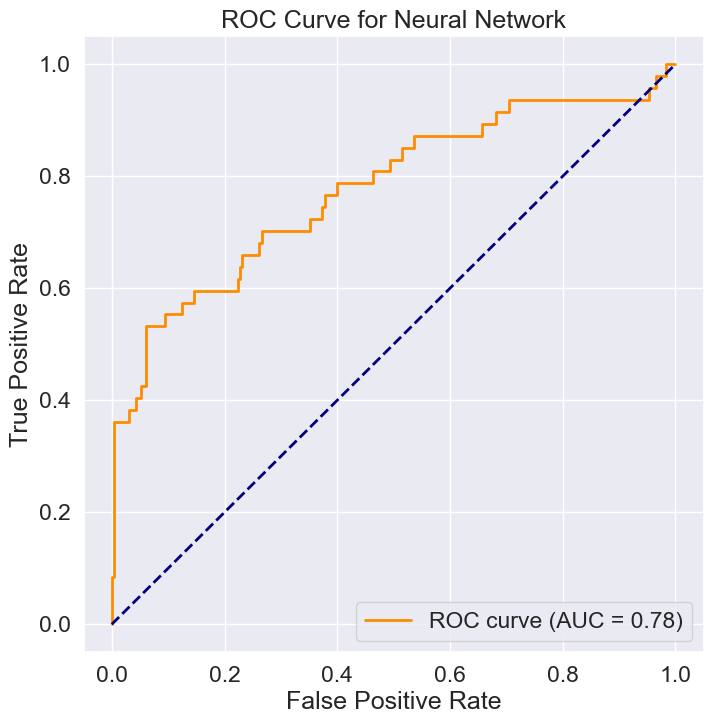

In [121]:
default_prob_nn = nn_clf.predict_proba(X_test_nn_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_nn, default_prob_nn)
roc_auc = roc_auc_score(y_test_nn, default_prob_nn)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.legend(loc='lower right')

plt.show()

### 4.8. Sử dụng GridSearchCV để cải thiện mô hình Gradient Boosting

##### Lựa chọn các tham số điều chỉnh cho mô hình
- **n_estimators**: Số lượng cây trong mô hình gradient boosting.
- **learning_rate**: Tốc độ học của mô hình, hay mức độ cập nhật của trọng số sau mỗi cây. Giá trị thấp có thể yêu cầu nhiều cây hơn để đạt được hiệu suất tốt.
- **max_depth**: Độ sâu tối đa của mỗi cây, kiểm soát độ phức tạp của mỗi cây.
- **min_samples_split**: Số lượng mẫu tối thiểu yêu cầu để phân chia một nút trong quá trình xây dựng cây.
- **subsample**: Tỷ lệ của mẫu được chọn ngẫu nhiên để xây dựng mỗi cây. Giá trị dưới 1.0 có thể giúp giảm nguy cơ overfitting, tăng tính đa dạng của ensemble.

In [122]:
param_grid = {
    'n_estimators': [75, 100, 125],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 1.0]
}

In [123]:
grid_search = GridSearchCV(gb_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_gb, y_train_gb)

best_params = grid_search.best_params_
print("Các tham số tốt nhất:", best_params)

Các tham số tốt nhất: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 125, 'subsample': 0.8}


#### Kết quả từ GridSearchCV của Gradient Boosting

In [124]:
cv_results = grid_search.cv_results_

cv_results_df = pd.DataFrame({
    'Mean Accuracy': cv_results['mean_test_score'],
    'Parameters': cv_results['params']
})

cv_results_df

Mean Accuracy                                         Parameters
0         0.835274  {'learning_rate': 0.01, 'max_depth': 3, 'min_s...
1         0.836168  {'learning_rate': 0.01, 'max_depth': 3, 'min_s...
2         0.838856  {'learning_rate': 0.01, 'max_depth': 3, 'min_s...
3         0.837960  {'learning_rate': 0.01, 'max_depth': 3, 'min_s...
4         0.839752  {'learning_rate': 0.01, 'max_depth': 3, 'min_s...
..             ...                                                ...
157       0.854056  {'learning_rate': 0.1, 'max_depth': 5, 'min_sa...
158       0.847793  {'learning_rate': 0.1, 'max_depth': 5, 'min_sa...
159       0.849585  {'learning_rate': 0.1, 'max_depth': 5, 'min_sa...
160       0.849587  {'learning_rate': 0.1, 'max_depth': 5, 'min_sa...
161       0.851375  {'learning_rate': 0.1, 'max_depth': 5, 'min_sa...

[162 rows x 2 columns]

In [125]:
best_gb_clf = GradientBoostingClassifier(**best_params, random_state=42)
best_gb_clf.fit(X_train_gb, y_train_gb)

y_pred_best_gb = best_gb_clf.predict(X_test_gb)

print(f"Độ chính xác của Gradient Boosting sau tinh chỉnh: {accuracy_score(y_test_gb, y_pred_best_gb) * 100}%")
print("Classification Report:\n", classification_report(y_test_gb, y_pred_best_gb))

Độ chính xác của Gradient Boosting sau tinh chỉnh: 90.0%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       231
           1       0.89      0.49      0.63        49

    accuracy                           0.90       280
   macro avg       0.90      0.74      0.79       280
weighted avg       0.90      0.90      0.89       280



#### Ma trận nhầm lẫn

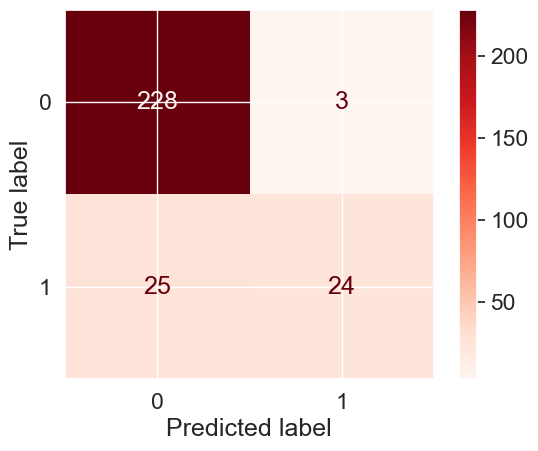

In [126]:
conf_matrix_best_gb = confusion_matrix(y_test_gb, y_pred_best_gb)

disp = ConfusionMatrixDisplay(conf_matrix_best_gb, display_labels=best_gb_clf.classes_)
disp.plot(cmap='Reds', values_format='d')
plt.show()

#### Mức độ quan trọng của đặc trưng

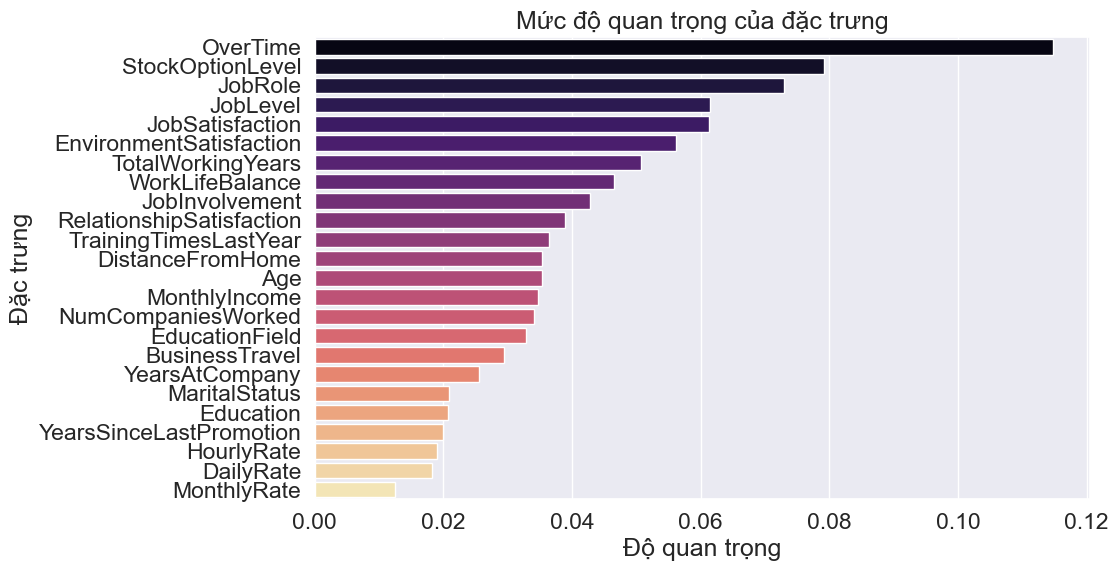

In [127]:
feature_importances_best_gb = best_gb_clf.feature_importances_
features = X.columns.tolist()

feature_importance_df = pd.DataFrame({'Đặc trưng': features, 'Độ quan trọng': feature_importances_best_gb})
feature_importance_df = feature_importance_df.sort_values(by='Độ quan trọng', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Độ quan trọng', y='Đặc trưng', data=feature_importance_df, palette='magma')
plt.title('Mức độ quan trọng của đặc trưng')
plt.show()

#### Vẽ ROC Curve

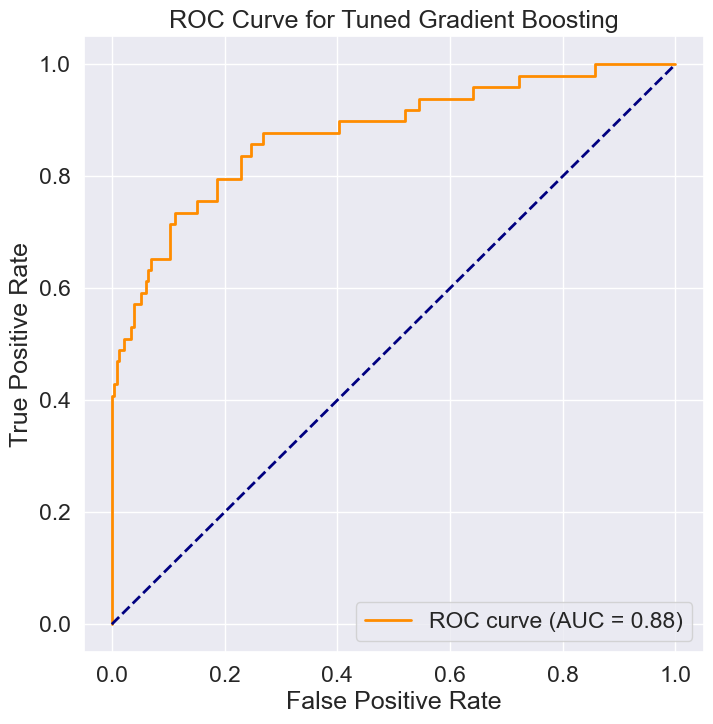

In [128]:
default_prob_best_gb = best_gb_clf.predict_proba(X_test_gb)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_gb, default_prob_best_gb)
roc_auc = roc_auc_score(y_test_gb, default_prob_best_gb)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Gradient Boosting')
plt.legend(loc='lower right')

plt.show()

### 4.9. Sử dụng GridSearchCV để cải thiện mô hình Random Forest

##### Lựa chọn các tham số điều chỉnh cho mô hình
- **n_estimators**: Số lượng cây quyết định trong rừng.
- **min_samples_split**: Số lượng mẫu tối thiểu yêu cầu để phân chia một nút trong quá trình xây dựng cây. Giá trị cao có thể dẫn đến các cây lớn hơn và ngược lại.
- **bootstrap**: Xác định có sử dụng phương pháp tái lập trong quá trình lấy mẫu hay không.
    - *True*: mỗi cây sẽ được xây dựng trên một tập con ngẫu nhiên của dữ liệu.
    - *False*: toàn bộ tập dữ liệu sẽ được sử dụng cho mỗi cây.

In [129]:
param_grid_rf = {
    'n_estimators': [75, 100, 125],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

In [130]:
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train_rf, y_train_rf)

best_params_rf = grid_search_rf.best_params_
print("Các tham số tốt nhất:", best_params_rf)

Các tham số tốt nhất: {'bootstrap': False, 'min_samples_split': 5, 'n_estimators': 125}


#### Kết quả từ GridSearchCV của Random Forest

In [131]:
cv_results_rf = grid_search_rf.cv_results_

cv_results_df = pd.DataFrame({
    'Mean Accuracy': cv_results_rf['mean_test_score'],
    'Parameters': cv_results_rf['params']
})

cv_results_df

Mean Accuracy                                         Parameters
0        0.838847  {'bootstrap': True, 'min_samples_split': 2, 'n...
1        0.840641  {'bootstrap': True, 'min_samples_split': 2, 'n...
2        0.844221  {'bootstrap': True, 'min_samples_split': 2, 'n...
3        0.840646  {'bootstrap': True, 'min_samples_split': 5, 'n...
4        0.842431  {'bootstrap': True, 'min_samples_split': 5, 'n...
5        0.842433  {'bootstrap': True, 'min_samples_split': 5, 'n...
6        0.843329  {'bootstrap': True, 'min_samples_split': 10, '...
7        0.845121  {'bootstrap': True, 'min_samples_split': 10, '...
8        0.846914  {'bootstrap': True, 'min_samples_split': 10, '...
9        0.846010  {'bootstrap': False, 'min_samples_split': 2, '...
10       0.845117  {'bootstrap': False, 'min_samples_split': 2, '...
11       0.843322  {'bootstrap': False, 'min_samples_split': 2, '...
12       0.844221  {'bootstrap': False, 'min_samples_split': 5, '...
13       0.846904  {'bootstrap': False, 'min_samples_split': 5, '...
14       0.847795  {'bootstrap': False, 'min_samples_split': 5, '...
15       0.846911  {'bootstrap': False, 'min_samples_split': 10, ...
16       0.846013  {'bootstrap': False, 'min_samples_split': 10, ...
17       0.844223  {'bootstrap': False, 'min_samples_split': 10, ...

In [132]:
best_rf_clf = RandomForestClassifier(**best_params_rf, criterion='gini', random_state=42)
best_rf_clf.fit(X_train_rf, y_train_rf)

y_pred_best_rf = best_rf_clf.predict(X_test_rf)

print(f"Độ chính xác của Random Forest sau tinh chỉnh: {accuracy_score(y_test_rf, y_pred_best_rf) * 100}%")
print("Classification Report:\n", classification_report(y_test_rf, y_pred_best_rf))

Độ chính xác của Random Forest sau tinh chỉnh: 87.14285714285714%
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       231
           1       0.93      0.29      0.44        49

    accuracy                           0.87       280
   macro avg       0.90      0.64      0.68       280
weighted avg       0.88      0.87      0.84       280



#### Ma trận nhầm lẫn

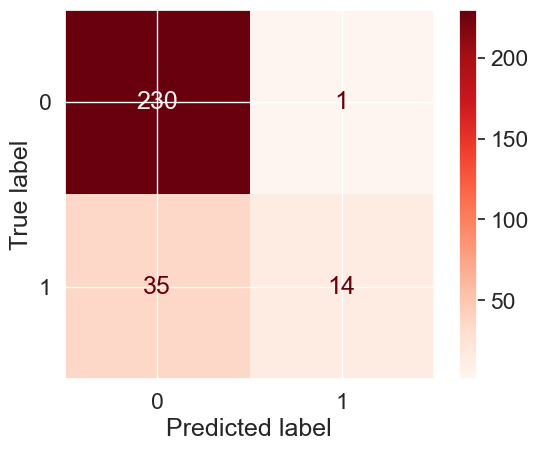

In [133]:
conf_matrix_best_rf = confusion_matrix(y_test_rf, y_pred_best_rf)

disp = ConfusionMatrixDisplay(conf_matrix_best_rf, display_labels=best_rf_clf.classes_)
disp.plot(cmap='Reds', values_format='d')
plt.show()

#### Mức độ quan trọng của đặc trưng

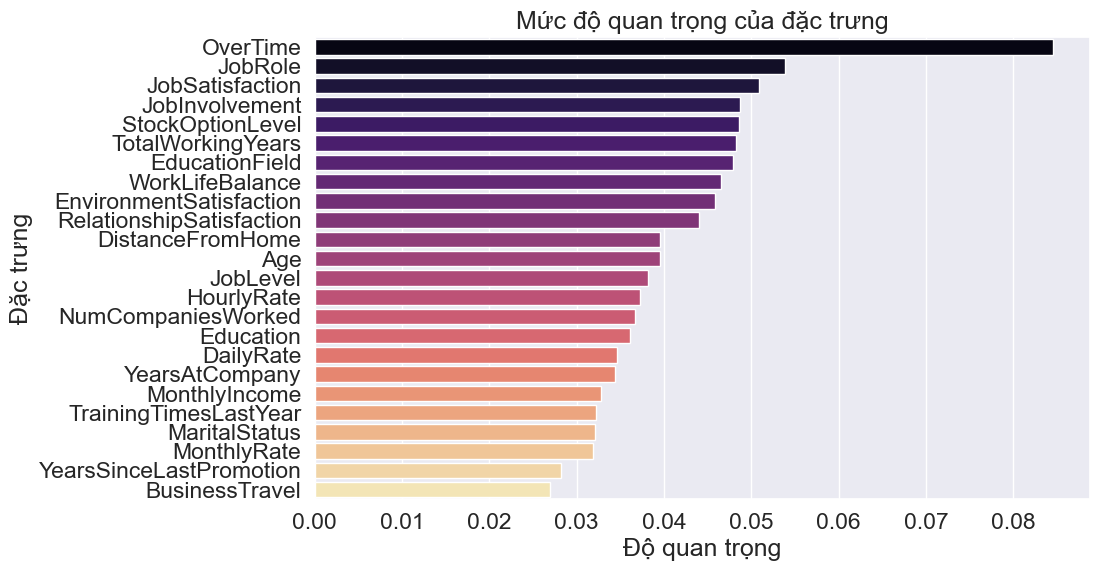

In [134]:
feature_importances_best_rf = best_rf_clf.feature_importances_
features = X.columns.tolist()

feature_importance_df = pd.DataFrame({'Đặc trưng': features, 'Độ quan trọng': feature_importances_best_rf})
feature_importance_df = feature_importance_df.sort_values(by='Độ quan trọng', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Độ quan trọng', y='Đặc trưng', data=feature_importance_df, palette='magma')
plt.title('Mức độ quan trọng của đặc trưng')
plt.show()

#### Vẽ ROC Curve

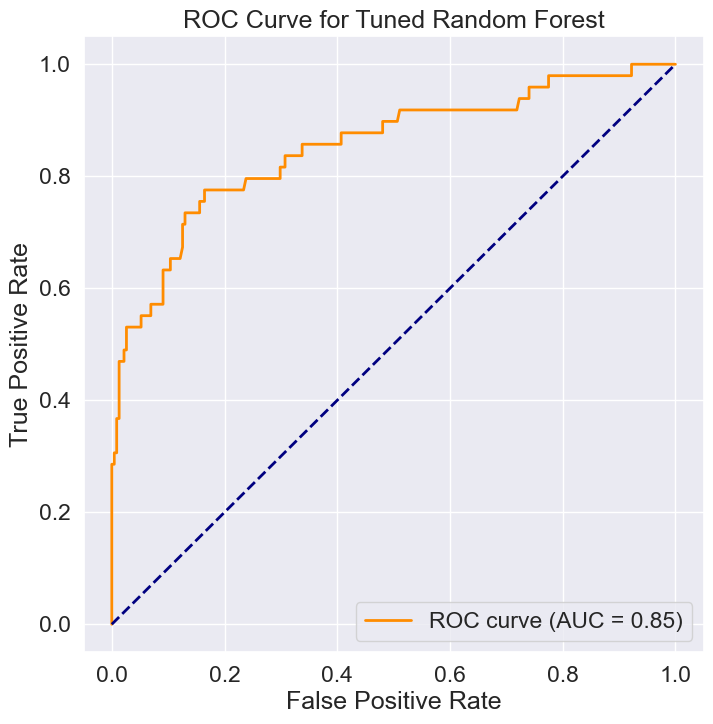

In [135]:
default_prob_best_rf = best_rf_clf.predict_proba(X_test_rf)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_rf, default_prob_best_rf)
roc_auc = roc_auc_score(y_test_rf, default_prob_best_rf)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Random Forest')
plt.legend(loc='lower right')

plt.show()

### 4.10. Sử dụng GridSearchCV để cải thiện Neural Network

In [136]:
scaler = StandardScaler()
X_train_nn_scaled = scaler.fit_transform(X_train_nn)
X_test_nn_scaled = scaler.transform(X_test_nn)

##### Lựa chọn các tham số điều chỉnh cho mô hình
- **learning_rate**: Xác định tỉ lệ học được cập nhật qua các lớp (tầng) của mạng nơ-ron. 
    - *'constant'*: Cố định không thay đổi.
    - *'adaptive'*: Thay đổi dựa trên sự giảm thiểu của hàm mất mát.
- **hidden_layer_sizes**: Xác định kiến trúc của mạng nơ-ron (số lượng và kích thước của các lớp ẩn).
    - *(50,)*: một lớp ẩn với 50 nơ-ron
    - *(100, 50)*: hai lớp ẩn, lần lượt có 100 và 50 nơ-ron.
- **activation**: Hàm kích hoạt được sử dụng trong các nơ-ron, quyết định cách nơ-ron sẽ được kích hoạt.
    - *'relu'*: Rectified Linear Unit (ReLU)
    - *'logistic'*: Hàm logistic (sigmoid).
    - *'tanh'*: Hàm tanh.
- **solver**: Thuật toán tối ưu hóa được sử dụng để cực tiểu hóa hàm mất mát. Các giá trị có thể là:
    - *'adam'*: Adam - một phương pháp tối ưu hóa dựa trên bộ nhớ động.
    - *'lbfgs'*: Thuật toán tối ưu hóa L-BFGS, phù hợp cho dữ liệu nhỏ.

In [137]:
param_grid_nn = {
    'learning_rate': ['constant', 'adaptive'],
    'hidden_layer_sizes': [(50,), (100, 50)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['adam', 'lbfgs']
}

In [138]:
grid_search_nn = GridSearchCV(nn_clf, param_grid_nn, cv=3, scoring='accuracy')
grid_search_nn.fit(X_train_nn_scaled, y_train_nn)

best_params_nn = grid_search_nn.best_params_
print("Các tham số tốt nhất:", best_params_nn)

Các tham số tốt nhất: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}


#### Kết quả từ GridSearchCV của Neural Network

In [139]:
cv_results_nn = grid_search_nn.cv_results_

cv_results_df = pd.DataFrame({
    'Mean Accuracy': cv_results_nn['mean_test_score'],
    'Parameters': cv_results_nn['params']
})

cv_results_df

Mean Accuracy                                         Parameters
0        0.822734  {'activation': 'relu', 'hidden_layer_sizes': (...
1        0.797681  {'activation': 'relu', 'hidden_layer_sizes': (...
2        0.822734  {'activation': 'relu', 'hidden_layer_sizes': (...
3        0.797681  {'activation': 'relu', 'hidden_layer_sizes': (...
4        0.816455  {'activation': 'relu', 'hidden_layer_sizes': (...
5        0.807513  {'activation': 'relu', 'hidden_layer_sizes': (...
6        0.816455  {'activation': 'relu', 'hidden_layer_sizes': (...
7        0.807513  {'activation': 'relu', 'hidden_layer_sizes': (...
8        0.858545  {'activation': 'logistic', 'hidden_layer_sizes...
9        0.799451  {'activation': 'logistic', 'hidden_layer_sizes...
10       0.858545  {'activation': 'logistic', 'hidden_layer_sizes...
11       0.799451  {'activation': 'logistic', 'hidden_layer_sizes...
12       0.810182  {'activation': 'logistic', 'hidden_layer_sizes...
13       0.796763  {'activation': 'logistic', 'hidden_layer_sizes...
14       0.810182  {'activation': 'logistic', 'hidden_layer_sizes...
15       0.796763  {'activation': 'logistic', 'hidden_layer_sizes...
16       0.843332  {'activation': 'tanh', 'hidden_layer_sizes': (...
17       0.805724  {'activation': 'tanh', 'hidden_layer_sizes': (...
18       0.843332  {'activation': 'tanh', 'hidden_layer_sizes': (...
19       0.805724  {'activation': 'tanh', 'hidden_layer_sizes': (...
20       0.817356  {'activation': 'tanh', 'hidden_layer_sizes': (...
21       0.812885  {'activation': 'tanh', 'hidden_layer_sizes': (...
22       0.817356  {'activation': 'tanh', 'hidden_layer_sizes': (...
23       0.812885  {'activation': 'tanh', 'hidden_layer_sizes': (...

In [140]:
best_nn_clf = MLPClassifier(**best_params_nn, random_state=42, max_iter=1000)
best_nn_clf.fit(X_train_nn_scaled, y_train_nn)

y_pred_best_nn = best_nn_clf.predict(X_test_nn_scaled)

print(f"Độ chính xác của Neural Network sau tinh chỉnh: {accuracy_score(y_test_nn, y_pred_best_nn)*100}%")
print("Classification Report:\n", classification_report(y_test_nn, y_pred_best_nn))

Độ chính xác của Neural Network sau tinh chỉnh: 90.35714285714286%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       233
           1       0.92      0.47      0.62        47

    accuracy                           0.90       280
   macro avg       0.91      0.73      0.78       280
weighted avg       0.90      0.90      0.89       280



#### Ma trận nhầm lẫn

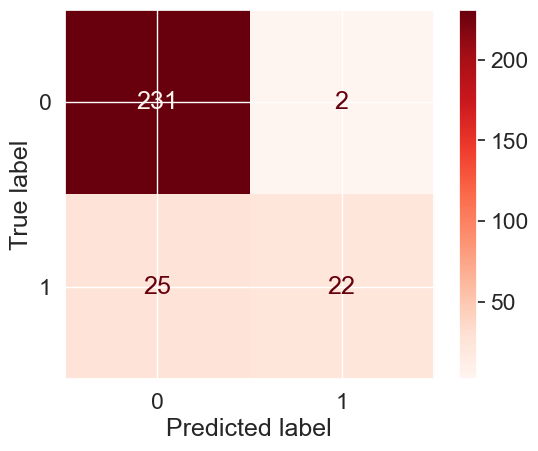

In [141]:
conf_matrix_best_nn = confusion_matrix(y_test_nn, y_pred_best_nn)

disp = ConfusionMatrixDisplay(conf_matrix_best_nn, display_labels=best_nn_clf.classes_)
disp.plot(cmap='Reds', values_format='d')
plt.show()

#### Vẽ ROC Curve

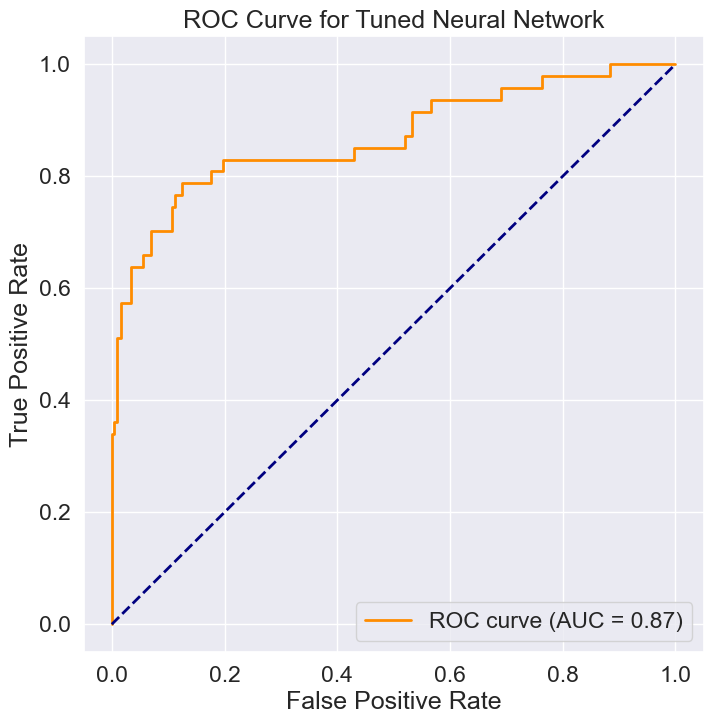

In [142]:
default_prob_best_nn = best_nn_clf.predict_proba(X_test_nn_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_nn, default_prob_best_nn)
roc_auc = roc_auc_score(y_test_nn, default_prob_best_nn)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Neural Network')
plt.legend(loc='lower right')

plt.show()

### Đánh giá và kết luận cuối cùng
| Mô hình             | Accuracy | ROC AUC | Precision | Recall | F1   |
|---------------------|----------|---------|-----------|--------|------|
| Neural Network      | 90.36%   | 0.87    | 0.92      | 0.47   | 0.62 |
| Gradient Boosting   | 90%      | 0.88    | 0.89      | 0.49   | 0.63 |
| Random Forest       | 87.14%   | 0.85    | 0.93      | 0.29   | 0.44 |

- Chỉ số Precision của cả 3 mô hình không có sự chênh lệch lớn, cho thấy cả 3 mô hình đều có khả năng xác định nhân tố ảnh hưởng đến quyết định nghỉ việc của nhân viên.
- Cả 3 mô hình đều có khả năng phân lớp tốt giữa trường hợp nhân viên nghỉ việc và không nghỉ việc.
  
- Cả ba mô hình đều có độ chính xác tổng thể cao, nhưng Neural Network và Gradient Boosting có độ chính xác cao hơn so với Random Forest. Accuracy là một chỉ số quan trọng, nhưng nó có thể bị ảnh hưởng bởi sự mất cân bằng giữa các lớp (nhân viên ở lại và nhân viên rời đi).
  
- Trong bối cảnh việc giữ chân và xác định nhân viên có nguy cơ rời đi là bài toán đối với các nhà quản lý nhân sự, độ nhạy (Recall) là một yếu tố quan trọng. Nên ưu tiên các mô hình có Recall cao để giảm thiểu bỏ sót nhân viên có nguy cơ nghỉ việc.
    - Neural Network phát hiện được 25 trường hợp FN trong tổng số 280 bản ghi của tập kiểm thử, tương ứng với 8,92% dữ liệu test.
    - Đối với Gradient Boosting, con số tương tự là 8,92%, trong khi Random Forest có số FN là 35, chiếm khoảng 12,5%.
    - Random Forest có hiệu suất kém hơn trong việc xác định những trường hợp có nguy cơ rời đi.
    - Neural Network và Gradient Boosting có Recall khá gần nhau, nhưng Random Forest có Recall thấp hơn, cho thấy mô hình này có xu hướng bỏ sót nhiều trường hợp nhân viên có nguy cơ nghỉ việc.

Sau khi thực hiện và đánh giá mô hình trên nhiều mặt, cả về các chỉ số lẫn thời gian tính toán, tài nguyên đào tạo, nhóm lựa chọn mô hình **Neural Network** là mô hình hiệu quả nhất để sử dụng trong dự đoán khả năng gắn bó với công ty của nhân viên, giúp các nhà quản lý nhân sự xác định chính xác những trường hợp nhân viên có nguy cơ nghỉ việc, từ đó có những biện pháp kịp thời để giữ chân nhân viên.

## 5. Tái sử dụng mô hình

In [143]:
joblib.dump(best_gb_clf, 'gradient_boosting_model.joblib')

['gradient_boosting_model.joblib']

In [144]:
joblib.dump(best_rf_clf, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [145]:
joblib.dump(best_nn_clf, 'neural_network_model.joblib')

['neural_network_model.joblib']

In [146]:
loaded_model = joblib.load('neural_network_model.joblib')